### Question 1 -  TRAIN ON CIFAR DATASET
In this exercise you are asked to train a Convolutional Neural Network (CNN) on the CIFAR10 dataset and visualize its feature maps.

2a) Download the CIFAR10 dataset using the already provided PyTorch dataloaders. 
*   Read and understand the following code
*   Feel free to add additional transformations for data augmentation

In [ ]:
## Download the CIFAR10 dataset using the PyTorch dataloaders
import torchvision  #torchvision是pytorch专门用来处理图像的库，包含四个子库。
import torchvision.transforms as transforms #transforms是其中一个，用来图像转换；datasets用来加载下载数据集，并且datasets本身包含了常用的视觉数据集

# *****START CODE 
## Data
##Here you are free to add further transform functions if you wish
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.ToTensor(),
])
# compose是图像预处理，比如里面totensor是归一化作用
transform_test = transforms.Compose([
    transforms.ToTensor(),
])
#加载数据集，第一个参数是数据加载路径，第二个是从训练集还是测试集加载，第三个参数执行下载，第四个参数表示下载并进行图像预处理
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size= , shuffle=True)
#正式加载数据集，第一个参数是加载数据集的信息，第二个参数是每批加载多少样本，默认1单位，第三个参数一般是训练集才用到，在每次迭代训练时是否将数据洗牌

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
val_dataloader = torch.utils.data.DataLoader(testset, batch_size= , shuffle=False)
# *****END CODE

1b) Create your convolutional neural network.
*   Create your own CNN architecture, defining the modules that you want to include
*   Be sure you are using convolutional modules, activation functions as well as fully connected modules
*   Use different modules and hyperparameters to boost the performance of the network

In [ ]:
#这一过程是定义创建神经网络模型
import torch
import torch.nn as nn #nn是神经网络相关的所有类
import torch.nn.functional as F #nn.functional中包含了nn中的所有库函数

# *****START CODE
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__() #这是对继承自父类的属性进行初始化
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        
        
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# *****END CODE

1c) Create the training scheme
*    Call the model
*    Specify the training hyperparameters like type of optimizer and criterion
*    Specify number of epochs

In [ ]:
# *****START CODE
model = ConvNet()#ConvNet是一个类，实例化网络模型对象

#优化器，这个函数实现实现随机梯度下降算法，梯度下降法是机器学习中一种经典的优化算法，用于优化神经网络，使在训练过程中快起来，节省社交网络训练的时间
#第一个参数是待优化的神经网络参数，第二个参数是学习率，学习率较小时，收敛到极值的速度较慢，过大容易震荡，第三个是动量因子
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#loss函数。神经网络中的“学习”是指从训练数据中自动获取最优权重参数的过程。学习的目的就是以该损失函数为基准，找出能使它的值达到最小的权重参数。
#在机器学习中，我们希望模型在训练数据上学到的预测数据分布与真实数据分布越相近越好，上面讲过了，用相对熵，但是为了简便计算使用交叉熵
criterion = nn.CrossEntropyLoss() 

epochs = 10 #步长指的是将所有的数据输入网络完成一次向前计算及反向传播，epochs = 10表示训练10次，一般来说步长越大，训练效果越好，但过大可能会过拟合
# *****END CODE

1d) Plot the train and validation loss curves for the entire training process
*   Validate the model after each epoch
*   Plot both training and validation loss curves
*   Write a small description discussing about the curves. What is the behaviour of the model?

In [ ]:
## Train the model and validate it after each epoch.
## Provide the train-val loss graph.

# *****START CODE


!pip install torchnet
import torchnet as tnt #torchnet用于训练/测试机器学习方法

# define confusion matrix using tnt package
confusion_matrix = tnt.meter.ConfusionMeter(10)# 用来跟踪一些统计量，记录某个统计量在迭代过程中值的变化

In [ ]:
import numpy as np
#将训练过程中每一次迭代的数据保存在一个文档中，便于后期画图
def write_results(save_folder, epoch, train_acc, val_acc, train_loss, val_loss):
    ff=open('./{}/progress.txt'.format(save_folder),'a')
    ff.write(' E: ')
    ff.write(str(epoch))
    ff.write('         ')
    ff.write(' TRAIN_OA: ')
    ff.write(str('%.3f' % train_acc))
    ff.write(' VAL_OA: ')
    ff.write(str('%.3f' % val_acc))
    ff.write('         ')
    ff.write(' TRAIN_LOSS: ')
    ff.write(str('%.3f' % train_loss))
    ff.write(' VAL_LOSS: ')
    ff.write(str('%.3f' % val_loss))
    ff.write('\n')
import matplotlib.pyplot as plt #画图工具包
#function that creates the train-val loss graph
#variables 'train_loss' and 'val_loss' are losts containing the average losses for all the epochs
#train_loss是训练的loss值，val_loss是期望的loss值
def save_graph(train_loss, val_loss, nb_epochs, save_folder):
    plt.plot(list(range(nb_epochs+1))[1:], train_loss)
    plt.plot(list(range(nb_epochs+1))[1:], val_loss)
    plt.legend(['train', 'val'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.savefig('{}/chart.png'.format(save_folder))

In [ ]:
from google.colab import drive
#挂载Google网上云盘，Google colab提供免费的GPU以供使用，这对于需要处理大量数据运算的机器项目来说再合适不过了
#因为要训练网络了，需用借用Google的云GPU来训练，在colab上的操作实际就是在一个分配好的linux系统主机上操作
drive = drive.mount('/content/drive')
save_folder = 'drive/My Drive/FDL/'

In [ ]:
from tqdm import tqdm #显示循环的进度条的库，进度提示信息
import torch.nn.functional as F
total_train_losses = []
total_val_losses = []

#每个步长相当于循环训练一次
for epoch in range(1,epochs+1):
    ##TRAINING##
    model.train()#需要在训练时添加model.train()，在测试时添加model.eval()
    train_losses = []
    confusion_matrix.reset()
    
    #batch代表训练时每个批次的样本大小
    for i, batch, in enumerate(tqdm(train_dataloader)):
        img_batch, lbl_batch = batch

        ##implement the forward and backward backpropagation
        optimizer.zero_grad()#将梯度初始化为零（因为一个batch的loss关于weight的导数是所有样本的loss关于weight的导数的累加和）
        output = model(img_batch.float())
        loss=criterion(output, lbl_batch)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
        confusion_matrix.add(output.data.squeeze(), lbl_batch)

        if i % 100 == 0:
            print('Train (epoch {}/{}) [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, epochs, i, len(train_dataloader),100.*i/len(train_dataloader), loss.item()))

    train_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    train_loss_mean = np.mean(train_losses)
    total_train_losses.append(train_loss_mean)
    confusion_matrix.reset()


    model.eval()
    val_losses = []

    for i, batch, in enumerate(tqdm(val_dataloader)):
        img_batch, lbl_batch = batch
   
        outputs=model(img_batch.float())
        loss=criterion(outputs, lbl_batch)


        confusion_matrix.add(outputs.data.squeeze(), lbl_batch)
        val_losses.append(loss.item())

    print('Confusion Matrix:')
    print(confusion_matrix.conf)

    val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    val_loss_mean = np.mean(val_losses)
    total_val_losses.append(val_loss_mean)

    print('TRAIN_LOSS: ', '%.3f' % train_loss_mean, 'TRAIN_ACC: ', '%.3f' % train_acc)
    print('VAL_LOSS: ', '%.3f' % val_loss_mean, 'VAL_ACC: ', '%.3f' % val_acc)
    confusion_matrix.reset()

    write_results(save_folder, epoch, train_acc, val_acc, train_loss_mean, val_loss_mean)

    torch.save(model.state_dict(), save_folder + 'model_{}.pt'.format(epoch))

save_graph(total_train_losses, total_val_losses, epochs, save_folder)

# *****END CODE

1e) Pick an intermediate layer from your convolutional neural network and visualize what patterns the network has learned
*   Complete the following code that visualizes the patterns of the network
*   Write a small description commenting on the visualized maps. What do you observe in the different visualizations of the feature maps?

In [ ]:
import sys
from skimage import io
import torchvision.utils as vutils

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv = 64  # e.g 64
# *****END CODE

## Size of visualised filter.
img_size = 32

##load your optimal model
# *****START CODE
model = ConvNet()
model.load_state_dict(torch.load('drive/My Drive/FDL/model_10.pt')) 
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(nn.Conv2d(3, 6, 5),
              nn.ReLU(),
              nn.MaxPool2d(2, 2), 
              nn.ReLU(),                        
              nn.Conv2d(6, 16, 5),
              nn.ReLU()   
)

# *****END CODE

## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt = 30  #e.g 30
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE
    x = np.gradient(img[0])
    # *****END CODE
    
    ## Define optimizer.
    # *****START CODE
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        optimizer.zero_grad()

        ## Feedforward propagation
        ## Hint: In order to find the loss, compupte the negative of the activation of the hidden layer. 
        ## The objective is to produce an input image which maximizes the activation 
        ## of neurons in a particular hidden layer. 
        # *****START CODE
        output = model(img_batch.float())
        loss=criterion(output, lbl_batch)
        loss.backward()
        optimizer.step()
        
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()

## Make grid out of visualized filters. 
##Here you may have to adjust the properties of vutils.make_grid, depending on your needs. 
##For example, you may need to change the number of rows.
G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(10,5))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

### Question 2 - Train on geometrical shapes

Function 'generate_a_triangle' produces images depicting random triangles along with the (x,y) coordinates of the vertices. Create a convolutional neural network that receives as input the triangle image and predicts the corresponding (x,y) coordinates of the triangle's vertices. 
*  Read and understand the following code

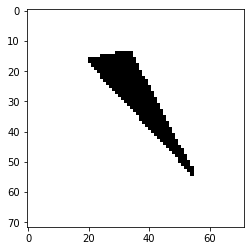

In [204]:
import matplotlib.pyplot as plt  #numpy pandas matplotlib
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle():
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata = generate_a_drawing(figsize, U, V)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

[im, v] = generate_a_triangle()
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def generate_dataset_regression(nb_samples):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle()
    X = X / 255
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300)
    return [X_test, Y_test]

2a) Use function 'generate_dataset_regression' to create the dataset. Split the dataset to training and validation parts.

In [205]:
##generate dataset
# *****START CODE
dataset = generate_dataset_regression(500)
# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


In [206]:
##split the dataset to training and validation parts
# *****START CODE
import torch
from torch.utils import data
a = torch.tensor(dataset[0].reshape(500,72,72)).unsqueeze(1)
b = torch.tensor(dataset[1])
train_ids =torch.utils.data.TensorDataset(a,b)
print(train_ids)
train_size = 400
validation_size = 100
train1,val1 = torch.utils.data.random_split(train_ids,[train_size,validation_size])
train_dataloader1 = torch.utils.data.DataLoader(train1, batch_size=10, shuffle=True)
val_dataloader1 = torch.utils.data.DataLoader(val1, batch_size=10, shuffle=True)
# *****END CODE

2b) Use function 'generate_test_set' to create the testing dataset.

In [207]:
##generate test dataset
# *****START CODE
test_set = generate_test_set_regression()
# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


2c) Create your convolutional neural network.
* Similarly to the previous exercise construct your network and choose your modules
* Optimize the architecture to perform well on predicting the different coordinates

In [208]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNetR(nn.Module):
    def __init__(self):
        super(ConvNetR, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 5)#（1*72*72）
        self.pool = nn.MaxPool2d(2, 2)#（3*36*36）
        self.conv2 = nn.Conv2d(3, 3, 6)#（3*36*36）
        self.fc1 = nn.Linear(14 * 14 * 3, 120)#()
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 6)
                
    def forward(self, x):
        #print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))#（1*72*72）-->（3*33*33）
        #print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))#（1*33*33）-->（3*14*14）
        #print(x.shape)
        x = x.view(-1, 14 * 14 * 3)#(3,14,14)-->(1,126)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# *****END CODE

2d) Define model, optimizer, criterion and number of epochs.

In [209]:
# *****START CODE
model = ConvNetR()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.MSELoss(size_average=None,reduce=None,reduction='elementwise_mean')
epochs = 200
# *****END CODE

2e) What criterion did you choose and why?
* Write a small description for the loss function that you want to use for this specific problem.
* What was your intuition for using this loss?

采用L2的损失函数，因为此问题是预测三角形三个顶点的坐标，所以，预测的值是三个坐标，label值也是坐标，计算坐标之间的loss值用距离L2比较好

2f) Train your model and validate it at the end of each epoch.
* Similarly to the previous question train and validate your network for each epoch
* Write a small description on how you decide which is the optimal epoch
* Use this epoch and evaluate your model on the test set
* Visualise some predictions using the function 'visualize_prediction'
* What do you observe?

In [210]:
# *****START CODE
!pip install torchnet
import torchnet as tnt
confusion_matrix = tnt.meter.ConfusionMeter(10)
import numpy as np
def write_results(save_folder, epoch,  train_loss, val_loss):
    ff=open('{}/progress.txt'.format(save_folder),'a')
    ff.write(' E: ')
    ff.write(str(epoch))
    ff.write('         ')
    ff.write('         ')
    ff.write(' TRAIN_LOSS: ')
    ff.write(str('%.3f' % train_loss))
    ff.write(' VAL_LOSS: ')
    ff.write(str('%.3f' % val_loss))
    ff.write('\n')
import matplotlib.pyplot as plt
#function that creates the train-val loss graph
#variables 'train_loss' and 'val_loss' are losts containing the average losses for all the epochs
def save_graph(train_loss, val_loss, nb_epochs, save_folder):
    plt.plot(list(range(nb_epochs+1))[1:], train_loss)
    plt.plot(list(range(nb_epochs+1))[1:], val_loss)
    plt.legend(['train', 'val'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.savefig('{}/chart.png'.format(save_folder))


In [211]:
save_folder = 'E:/drive1/My Drive/FDL/'

 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 136.29it/s]

Train (epoch 1/200) [0/40 (0%)]	Loss: 0.409232


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 136.29it/s]

TRAIN_LOSS:  0.300
VAL_LOSS:  0.221
Train (epoch 2/200) [0/40 (0%)]	Loss: 0.203565


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 134.98it/s]

TRAIN_LOSS:  0.129
VAL_LOSS:  0.091
Train (epoch 3/200) [0/40 (0%)]	Loss: 0.081559


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 147.45it/s]

TRAIN_LOSS:  0.082
VAL_LOSS:  0.086
Train (epoch 4/200) [0/40 (0%)]	Loss: 0.078379


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 137.62it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.087
Train (epoch 5/200) [0/40 (0%)]	Loss: 0.073451


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.086
Train (epoch 6/200) [0/40 (0%)]	Loss: 0.081126


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 143.24it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 7/200) [0/40 (0%)]	Loss: 0.073282


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 146.02it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 8/200) [0/40 (0%)]	Loss: 0.082233


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 141.89it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 9/200) [0/40 (0%)]	Loss: 0.072323


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 127.79it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 10/200) [0/40 (0%)]	Loss: 0.087405


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 127.79it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 11/200) [0/40 (0%)]	Loss: 0.074195


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 12/200) [0/40 (0%)]	Loss: 0.077035


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 147.45it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 13/200) [0/40 (0%)]	Loss: 0.078299


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 146.02it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 14/200) [0/40 (0%)]	Loss: 0.075446


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 15/200) [0/40 (0%)]	Loss: 0.084049


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 131.19it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 16/200) [0/40 (0%)]	Loss: 0.067280


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 133.69it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 17/200) [0/40 (0%)]	Loss: 0.065792


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 136.29it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 18/200) [0/40 (0%)]	Loss: 0.085033


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 129.98it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 19/200) [0/40 (0%)]	Loss: 0.066208


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 127.46it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.082
Train (epoch 20/200) [0/40 (0%)]	Loss: 0.101460


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 146.02it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.082
Train (epoch 21/200) [0/40 (0%)]	Loss: 0.075741


 40%|████████████████████████████████▍                                                | 16/40 [00:00<00:00, 152.79it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.082
Train (epoch 22/200) [0/40 (0%)]	Loss: 0.089416


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 148.91it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.083
Train (epoch 23/200) [0/40 (0%)]	Loss: 0.069771


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 141.89it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.082
Train (epoch 24/200) [0/40 (0%)]	Loss: 0.083715


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 133.69it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.082
Train (epoch 25/200) [0/40 (0%)]	Loss: 0.078261


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 136.29it/s]

TRAIN_LOSS:  0.077
VAL_LOSS:  0.081
Train (epoch 26/200) [0/40 (0%)]	Loss: 0.063421


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 143.24it/s]

TRAIN_LOSS:  0.077
VAL_LOSS:  0.081
Train (epoch 27/200) [0/40 (0%)]	Loss: 0.068961


 40%|████████████████████████████████▍                                                | 16/40 [00:00<00:00, 151.35it/s]

TRAIN_LOSS:  0.077
VAL_LOSS:  0.081
Train (epoch 28/200) [0/40 (0%)]	Loss: 0.068667


 28%|██████████████████████▎                                                          | 11/40 [00:00<00:00, 105.04it/s]

TRAIN_LOSS:  0.077
VAL_LOSS:  0.080
Train (epoch 29/200) [0/40 (0%)]	Loss: 0.070791


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 137.62it/s]

TRAIN_LOSS:  0.076
VAL_LOSS:  0.080
Train (epoch 30/200) [0/40 (0%)]	Loss: 0.090827


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.076
VAL_LOSS:  0.079
Train (epoch 31/200) [0/40 (0%)]	Loss: 0.081291


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 147.45it/s]

TRAIN_LOSS:  0.076
VAL_LOSS:  0.080
Train (epoch 32/200) [0/40 (0%)]	Loss: 0.081211


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 147.45it/s]

TRAIN_LOSS:  0.075
VAL_LOSS:  0.079
Train (epoch 33/200) [0/40 (0%)]	Loss: 0.079988


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 147.45it/s]

TRAIN_LOSS:  0.075
VAL_LOSS:  0.079
Train (epoch 34/200) [0/40 (0%)]	Loss: 0.077096


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 131.19it/s]

TRAIN_LOSS:  0.075
VAL_LOSS:  0.078
Train (epoch 35/200) [0/40 (0%)]	Loss: 0.063300


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 136.29it/s]

TRAIN_LOSS:  0.074
VAL_LOSS:  0.078
Train (epoch 36/200) [0/40 (0%)]	Loss: 0.083893


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.074
VAL_LOSS:  0.077
Train (epoch 37/200) [0/40 (0%)]	Loss: 0.084341


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 131.19it/s]

TRAIN_LOSS:  0.073
VAL_LOSS:  0.077
Train (epoch 38/200) [0/40 (0%)]	Loss: 0.068031


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 127.79it/s]

TRAIN_LOSS:  0.073
VAL_LOSS:  0.076
Train (epoch 39/200) [0/40 (0%)]	Loss: 0.073048


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.073
VAL_LOSS:  0.075
Train (epoch 40/200) [0/40 (0%)]	Loss: 0.068296


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 148.91it/s]

TRAIN_LOSS:  0.072
VAL_LOSS:  0.075
Train (epoch 41/200) [0/40 (0%)]	Loss: 0.085215


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 148.91it/s]

TRAIN_LOSS:  0.071
VAL_LOSS:  0.074
Train (epoch 42/200) [0/40 (0%)]	Loss: 0.066523


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 141.89it/s]

TRAIN_LOSS:  0.071
VAL_LOSS:  0.075
Train (epoch 43/200) [0/40 (0%)]	Loss: 0.062418


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 141.89it/s]

TRAIN_LOSS:  0.070
VAL_LOSS:  0.074
Train (epoch 44/200) [0/40 (0%)]	Loss: 0.055005


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 148.91it/s]

TRAIN_LOSS:  0.070
VAL_LOSS:  0.073
Train (epoch 45/200) [0/40 (0%)]	Loss: 0.090865


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 148.91it/s]

TRAIN_LOSS:  0.069
VAL_LOSS:  0.072
Train (epoch 46/200) [0/40 (0%)]	Loss: 0.064747


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 147.45it/s]

TRAIN_LOSS:  0.069
VAL_LOSS:  0.072
Train (epoch 47/200) [0/40 (0%)]	Loss: 0.064687


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 133.69it/s]

TRAIN_LOSS:  0.069
VAL_LOSS:  0.071
Train (epoch 48/200) [0/40 (0%)]	Loss: 0.048272


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 140.56it/s]

TRAIN_LOSS:  0.068
VAL_LOSS:  0.072
Train (epoch 49/200) [0/40 (0%)]	Loss: 0.064770


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.068
VAL_LOSS:  0.071
Train (epoch 50/200) [0/40 (0%)]	Loss: 0.076571


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 146.02it/s]

TRAIN_LOSS:  0.067
VAL_LOSS:  0.071
Train (epoch 51/200) [0/40 (0%)]	Loss: 0.057187


 40%|████████████████████████████████▍                                                | 16/40 [00:00<00:00, 152.79it/s]

TRAIN_LOSS:  0.067
VAL_LOSS:  0.071
Train (epoch 52/200) [0/40 (0%)]	Loss: 0.074923


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 147.45it/s]

TRAIN_LOSS:  0.067
VAL_LOSS:  0.071
Train (epoch 53/200) [0/40 (0%)]	Loss: 0.068967


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 138.99it/s]

TRAIN_LOSS:  0.066
VAL_LOSS:  0.070
Train (epoch 54/200) [0/40 (0%)]	Loss: 0.059860


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 141.89it/s]

TRAIN_LOSS:  0.066
VAL_LOSS:  0.069
Train (epoch 55/200) [0/40 (0%)]	Loss: 0.056467


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 132.43it/s]

TRAIN_LOSS:  0.066
VAL_LOSS:  0.069
Train (epoch 56/200) [0/40 (0%)]	Loss: 0.053087


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.065
VAL_LOSS:  0.070
Train (epoch 57/200) [0/40 (0%)]	Loss: 0.072522


 40%|████████████████████████████████▍                                                | 16/40 [00:00<00:00, 154.26it/s]

TRAIN_LOSS:  0.065
VAL_LOSS:  0.069
Train (epoch 58/200) [0/40 (0%)]	Loss: 0.057155


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 147.45it/s]

TRAIN_LOSS:  0.065
VAL_LOSS:  0.069
Train (epoch 59/200) [0/40 (0%)]	Loss: 0.071660


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 138.98it/s]

TRAIN_LOSS:  0.065
VAL_LOSS:  0.068
Train (epoch 60/200) [0/40 (0%)]	Loss: 0.048883


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 129.06it/s]

TRAIN_LOSS:  0.065
VAL_LOSS:  0.068
Train (epoch 61/200) [0/40 (0%)]	Loss: 0.050785


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 138.98it/s]

TRAIN_LOSS:  0.064
VAL_LOSS:  0.068
Train (epoch 62/200) [0/40 (0%)]	Loss: 0.073400


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 143.24it/s]

TRAIN_LOSS:  0.064
VAL_LOSS:  0.068
Train (epoch 63/200) [0/40 (0%)]	Loss: 0.066430


 40%|████████████████████████████████▍                                                | 16/40 [00:00<00:00, 151.35it/s]

TRAIN_LOSS:  0.064
VAL_LOSS:  0.067
Train (epoch 64/200) [0/40 (0%)]	Loss: 0.057706


 40%|████████████████████████████████▍                                                | 16/40 [00:00<00:00, 151.35it/s]

TRAIN_LOSS:  0.063
VAL_LOSS:  0.068
Train (epoch 65/200) [0/40 (0%)]	Loss: 0.074039


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 140.56it/s]

TRAIN_LOSS:  0.063
VAL_LOSS:  0.068
Train (epoch 66/200) [0/40 (0%)]	Loss: 0.064053


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 138.98it/s]

TRAIN_LOSS:  0.063
VAL_LOSS:  0.069
Train (epoch 67/200) [0/40 (0%)]	Loss: 0.060615


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 143.24it/s]

TRAIN_LOSS:  0.063
VAL_LOSS:  0.068
Train (epoch 68/200) [0/40 (0%)]	Loss: 0.083937


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 138.99it/s]

TRAIN_LOSS:  0.063
VAL_LOSS:  0.067
Train (epoch 69/200) [0/40 (0%)]	Loss: 0.073929


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 146.02it/s]

TRAIN_LOSS:  0.063
VAL_LOSS:  0.067
Train (epoch 70/200) [0/40 (0%)]	Loss: 0.057649


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.063
VAL_LOSS:  0.068
Train (epoch 71/200) [0/40 (0%)]	Loss: 0.051079


 40%|████████████████████████████████▍                                                | 16/40 [00:00<00:00, 149.93it/s]

TRAIN_LOSS:  0.062
VAL_LOSS:  0.069
Train (epoch 72/200) [0/40 (0%)]	Loss: 0.059222


 72%|██████████████████████████████████████████████████████████▋                      | 29/40 [00:00<00:00, 142.52it/s]

TRAIN_LOSS:  0.062
VAL_LOSS:  0.067
Train (epoch 73/200) [0/40 (0%)]	Loss: 0.057553


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 140.56it/s]

TRAIN_LOSS:  0.062
VAL_LOSS:  0.067
Train (epoch 74/200) [0/40 (0%)]	Loss: 0.065971


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 141.89it/s]

TRAIN_LOSS:  0.062
VAL_LOSS:  0.068
Train (epoch 75/200) [0/40 (0%)]	Loss: 0.081989


 40%|████████████████████████████████▍                                                | 16/40 [00:00<00:00, 151.35it/s]

TRAIN_LOSS:  0.062
VAL_LOSS:  0.068
Train (epoch 76/200) [0/40 (0%)]	Loss: 0.054130


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 116.82it/s]

TRAIN_LOSS:  0.062
VAL_LOSS:  0.066
Train (epoch 77/200) [0/40 (0%)]	Loss: 0.064269


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.061
VAL_LOSS:  0.067
Train (epoch 78/200) [0/40 (0%)]	Loss: 0.064398


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 134.98it/s]

TRAIN_LOSS:  0.061
VAL_LOSS:  0.066
Train (epoch 79/200) [0/40 (0%)]	Loss: 0.060351


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 129.98it/s]

TRAIN_LOSS:  0.061
VAL_LOSS:  0.067
Train (epoch 80/200) [0/40 (0%)]	Loss: 0.055821


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 133.69it/s]

TRAIN_LOSS:  0.061
VAL_LOSS:  0.067
Train (epoch 81/200) [0/40 (0%)]	Loss: 0.049041


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 119.13it/s]

TRAIN_LOSS:  0.061
VAL_LOSS:  0.066
Train (epoch 82/200) [0/40 (0%)]	Loss: 0.065988


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 132.43it/s]

TRAIN_LOSS:  0.061
VAL_LOSS:  0.067
Train (epoch 83/200) [0/40 (0%)]	Loss: 0.064377


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.060
VAL_LOSS:  0.066
Train (epoch 84/200) [0/40 (0%)]	Loss: 0.052459


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 127.79it/s]

TRAIN_LOSS:  0.060
VAL_LOSS:  0.066
Train (epoch 85/200) [0/40 (0%)]	Loss: 0.067185


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.060
VAL_LOSS:  0.066
Train (epoch 86/200) [0/40 (0%)]	Loss: 0.053632


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 141.89it/s]

TRAIN_LOSS:  0.060
VAL_LOSS:  0.066
Train (epoch 87/200) [0/40 (0%)]	Loss: 0.062194


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 126.55it/s]

TRAIN_LOSS:  0.060
VAL_LOSS:  0.066
Train (epoch 88/200) [0/40 (0%)]	Loss: 0.057420


 65%|████████████████████████████████████████████████████▋                            | 26/40 [00:00<00:00, 122.85it/s]

TRAIN_LOSS:  0.059
VAL_LOSS:  0.066
Train (epoch 89/200) [0/40 (0%)]	Loss: 0.083498


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 136.29it/s]

TRAIN_LOSS:  0.059
VAL_LOSS:  0.066
Train (epoch 90/200) [0/40 (0%)]	Loss: 0.056430


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 141.89it/s]

TRAIN_LOSS:  0.060
VAL_LOSS:  0.066
Train (epoch 91/200) [0/40 (0%)]	Loss: 0.057791


 38%|██████████████████████████████▍                                                  | 15/40 [00:00<00:00, 144.62it/s]

TRAIN_LOSS:  0.059
VAL_LOSS:  0.066
Train (epoch 92/200) [0/40 (0%)]	Loss: 0.053942


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 119.13it/s]

TRAIN_LOSS:  0.059
VAL_LOSS:  0.066
Train (epoch 93/200) [0/40 (0%)]	Loss: 0.057106


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 110.38it/s]

TRAIN_LOSS:  0.059
VAL_LOSS:  0.065
Train (epoch 94/200) [0/40 (0%)]	Loss: 0.062363


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 122.97it/s]

TRAIN_LOSS:  0.059
VAL_LOSS:  0.065
Train (epoch 95/200) [0/40 (0%)]	Loss: 0.060572


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 131.19it/s]

TRAIN_LOSS:  0.059
VAL_LOSS:  0.065
Train (epoch 96/200) [0/40 (0%)]	Loss: 0.056905


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 132.43it/s]

TRAIN_LOSS:  0.058
VAL_LOSS:  0.066
Train (epoch 97/200) [0/40 (0%)]	Loss: 0.056883


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 109.38it/s]

TRAIN_LOSS:  0.059
VAL_LOSS:  0.066
Train (epoch 98/200) [0/40 (0%)]	Loss: 0.063016


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 116.82it/s]

TRAIN_LOSS:  0.058
VAL_LOSS:  0.065
Train (epoch 99/200) [0/40 (0%)]	Loss: 0.067332


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 117.96it/s]

TRAIN_LOSS:  0.058
VAL_LOSS:  0.065
Train (epoch 100/200) [0/40 (0%)]	Loss: 0.045033


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 114.59it/s]

TRAIN_LOSS:  0.058
VAL_LOSS:  0.065
Train (epoch 101/200) [0/40 (0%)]	Loss: 0.059984


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 114.59it/s]

TRAIN_LOSS:  0.058
VAL_LOSS:  0.065
Train (epoch 102/200) [0/40 (0%)]	Loss: 0.067538


 28%|██████████████████████▎                                                          | 11/40 [00:00<00:00, 108.13it/s]

TRAIN_LOSS:  0.058
VAL_LOSS:  0.065
Train (epoch 103/200) [0/40 (0%)]	Loss: 0.063685


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 121.82it/s]

TRAIN_LOSS:  0.058
VAL_LOSS:  0.065
Train (epoch 104/200) [0/40 (0%)]	Loss: 0.058140


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 120.69it/s]

TRAIN_LOSS:  0.057
VAL_LOSS:  0.065
Train (epoch 105/200) [0/40 (0%)]	Loss: 0.048618


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 110.39it/s]

TRAIN_LOSS:  0.058
VAL_LOSS:  0.065
Train (epoch 106/200) [0/40 (0%)]	Loss: 0.052459


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 98.30it/s]

TRAIN_LOSS:  0.057
VAL_LOSS:  0.065
Train (epoch 107/200) [0/40 (0%)]	Loss: 0.056859


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 129.98it/s]

TRAIN_LOSS:  0.057
VAL_LOSS:  0.066
Train (epoch 108/200) [0/40 (0%)]	Loss: 0.050957


 62%|██████████████████████████████████████████████████▋                              | 25/40 [00:00<00:00, 114.36it/s]

TRAIN_LOSS:  0.057
VAL_LOSS:  0.064
Train (epoch 109/200) [0/40 (0%)]	Loss: 0.057285


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 115.69it/s]

TRAIN_LOSS:  0.057
VAL_LOSS:  0.065
Train (epoch 110/200) [0/40 (0%)]	Loss: 0.055101


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 131.19it/s]

TRAIN_LOSS:  0.057
VAL_LOSS:  0.065
Train (epoch 111/200) [0/40 (0%)]	Loss: 0.078698


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 125.33it/s]

TRAIN_LOSS:  0.057
VAL_LOSS:  0.064
Train (epoch 112/200) [0/40 (0%)]	Loss: 0.064507


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 119.13it/s]

TRAIN_LOSS:  0.057
VAL_LOSS:  0.064
Train (epoch 113/200) [0/40 (0%)]	Loss: 0.051110


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 126.55it/s]

TRAIN_LOSS:  0.057
VAL_LOSS:  0.064
Train (epoch 114/200) [0/40 (0%)]	Loss: 0.060851


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 133.69it/s]

TRAIN_LOSS:  0.057
VAL_LOSS:  0.064
Train (epoch 115/200) [0/40 (0%)]	Loss: 0.065612


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 117.96it/s]

TRAIN_LOSS:  0.057
VAL_LOSS:  0.065
Train (epoch 116/200) [0/40 (0%)]	Loss: 0.052634


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 136.29it/s]

TRAIN_LOSS:  0.056
VAL_LOSS:  0.065
Train (epoch 117/200) [0/40 (0%)]	Loss: 0.046464


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 129.06it/s]

TRAIN_LOSS:  0.056
VAL_LOSS:  0.065
Train (epoch 118/200) [0/40 (0%)]	Loss: 0.054109


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 125.33it/s]

TRAIN_LOSS:  0.056
VAL_LOSS:  0.064
Train (epoch 119/200) [0/40 (0%)]	Loss: 0.054004


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 116.82it/s]

TRAIN_LOSS:  0.056
VAL_LOSS:  0.065
Train (epoch 120/200) [0/40 (0%)]	Loss: 0.063094


 68%|██████████████████████████████████████████████████████▋                          | 27/40 [00:00<00:00, 130.05it/s]

TRAIN_LOSS:  0.056
VAL_LOSS:  0.064
Train (epoch 121/200) [0/40 (0%)]	Loss: 0.048199


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 133.69it/s]

TRAIN_LOSS:  0.056
VAL_LOSS:  0.064
Train (epoch 122/200) [0/40 (0%)]	Loss: 0.058629


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 129.06it/s]

TRAIN_LOSS:  0.056
VAL_LOSS:  0.063
Train (epoch 123/200) [0/40 (0%)]	Loss: 0.056871


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 129.06it/s]

TRAIN_LOSS:  0.056
VAL_LOSS:  0.064
Train (epoch 124/200) [0/40 (0%)]	Loss: 0.052477


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 113.51it/s]

TRAIN_LOSS:  0.056
VAL_LOSS:  0.064
Train (epoch 125/200) [0/40 (0%)]	Loss: 0.060536


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 114.59it/s]

TRAIN_LOSS:  0.055
VAL_LOSS:  0.064
Train (epoch 126/200) [0/40 (0%)]	Loss: 0.053342


 28%|██████████████████████▎                                                          | 11/40 [00:00<00:00, 109.20it/s]

TRAIN_LOSS:  0.055
VAL_LOSS:  0.064
Train (epoch 127/200) [0/40 (0%)]	Loss: 0.054342


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 112.45it/s]

TRAIN_LOSS:  0.055
VAL_LOSS:  0.064
Train (epoch 128/200) [0/40 (0%)]	Loss: 0.053347


 28%|██████████████████████▎                                                          | 11/40 [00:00<00:00, 109.20it/s]

TRAIN_LOSS:  0.055
VAL_LOSS:  0.064
Train (epoch 129/200) [0/40 (0%)]	Loss: 0.064322


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 113.51it/s]

TRAIN_LOSS:  0.055
VAL_LOSS:  0.064
Train (epoch 130/200) [0/40 (0%)]	Loss: 0.053949


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 115.69it/s]

TRAIN_LOSS:  0.056
VAL_LOSS:  0.064
Train (epoch 131/200) [0/40 (0%)]	Loss: 0.056856


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 115.69it/s]

TRAIN_LOSS:  0.056
VAL_LOSS:  0.063
Train (epoch 132/200) [0/40 (0%)]	Loss: 0.054991


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 117.96it/s]

TRAIN_LOSS:  0.055
VAL_LOSS:  0.064
Train (epoch 133/200) [0/40 (0%)]	Loss: 0.052069


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 124.14it/s]

TRAIN_LOSS:  0.055
VAL_LOSS:  0.063
Train (epoch 134/200) [0/40 (0%)]	Loss: 0.052310


 65%|████████████████████████████████████████████████████▋                            | 26/40 [00:00<00:00, 123.91it/s]

TRAIN_LOSS:  0.055
VAL_LOSS:  0.063
Train (epoch 135/200) [0/40 (0%)]	Loss: 0.056377


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 121.82it/s]

TRAIN_LOSS:  0.054
VAL_LOSS:  0.063
Train (epoch 136/200) [0/40 (0%)]	Loss: 0.039549


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 132.43it/s]

TRAIN_LOSS:  0.054
VAL_LOSS:  0.063
Train (epoch 137/200) [0/40 (0%)]	Loss: 0.048000


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 120.69it/s]

TRAIN_LOSS:  0.054
VAL_LOSS:  0.065
Train (epoch 138/200) [0/40 (0%)]	Loss: 0.047688


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 114.59it/s]

TRAIN_LOSS:  0.054
VAL_LOSS:  0.064
Train (epoch 139/200) [0/40 (0%)]	Loss: 0.051572


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 129.06it/s]

TRAIN_LOSS:  0.054
VAL_LOSS:  0.063
Train (epoch 140/200) [0/40 (0%)]	Loss: 0.053846


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 122.97it/s]

TRAIN_LOSS:  0.054
VAL_LOSS:  0.063
Train (epoch 141/200) [0/40 (0%)]	Loss: 0.051636


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 127.79it/s]

TRAIN_LOSS:  0.054
VAL_LOSS:  0.063
Train (epoch 142/200) [0/40 (0%)]	Loss: 0.052494


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 113.51it/s]

TRAIN_LOSS:  0.054
VAL_LOSS:  0.065
Train (epoch 143/200) [0/40 (0%)]	Loss: 0.050670


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 120.69it/s]

TRAIN_LOSS:  0.054
VAL_LOSS:  0.063
Train (epoch 144/200) [0/40 (0%)]	Loss: 0.056314


 60%|████████████████████████████████████████████████▌                                | 24/40 [00:00<00:00, 116.36it/s]

TRAIN_LOSS:  0.054
VAL_LOSS:  0.063
Train (epoch 145/200) [0/40 (0%)]	Loss: 0.059874


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 115.69it/s]

TRAIN_LOSS:  0.054
VAL_LOSS:  0.063
Train (epoch 146/200) [0/40 (0%)]	Loss: 0.054687


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 95.49it/s]

TRAIN_LOSS:  0.054
VAL_LOSS:  0.063
Train (epoch 147/200) [0/40 (0%)]	Loss: 0.055068


 35%|████████████████████████████▎                                                    | 14/40 [00:00<00:00, 136.29it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.063
Train (epoch 148/200) [0/40 (0%)]	Loss: 0.049594


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 129.06it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.063
Train (epoch 149/200) [0/40 (0%)]	Loss: 0.058237


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 120.70it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.063
Train (epoch 150/200) [0/40 (0%)]	Loss: 0.044001


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 122.97it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.063
Train (epoch 151/200) [0/40 (0%)]	Loss: 0.058590


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 126.55it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.063
Train (epoch 152/200) [0/40 (0%)]	Loss: 0.062028


 32%|██████████████████████████▎                                                      | 13/40 [00:00<00:00, 122.97it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.064
Train (epoch 153/200) [0/40 (0%)]	Loss: 0.062737


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 106.48it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.064
Train (epoch 154/200) [0/40 (0%)]	Loss: 0.048198


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 109.38it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.063
Train (epoch 155/200) [0/40 (0%)]	Loss: 0.055310


 28%|██████████████████████▎                                                          | 11/40 [00:00<00:00, 108.13it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.063
Train (epoch 156/200) [0/40 (0%)]	Loss: 0.040469


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 96.41it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.063
Train (epoch 157/200) [0/40 (0%)]	Loss: 0.041243


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 86.77it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.063
Train (epoch 158/200) [0/40 (0%)]	Loss: 0.038249


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 95.49it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.064
Train (epoch 159/200) [0/40 (0%)]	Loss: 0.063331


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 96.41it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 160/200) [0/40 (0%)]	Loss: 0.058292


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.56it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 161/200) [0/40 (0%)]	Loss: 0.039600


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 93.71it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 162/200) [0/40 (0%)]	Loss: 0.062329


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 75.67it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 163/200) [0/40 (0%)]	Loss: 0.045996


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 91.15it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 164/200) [0/40 (0%)]	Loss: 0.039820


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 89.35it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.062
Train (epoch 165/200) [0/40 (0%)]	Loss: 0.051858


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 91.15it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.064
Train (epoch 166/200) [0/40 (0%)]	Loss: 0.052626


 28%|██████████████████████▎                                                          | 11/40 [00:00<00:00, 100.27it/s]

TRAIN_LOSS:  0.053
VAL_LOSS:  0.063
Train (epoch 167/200) [0/40 (0%)]	Loss: 0.052650


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 96.41it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 168/200) [0/40 (0%)]	Loss: 0.044718


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 93.71it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 169/200) [0/40 (0%)]	Loss: 0.051866


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 92.84it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 170/200) [0/40 (0%)]	Loss: 0.048344


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 92.84it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 171/200) [0/40 (0%)]	Loss: 0.043368


 48%|██████████████████████████████████████▉                                           | 19/40 [00:00<00:00, 91.86it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 172/200) [0/40 (0%)]	Loss: 0.046992


 28%|██████████████████████▎                                                          | 11/40 [00:00<00:00, 101.19it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 173/200) [0/40 (0%)]	Loss: 0.046069


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 79.42it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 174/200) [0/40 (0%)]	Loss: 0.059651


 12%|██████████▍                                                                        | 5/40 [00:00<00:01, 34.82it/s]

TRAIN_LOSS:  0.051
VAL_LOSS:  0.063
Train (epoch 175/200) [0/40 (0%)]	Loss: 0.034373


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.61it/s]

TRAIN_LOSS:  0.051
VAL_LOSS:  0.065
Train (epoch 176/200) [0/40 (0%)]	Loss: 0.044730


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 93.71it/s]

TRAIN_LOSS:  0.051
VAL_LOSS:  0.063
Train (epoch 177/200) [0/40 (0%)]	Loss: 0.041695


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 84.34it/s]

TRAIN_LOSS:  0.051
VAL_LOSS:  0.062
Train (epoch 178/200) [0/40 (0%)]	Loss: 0.049678


 28%|██████████████████████▎                                                          | 11/40 [00:00<00:00, 102.12it/s]

TRAIN_LOSS:  0.051
VAL_LOSS:  0.064
Train (epoch 179/200) [0/40 (0%)]	Loss: 0.062121


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 88.47it/s]

TRAIN_LOSS:  0.052
VAL_LOSS:  0.063
Train (epoch 180/200) [0/40 (0%)]	Loss: 0.049967


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 89.35it/s]

TRAIN_LOSS:  0.051
VAL_LOSS:  0.063
Train (epoch 181/200) [0/40 (0%)]	Loss: 0.060593


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 85.70it/s]

TRAIN_LOSS:  0.051
VAL_LOSS:  0.063
Train (epoch 182/200) [0/40 (0%)]	Loss: 0.069631


 28%|██████████████████████▎                                                          | 11/40 [00:00<00:00, 100.27it/s]

TRAIN_LOSS:  0.051
VAL_LOSS:  0.064
Train (epoch 183/200) [0/40 (0%)]	Loss: 0.048849


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 91.99it/s]

TRAIN_LOSS:  0.051
VAL_LOSS:  0.063
Train (epoch 184/200) [0/40 (0%)]	Loss: 0.054474


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 89.35it/s]

TRAIN_LOSS:  0.051
VAL_LOSS:  0.063
Train (epoch 185/200) [0/40 (0%)]	Loss: 0.044138


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 89.52it/s]

TRAIN_LOSS:  0.050
VAL_LOSS:  0.063
Train (epoch 186/200) [0/40 (0%)]	Loss: 0.059372


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 94.59it/s]

TRAIN_LOSS:  0.051
VAL_LOSS:  0.063
Train (epoch 187/200) [0/40 (0%)]	Loss: 0.041872


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 82.79it/s]

TRAIN_LOSS:  0.050
VAL_LOSS:  0.063
Train (epoch 188/200) [0/40 (0%)]	Loss: 0.040782


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.56it/s]

TRAIN_LOSS:  0.050
VAL_LOSS:  0.064
Train (epoch 189/200) [0/40 (0%)]	Loss: 0.046934


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.61it/s]

TRAIN_LOSS:  0.050
VAL_LOSS:  0.062
Train (epoch 190/200) [0/40 (0%)]	Loss: 0.041280


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 98.30it/s]

TRAIN_LOSS:  0.050
VAL_LOSS:  0.063
Train (epoch 191/200) [0/40 (0%)]	Loss: 0.047245


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 95.49it/s]

TRAIN_LOSS:  0.050
VAL_LOSS:  0.063
Train (epoch 192/200) [0/40 (0%)]	Loss: 0.046196


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 92.84it/s]

TRAIN_LOSS:  0.051
VAL_LOSS:  0.063
Train (epoch 193/200) [0/40 (0%)]	Loss: 0.065395


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 99.28it/s]

TRAIN_LOSS:  0.050
VAL_LOSS:  0.063
Train (epoch 194/200) [0/40 (0%)]	Loss: 0.059723


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 93.71it/s]

TRAIN_LOSS:  0.050
VAL_LOSS:  0.063
Train (epoch 195/200) [0/40 (0%)]	Loss: 0.056207


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 92.84it/s]

TRAIN_LOSS:  0.050
VAL_LOSS:  0.063
Train (epoch 196/200) [0/40 (0%)]	Loss: 0.039478


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 95.49it/s]

TRAIN_LOSS:  0.050
VAL_LOSS:  0.063
Train (epoch 197/200) [0/40 (0%)]	Loss: 0.054417


 42%|██████████████████████████████████▊                                               | 17/40 [00:00<00:00, 81.00it/s]

TRAIN_LOSS:  0.050
VAL_LOSS:  0.063
Train (epoch 198/200) [0/40 (0%)]	Loss: 0.044376


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 89.52it/s]

TRAIN_LOSS:  0.050
VAL_LOSS:  0.062
Train (epoch 199/200) [0/40 (0%)]	Loss: 0.044287


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 86.44it/s]

TRAIN_LOSS:  0.049
VAL_LOSS:  0.063
Train (epoch 200/200) [0/40 (0%)]	Loss: 0.049263


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 172.87it/s]


TRAIN_LOSS:  0.049
VAL_LOSS:  0.063


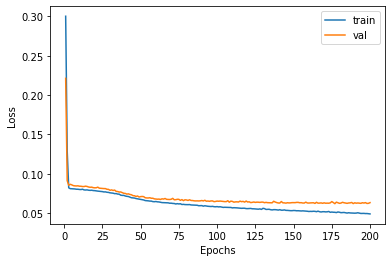

In [212]:
from tqdm import tqdm
import torch.nn.functional as F
total_train_losses = []
total_val_losses = []
for epoch in range(1,epochs+1):
    ##TRAINING##
    model.train()
    train_losses = []
    confusion_matrix.reset()
    for i, batch, in enumerate(tqdm(train_dataloader1)):
        img_batch, lbl_batch = batch

        ##implement the forward and backward backpropagation
        optimizer.zero_grad()
        output = model(img_batch.float())
        loss=criterion(output.float(), lbl_batch.float())
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        if i % 100 == 0:
            print('Train (epoch {}/{}) [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, epochs, i, len(train_dataloader1),100.*i/len(train_dataloader1), loss.item()))

    train_loss_mean = np.mean(train_losses)
    total_train_losses.append(train_loss_mean)
    confusion_matrix.reset()


    model.eval()
    val_losses = []

    for i, batch, in enumerate(tqdm(val_dataloader1)):
        img_batch, lbl_batch = batch
        outputs=model(img_batch.float())

        loss=criterion(outputs.float(), lbl_batch.float())

        val_losses.append(loss.item())


    val_loss_mean = np.mean(val_losses)
    total_val_losses.append(val_loss_mean)

    print('TRAIN_LOSS: ', '%.3f' % train_loss_mean)
    print('VAL_LOSS: ', '%.3f' % val_loss_mean)
    confusion_matrix.reset()

    write_results(save_folder, epoch,  train_loss_mean, val_loss_mean)

    torch.save(model.state_dict(), save_folder + 'model_{}.pt'.format(epoch))

save_graph(total_train_losses, total_val_losses, epochs, save_folder)

# *****END CODE

大概100epoch的时候最佳，不会过拟合

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390


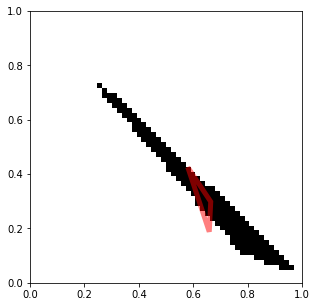

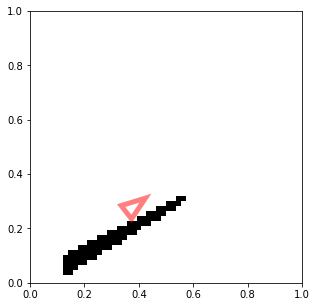

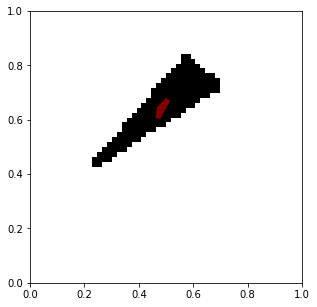

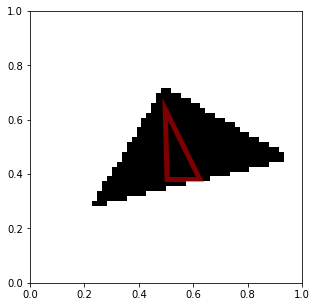

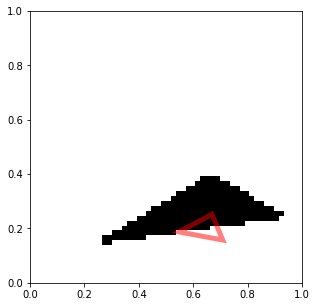

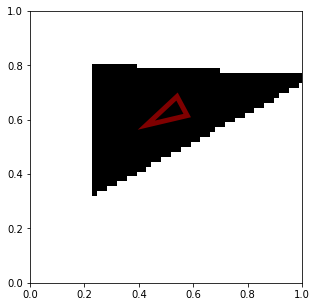

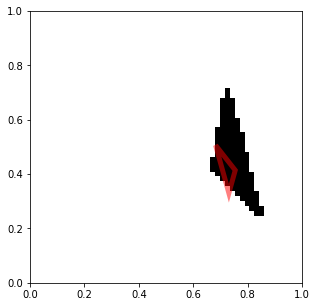

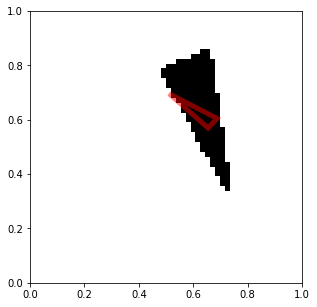

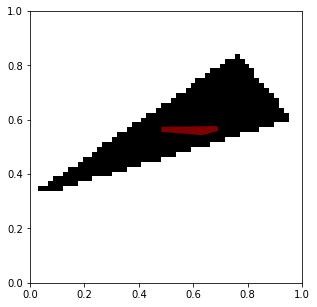

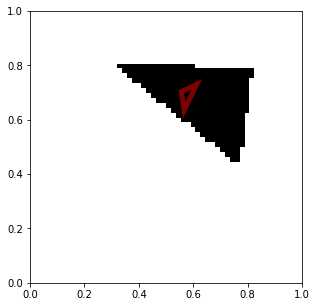

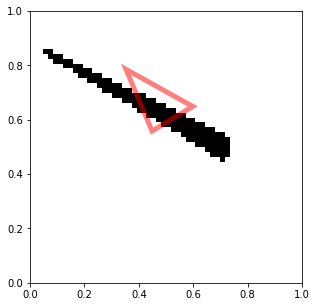

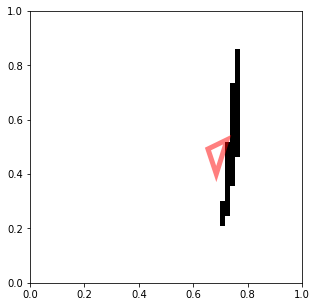

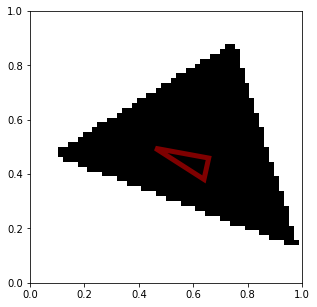

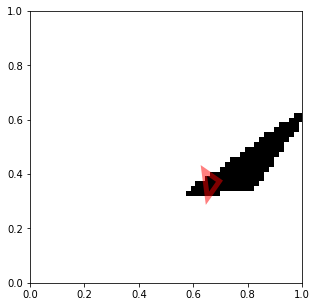

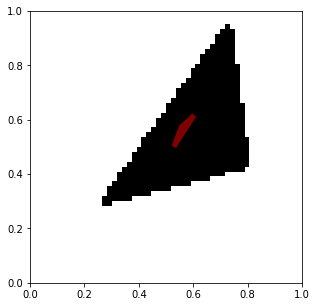

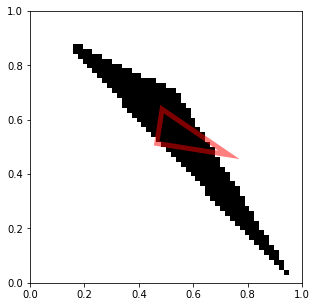

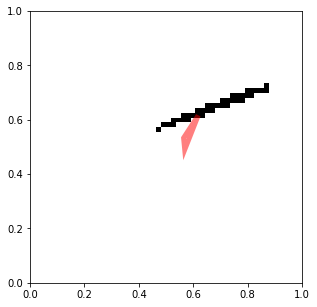

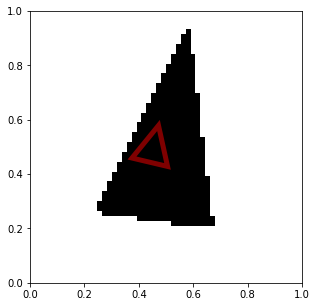

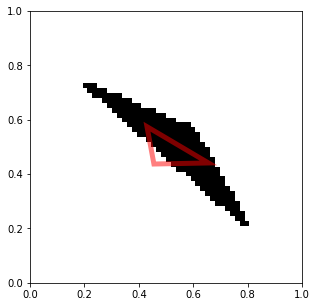

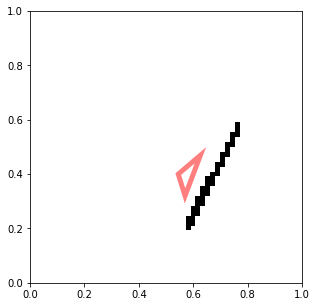

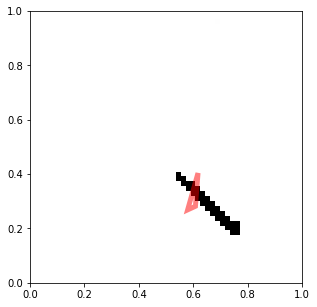

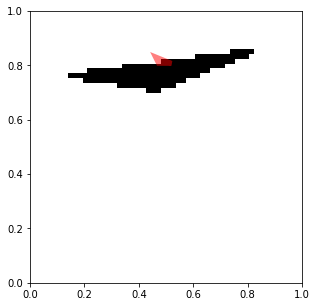

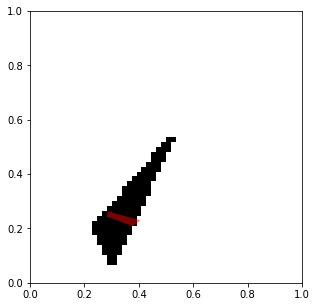

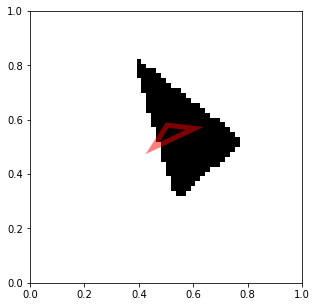

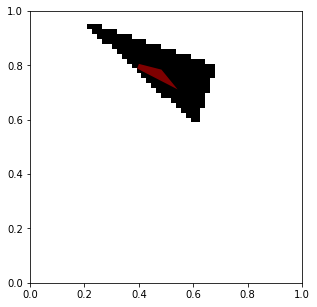

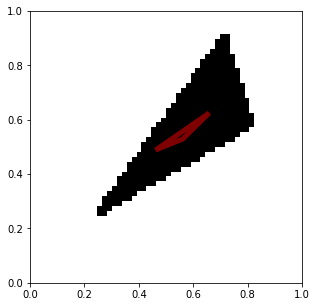

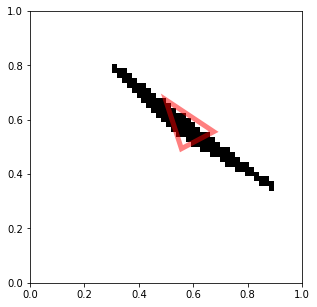

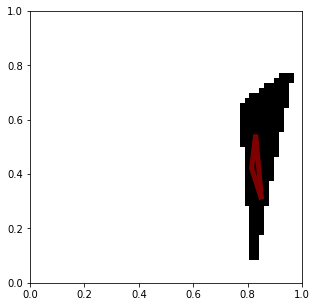

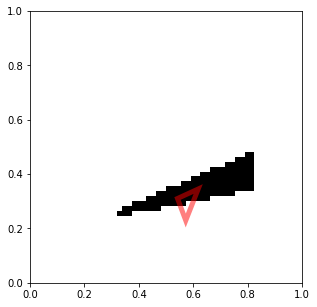

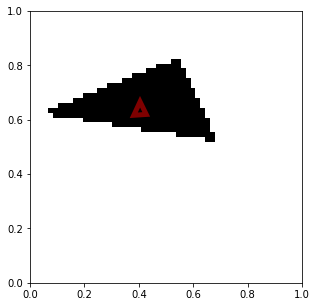

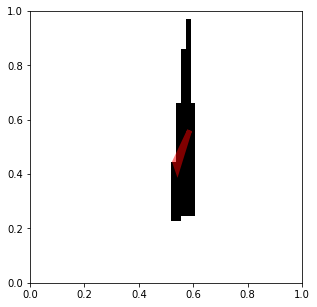

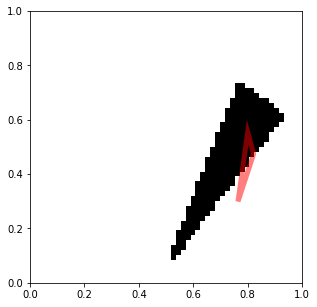

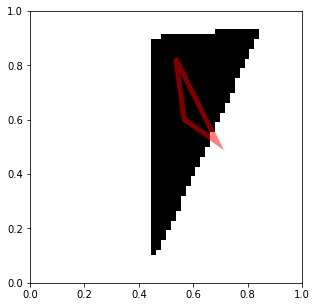

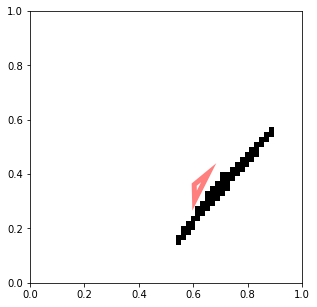

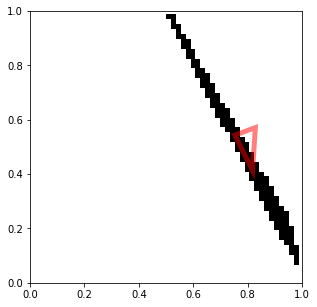

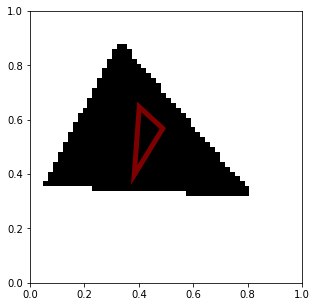

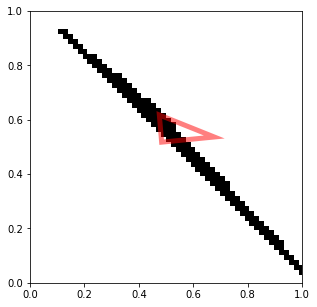

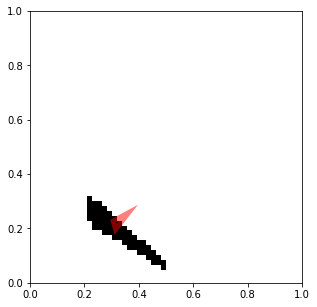

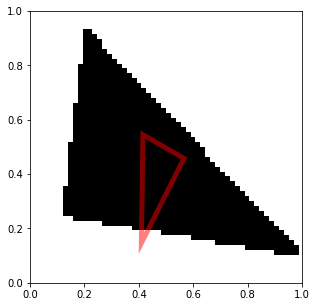

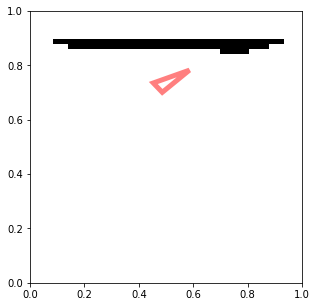

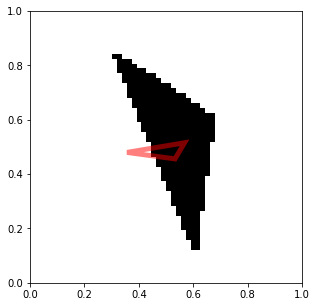

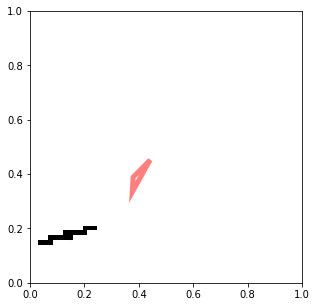

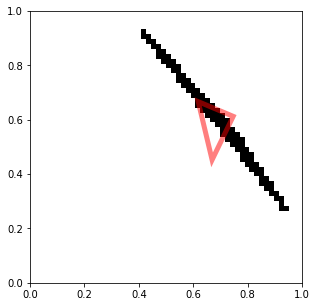

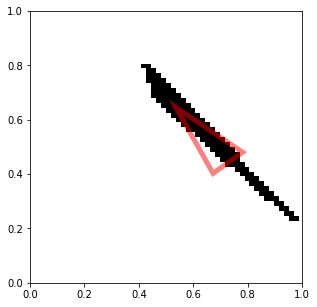

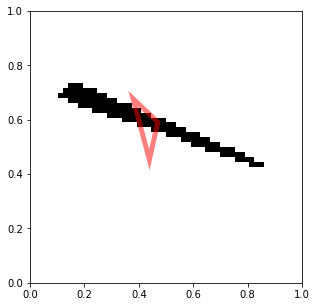

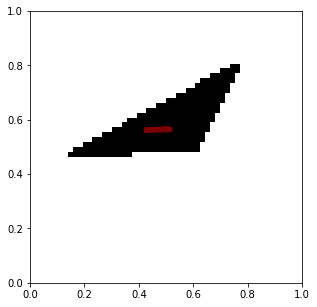

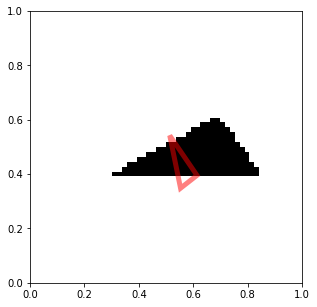

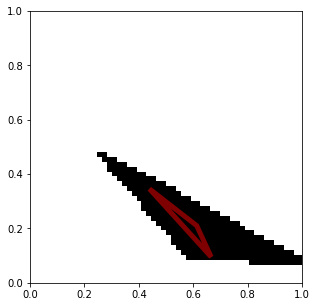

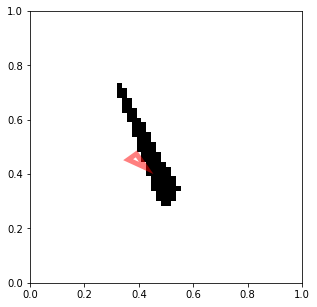

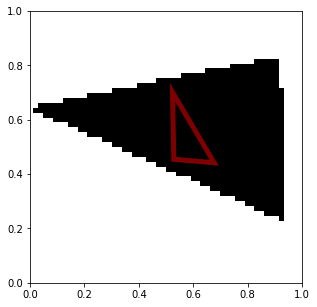

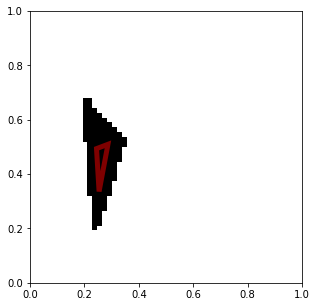

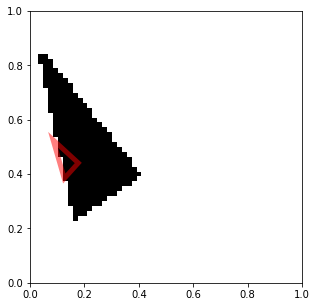

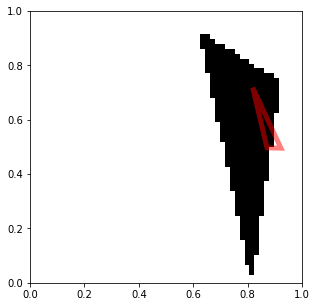

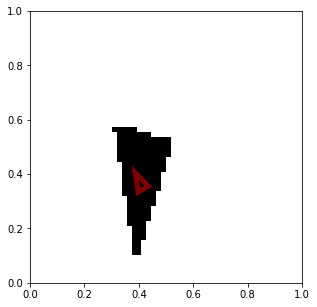

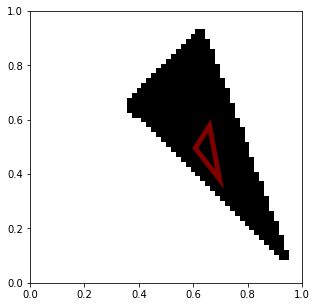

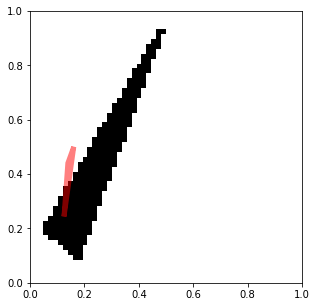

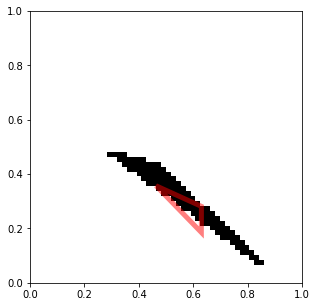

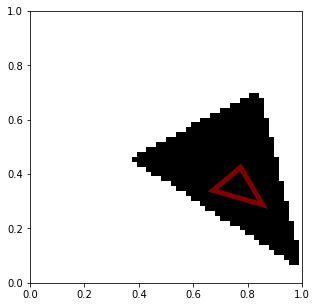

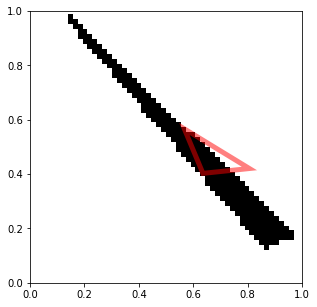

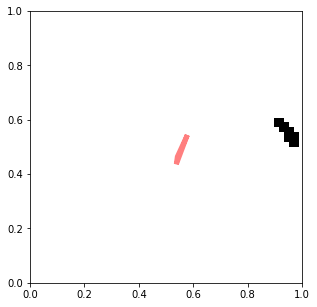

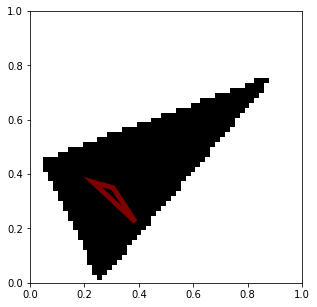

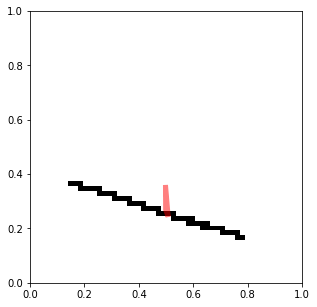

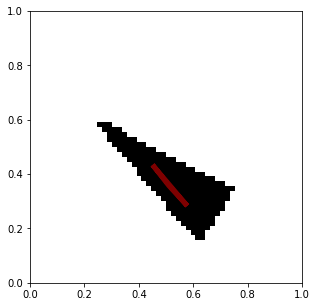

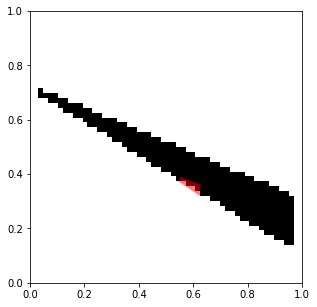

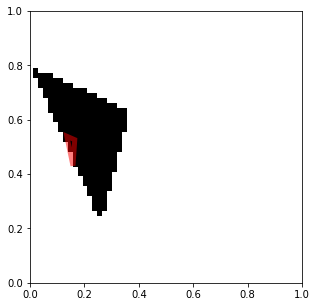

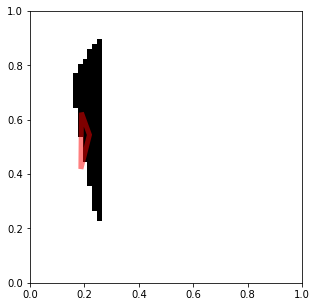

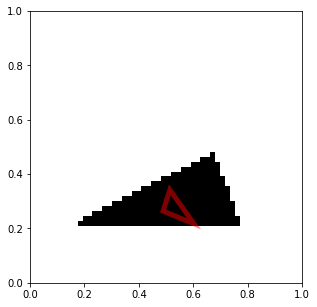

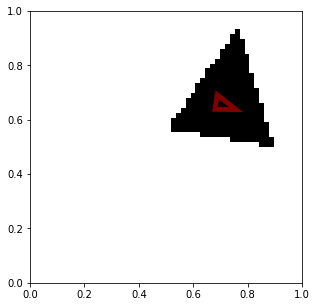

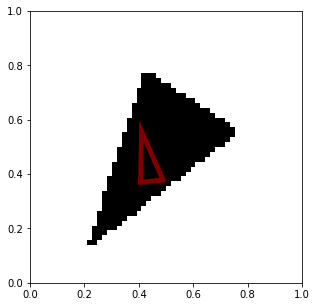

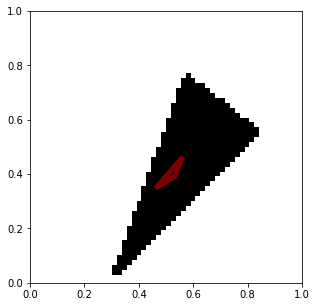

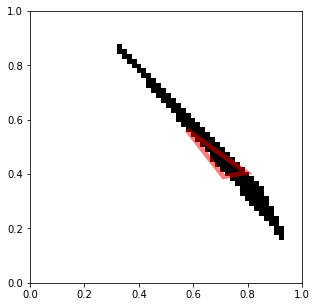

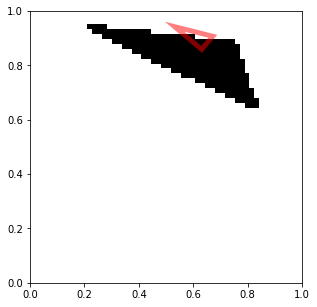

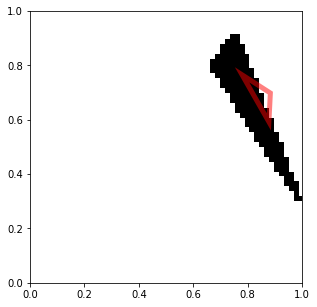

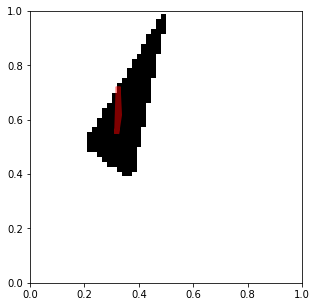

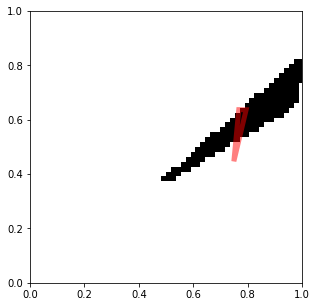

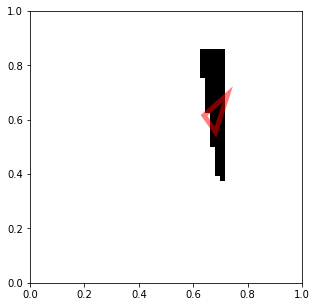

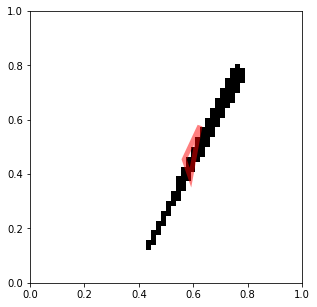

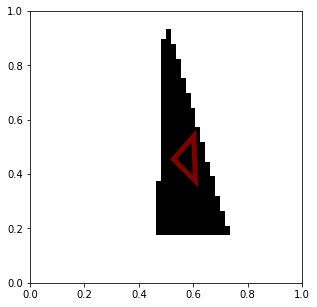

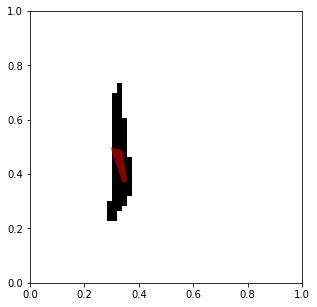

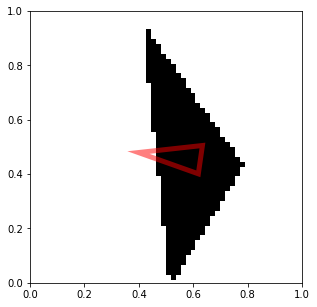

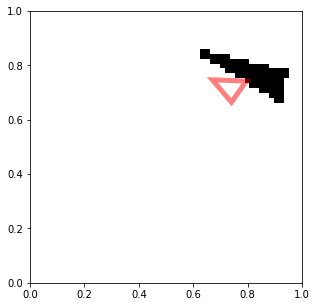

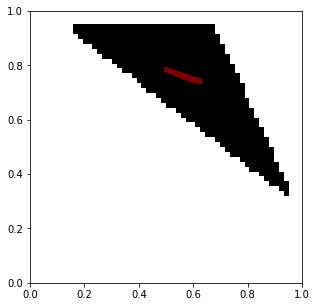

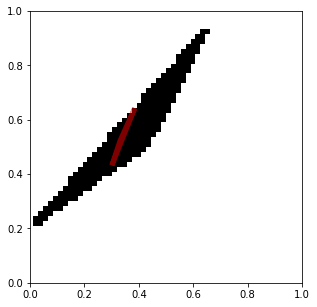

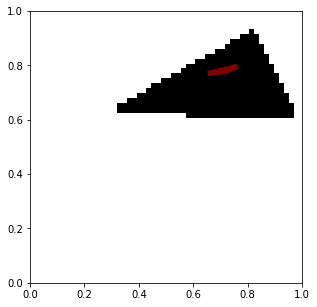

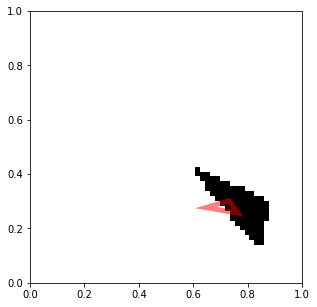

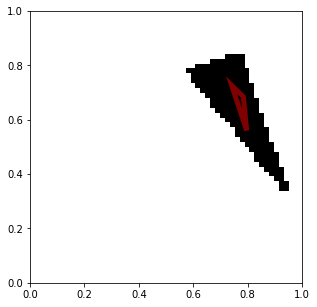

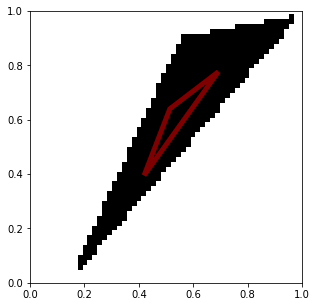

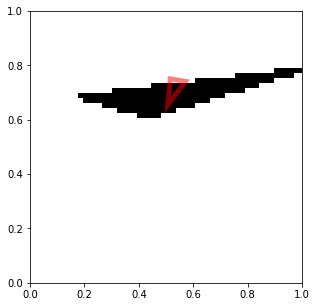

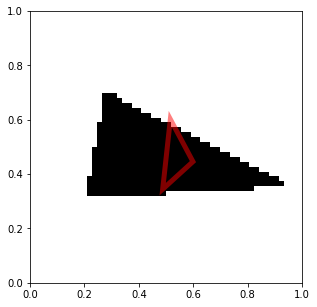

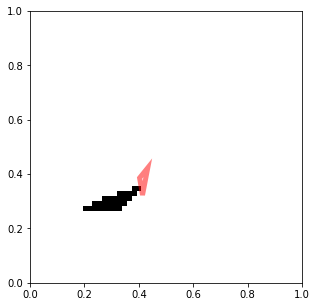

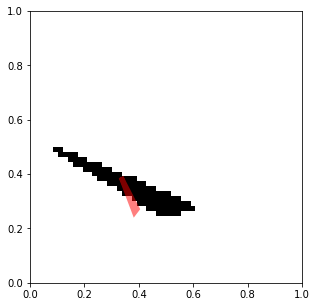

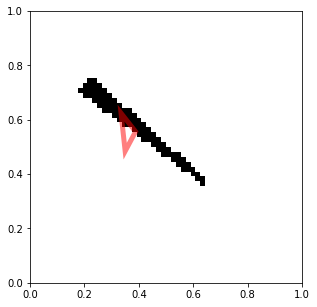

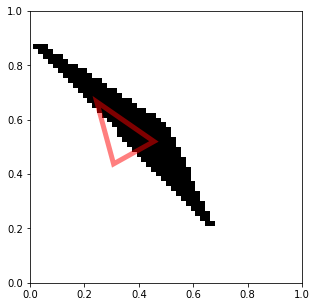

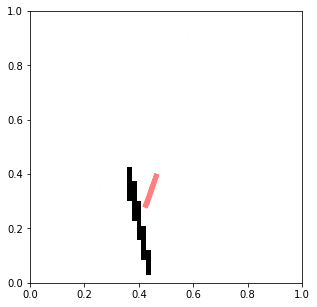

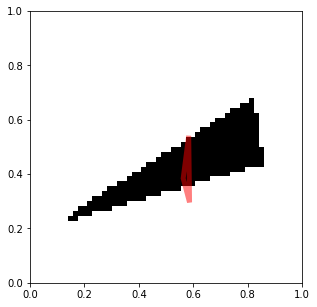

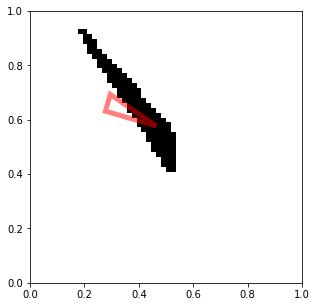

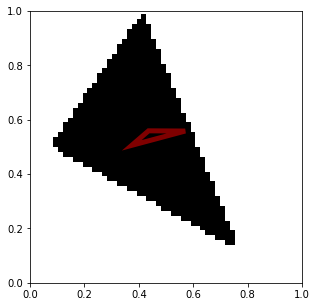

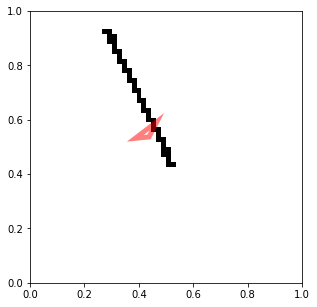

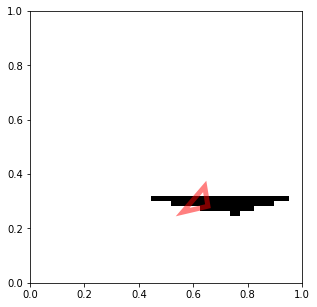

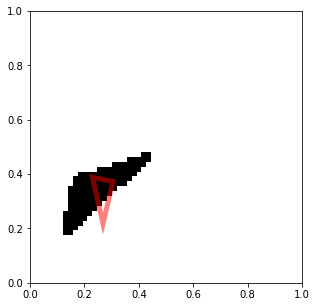

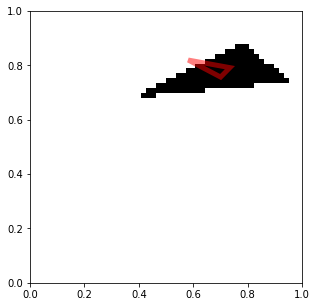

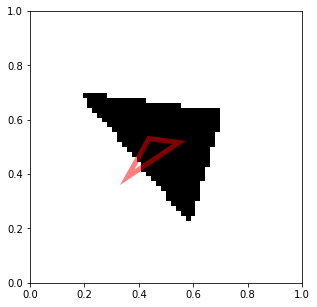

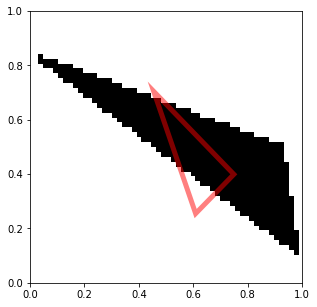

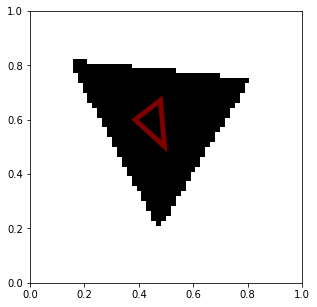

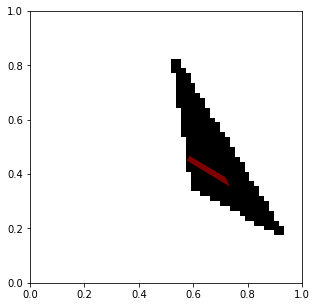

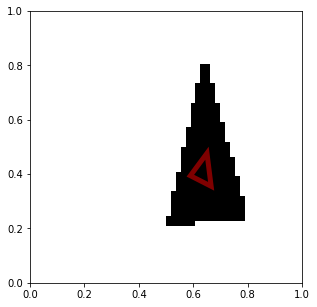

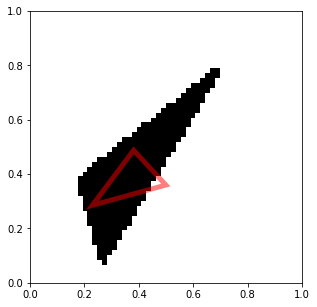

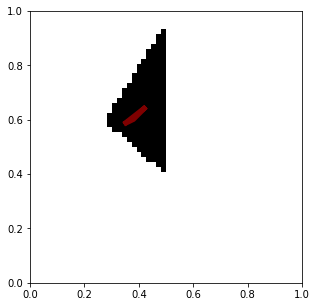

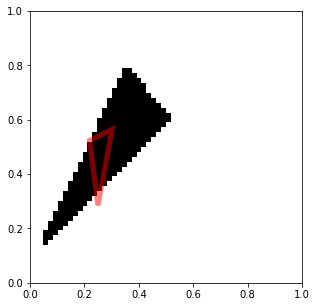

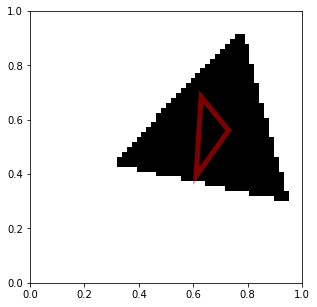

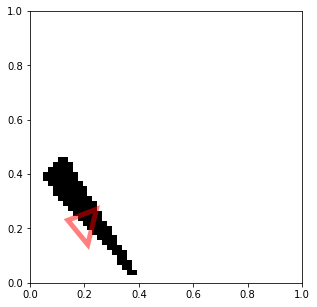

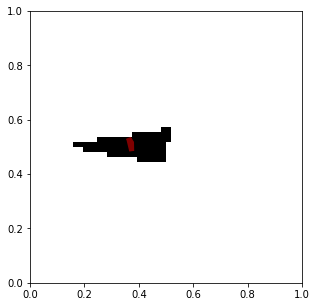

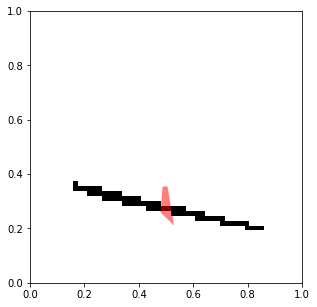

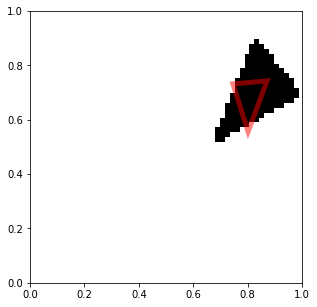

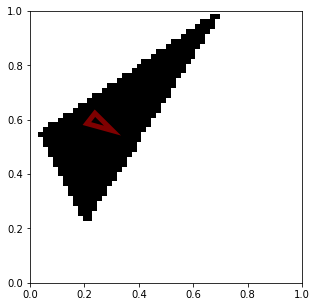

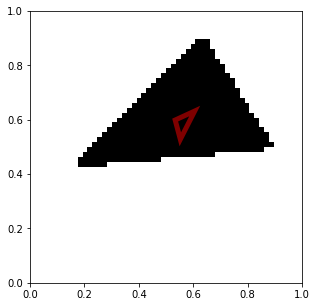

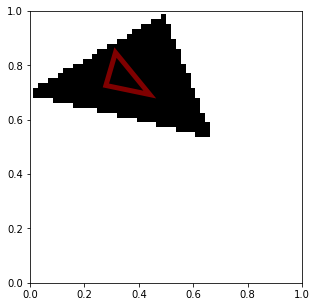

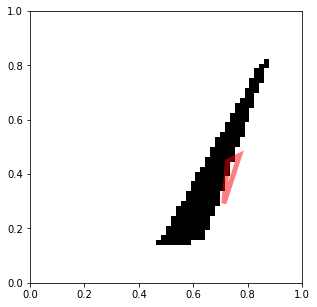

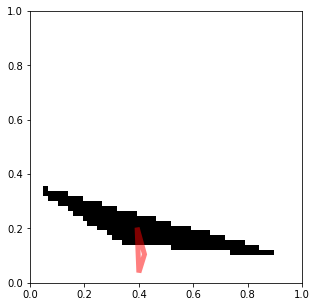

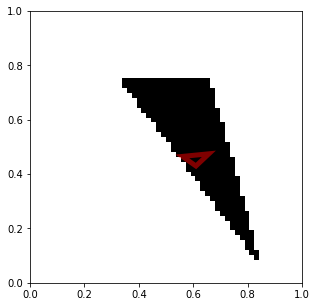

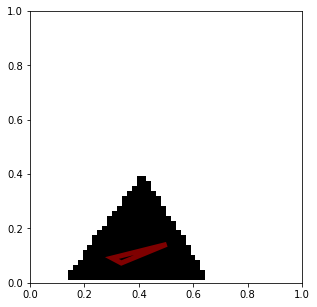

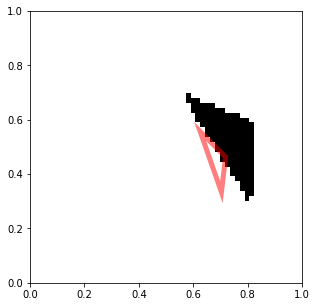

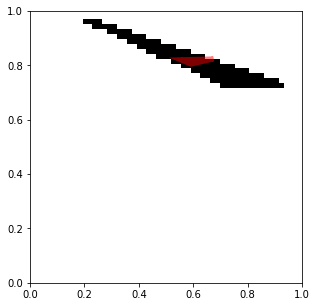

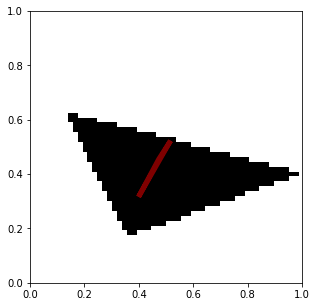

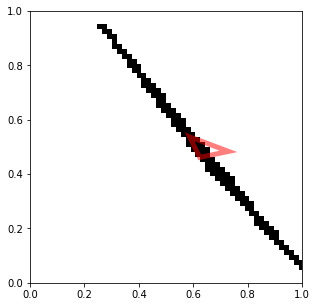

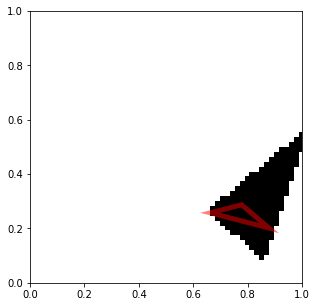

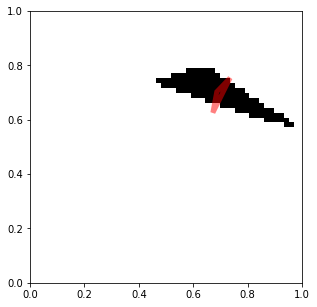

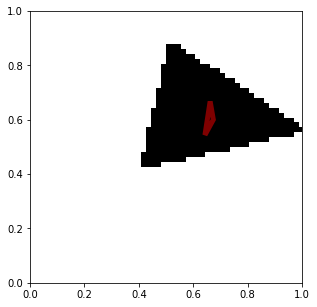

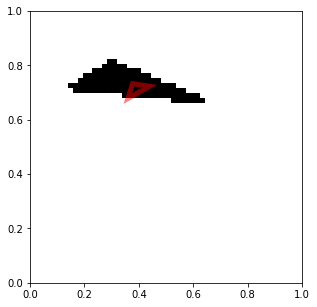

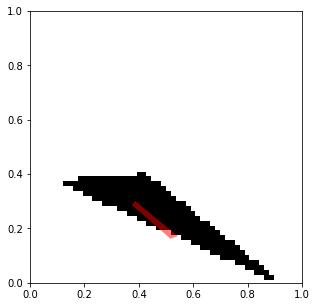

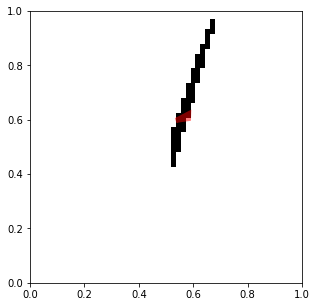

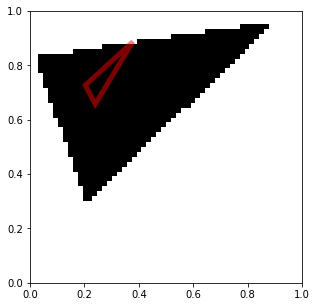

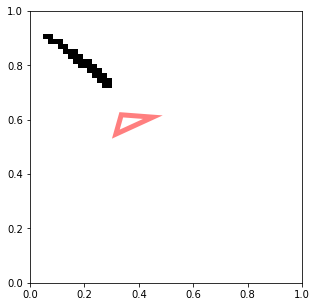

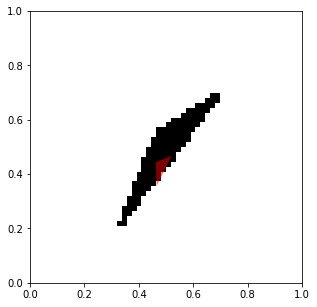

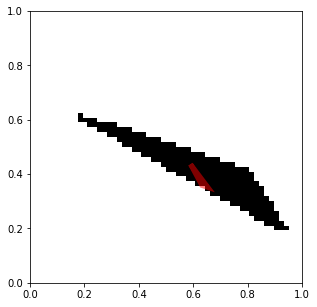

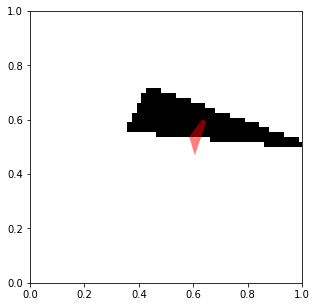

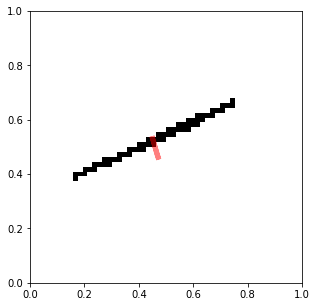

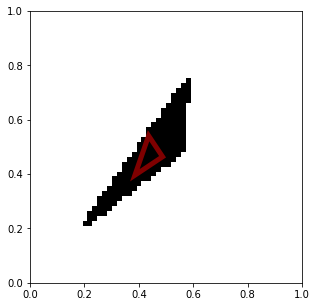

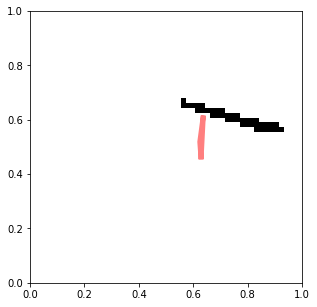

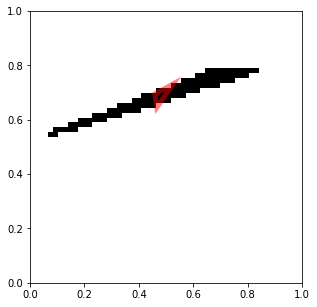

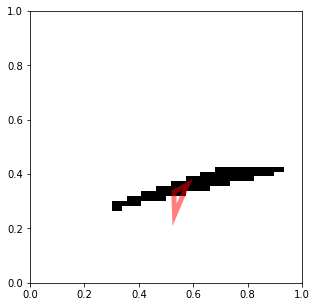

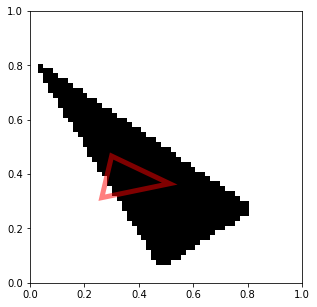

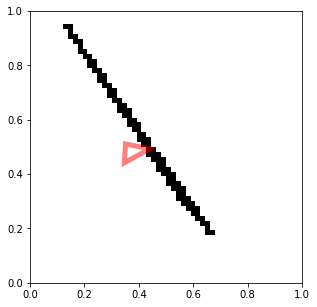

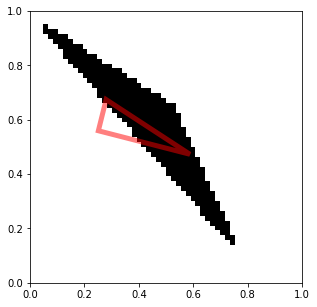

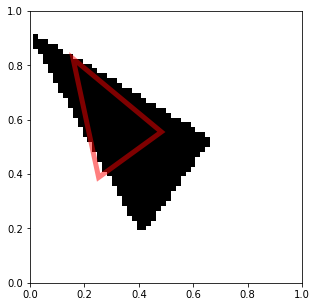

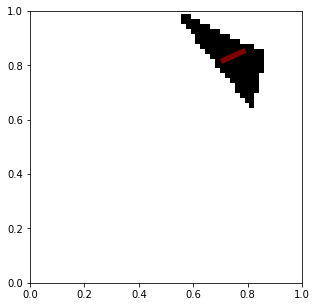

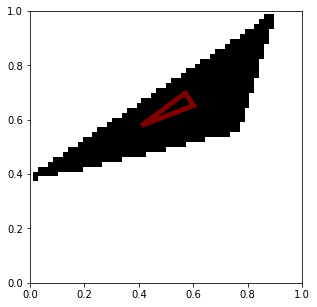

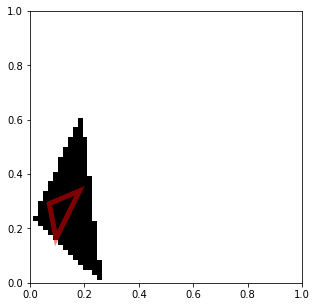

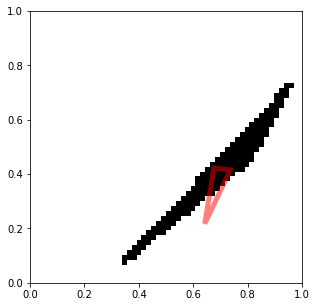

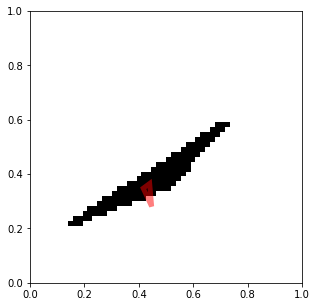

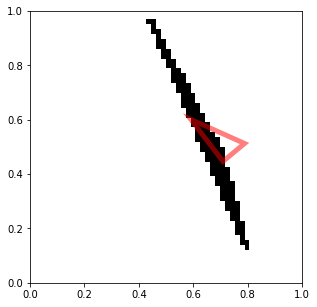

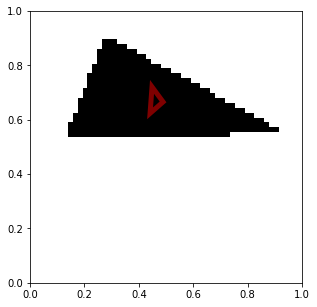

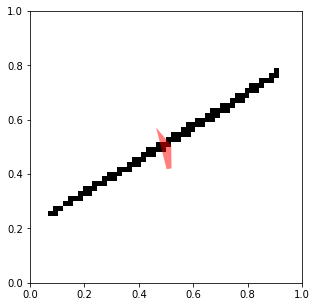

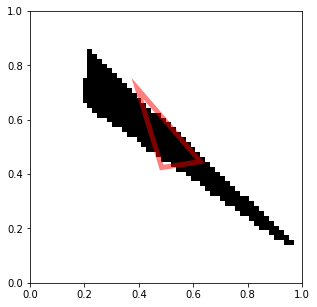

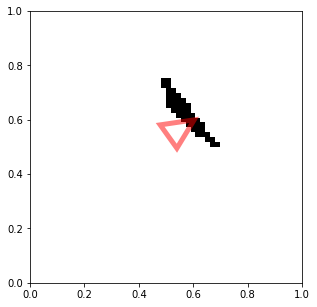

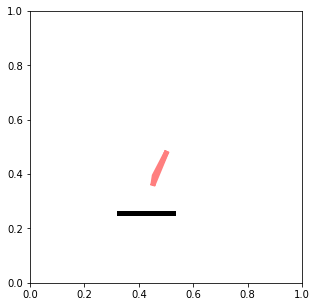

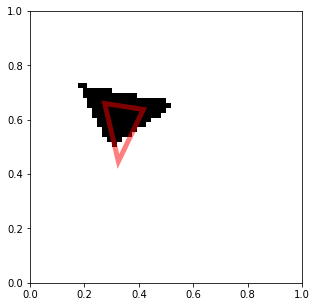

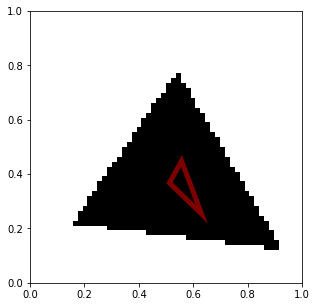

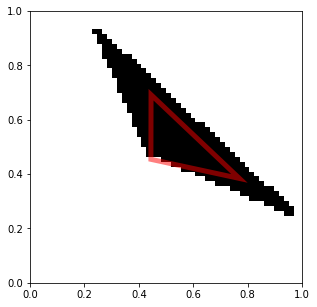

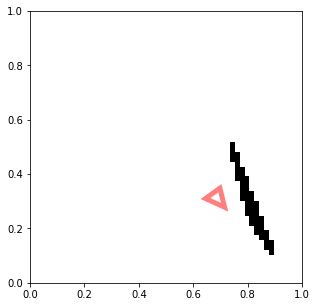

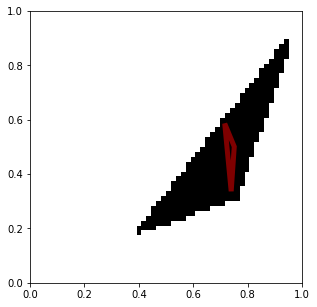

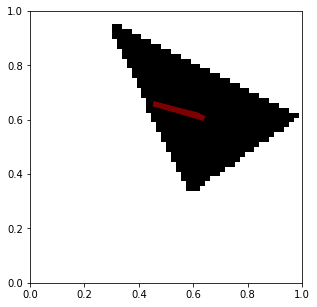

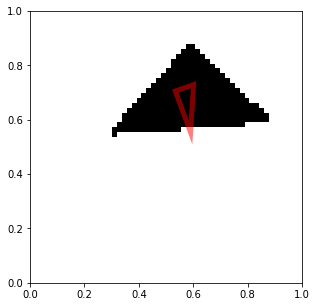

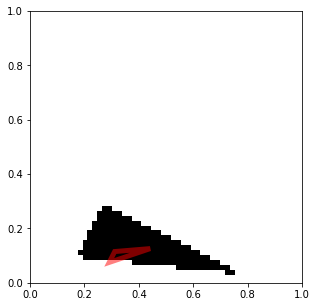

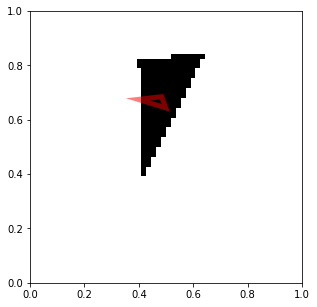

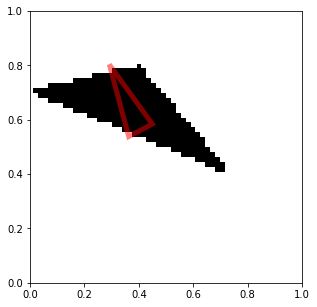

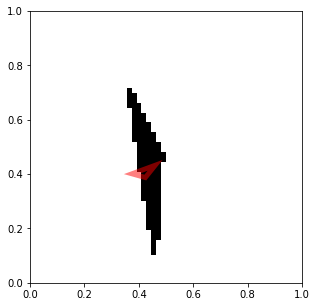

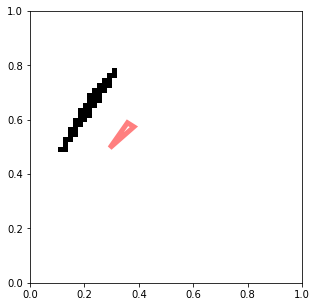

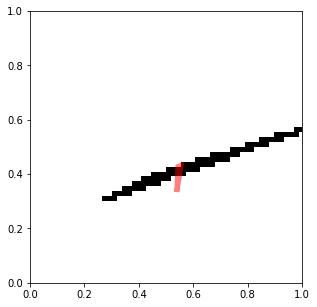

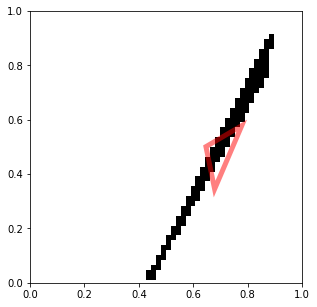

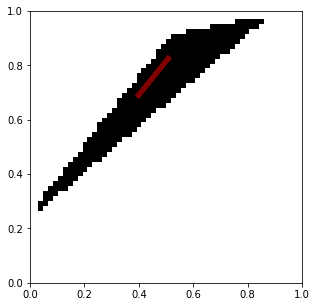

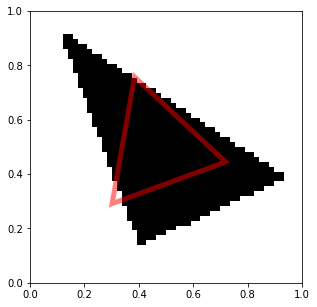

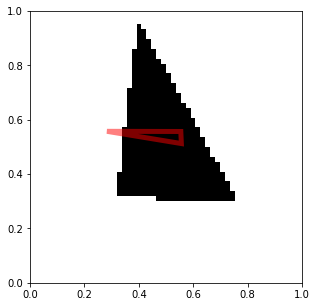

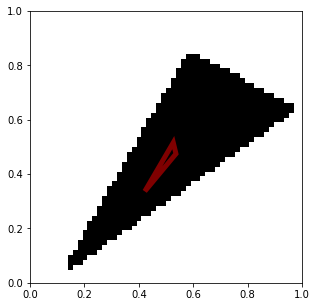

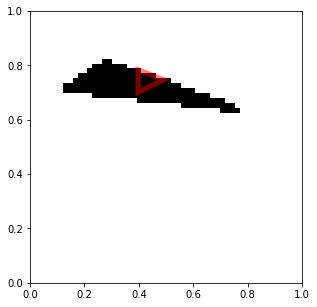

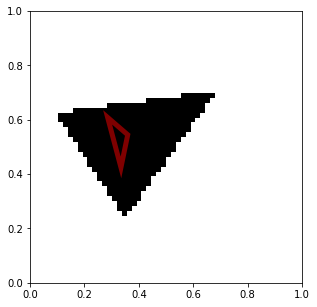

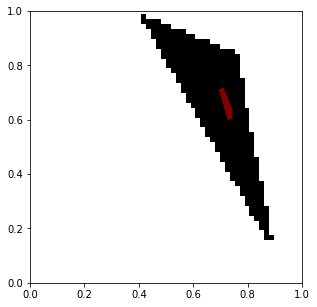

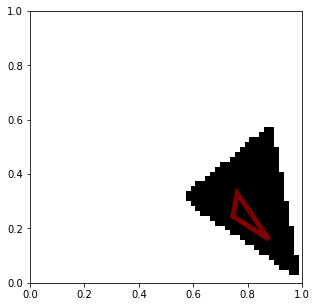

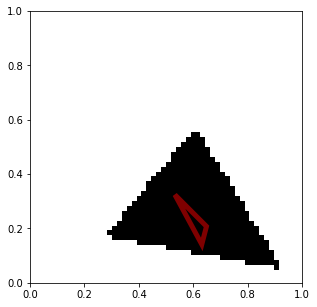

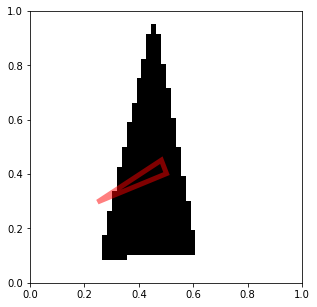

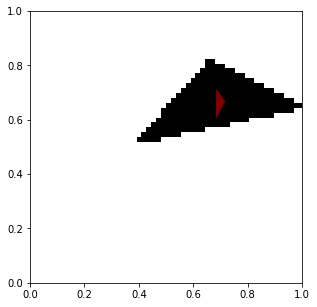

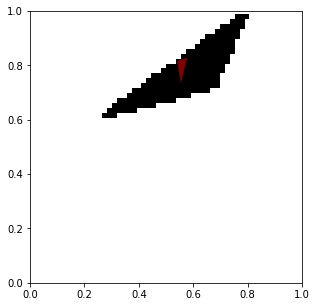

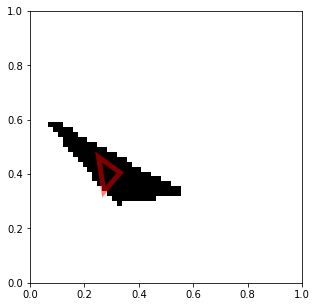

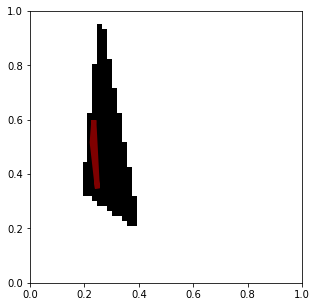

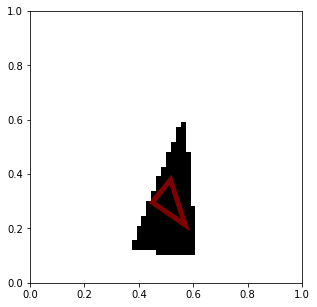

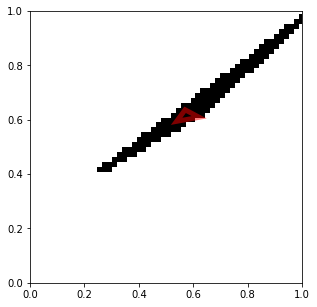

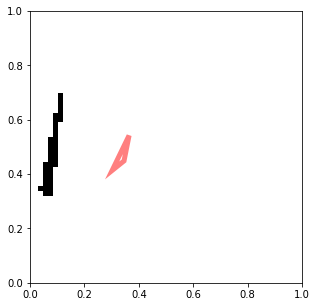

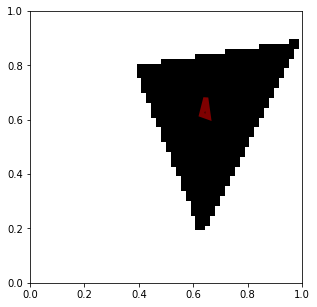

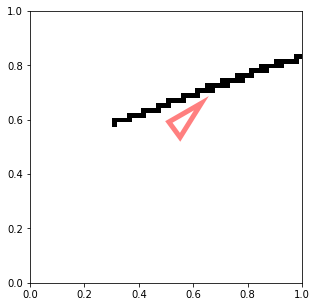

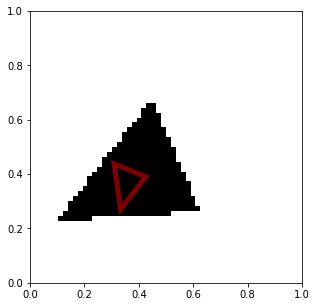

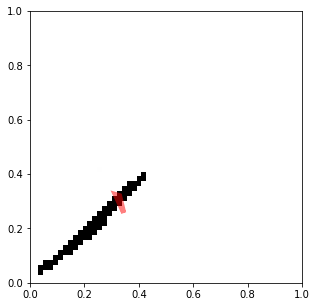

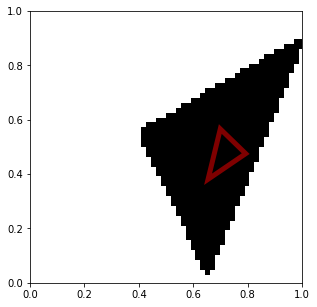

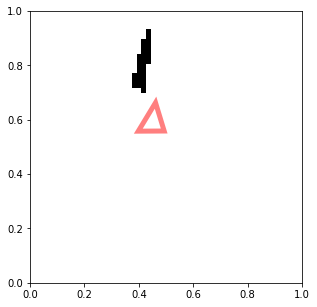

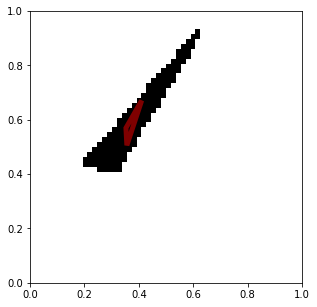

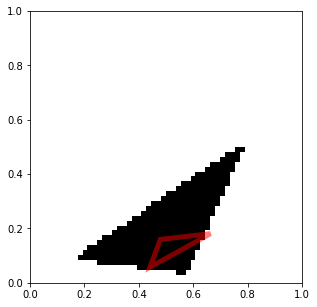

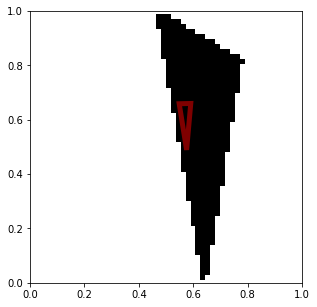

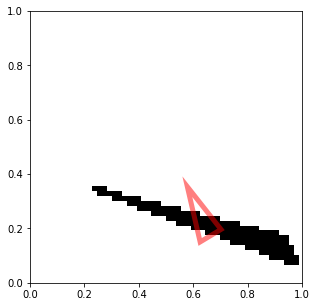

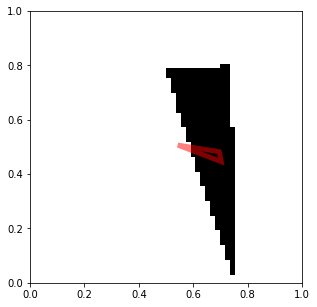

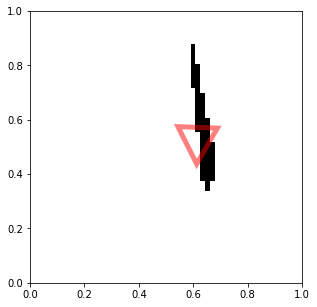

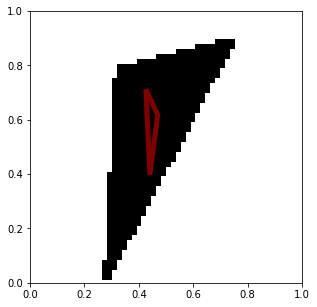

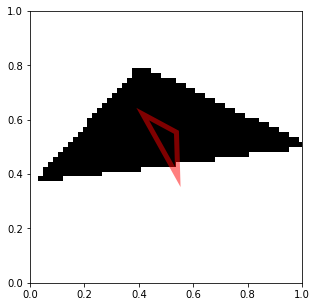

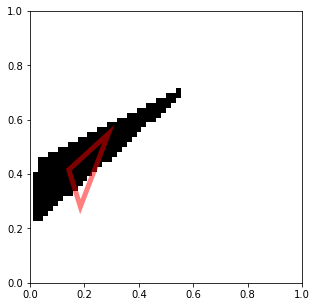

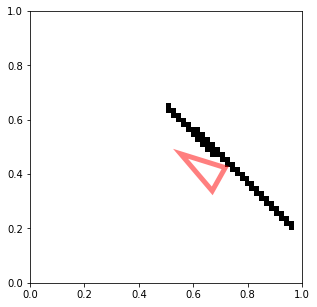

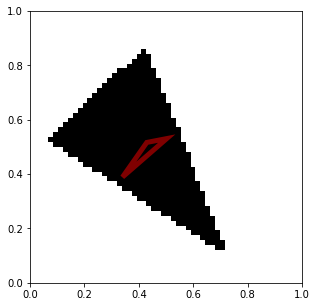

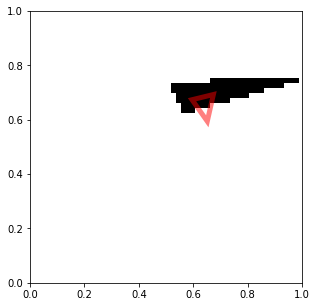

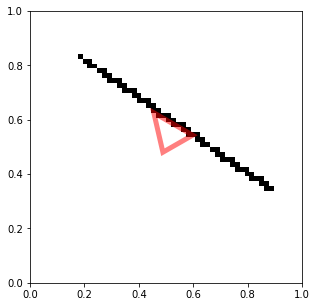

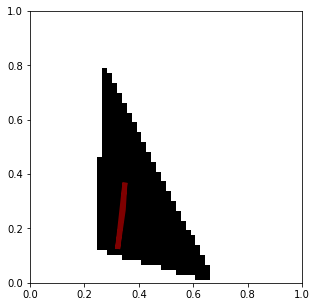

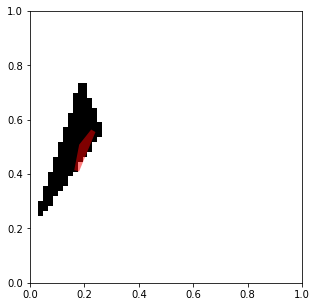

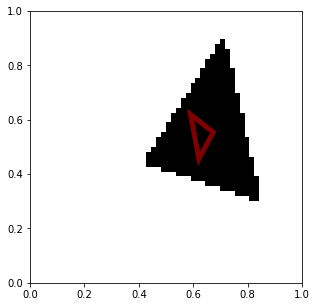

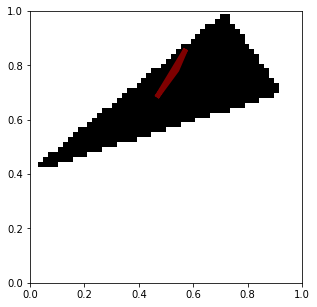

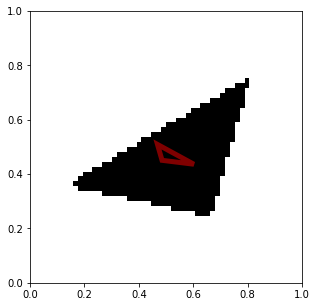

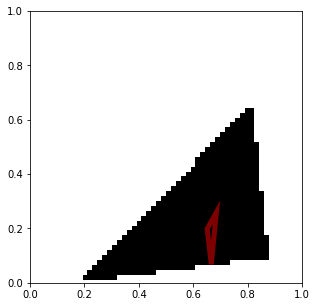

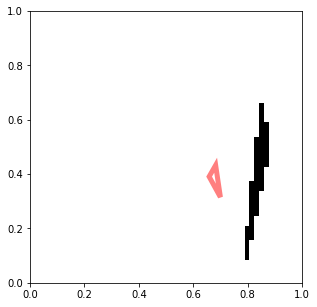

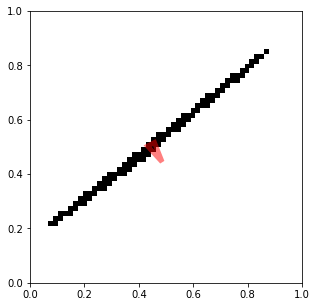

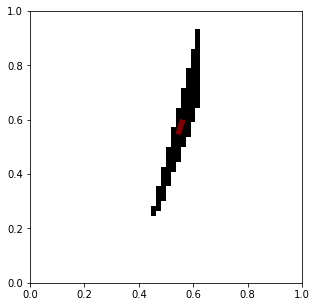

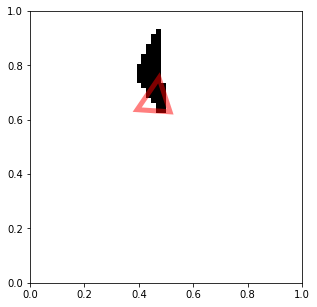

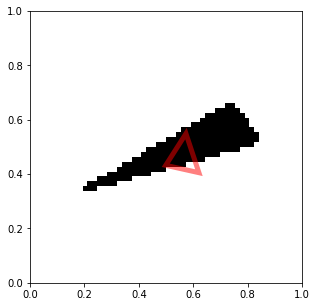

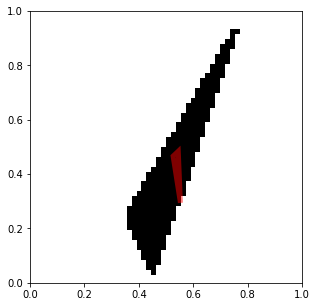

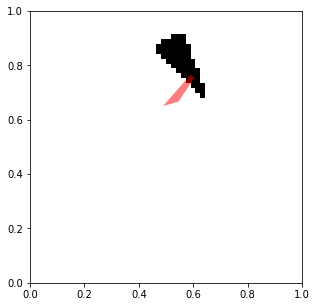

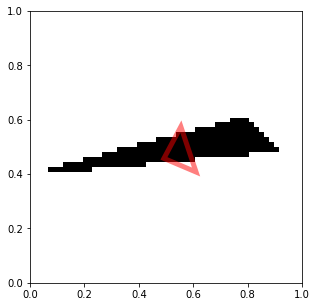

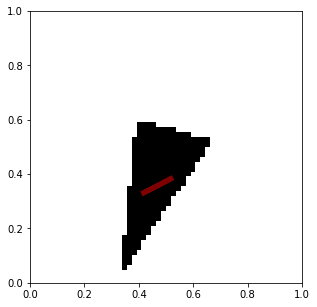

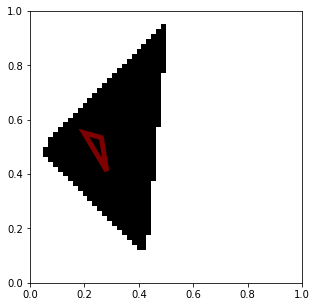

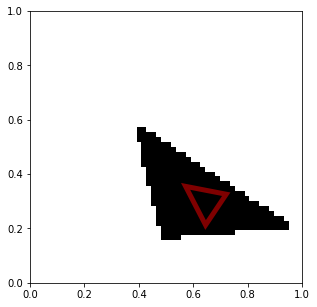

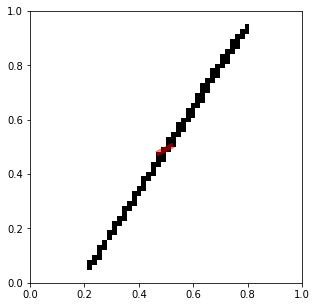

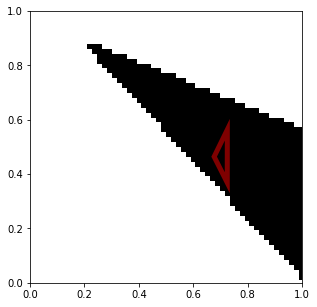

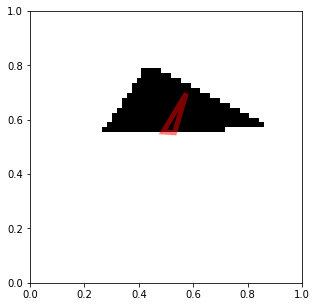

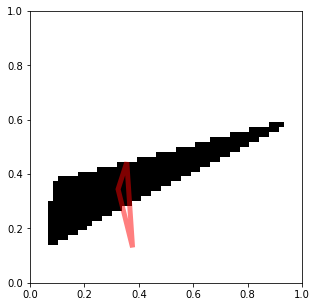

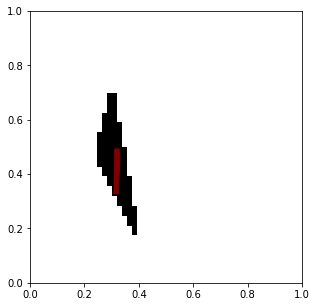

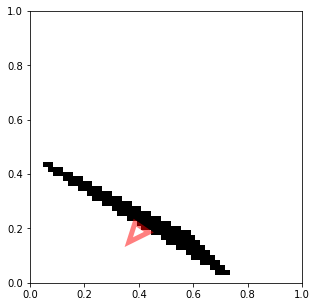

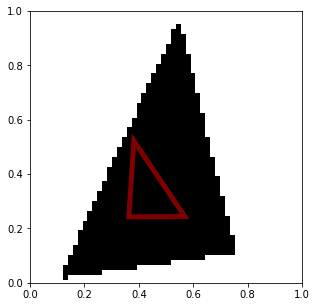

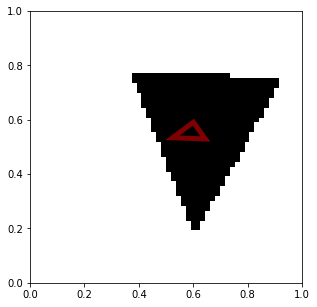

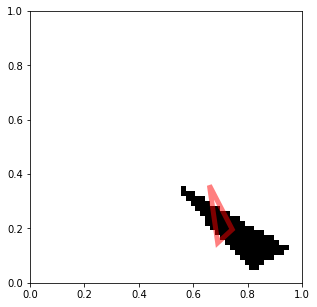

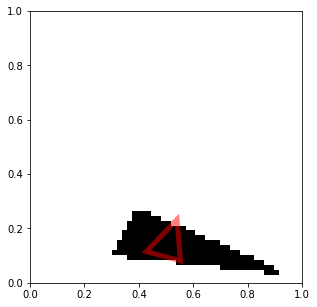

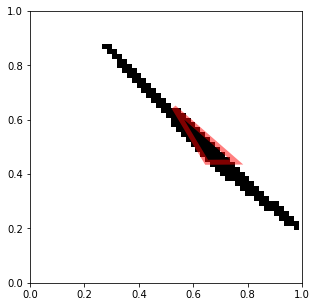

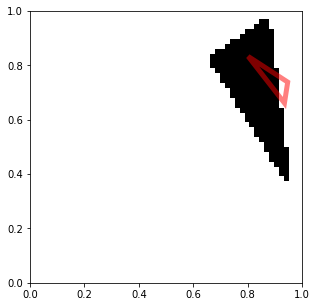

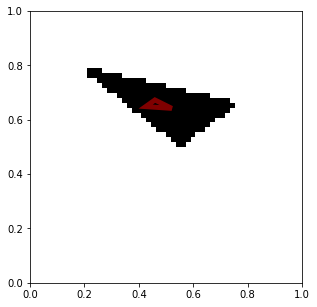

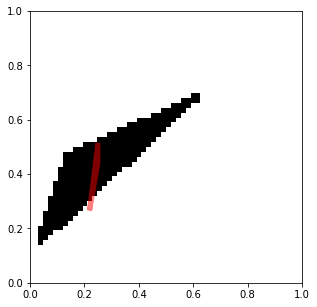

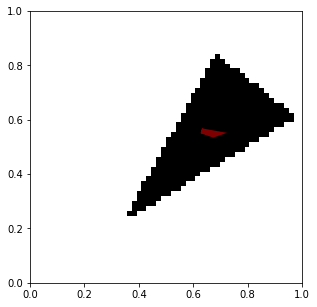

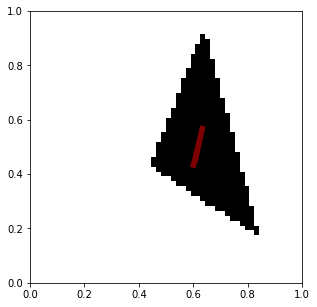

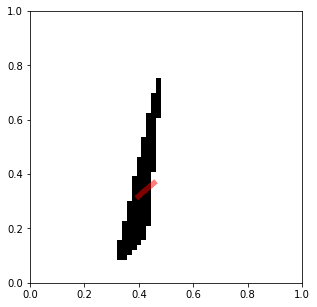

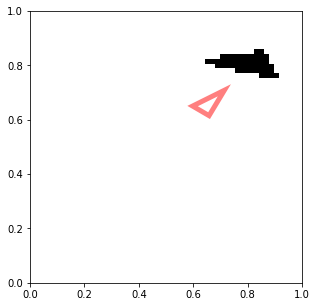

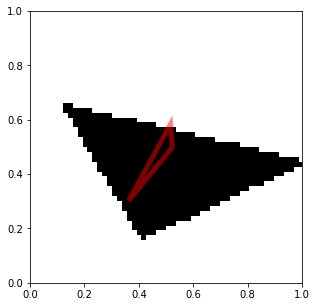

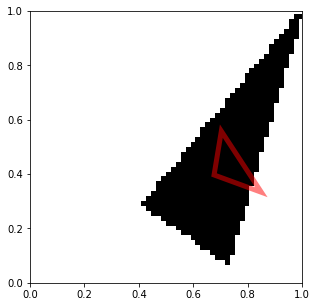

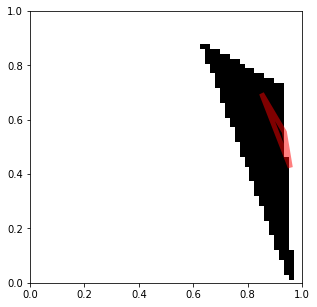

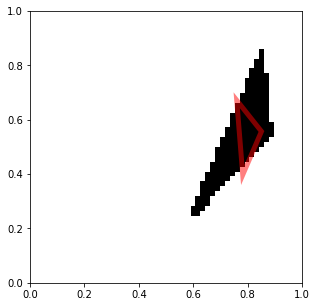

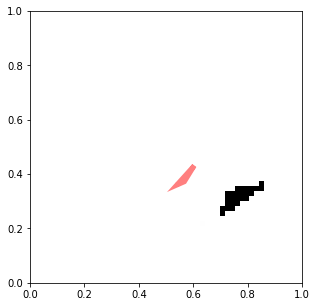

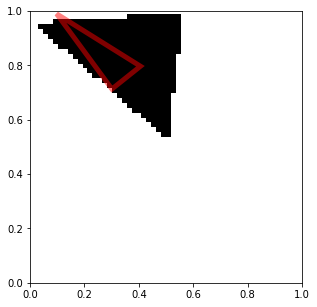

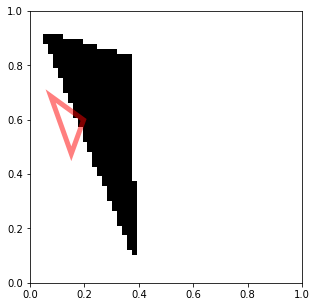

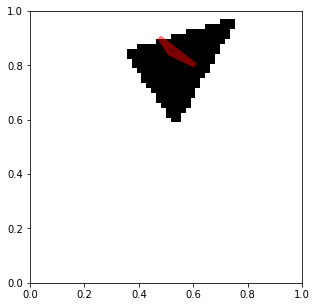

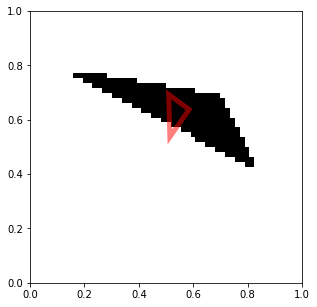

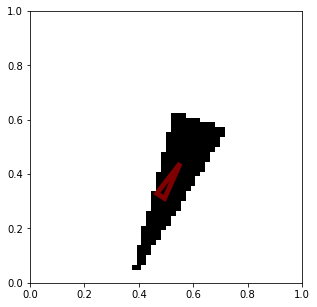

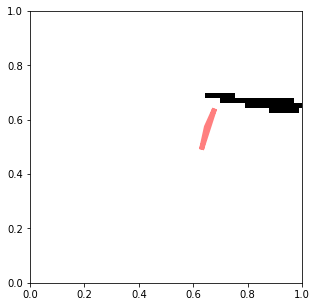

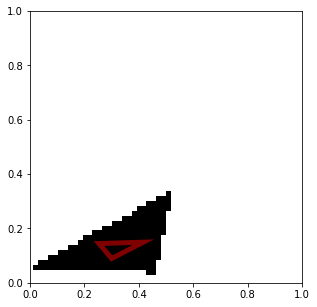

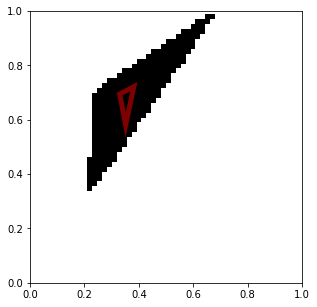

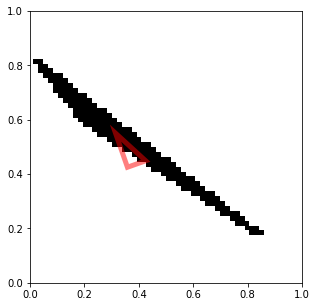

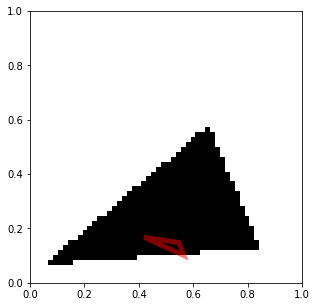

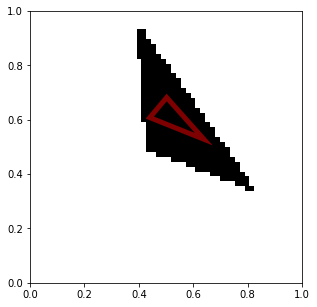

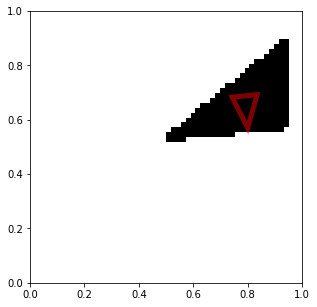

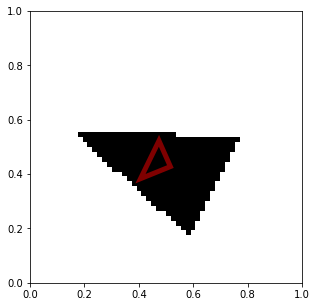

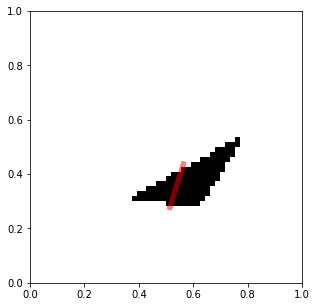

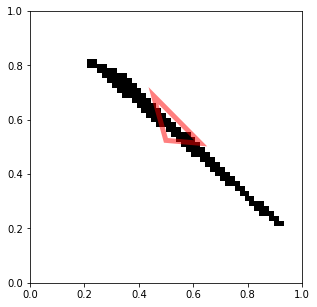

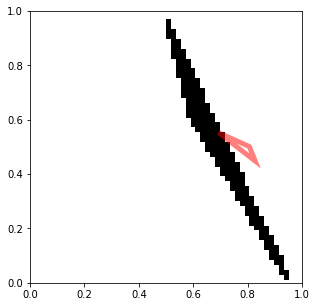

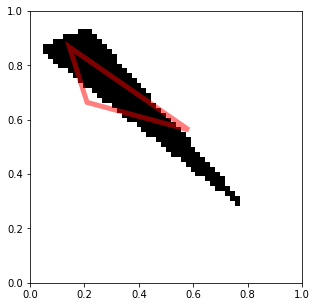

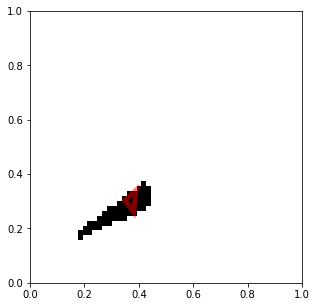

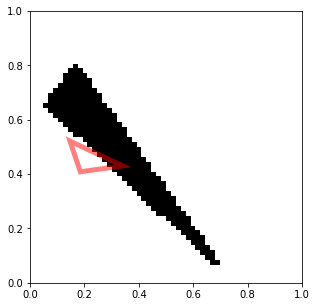

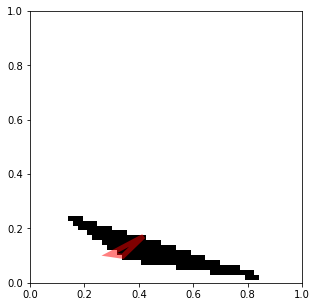

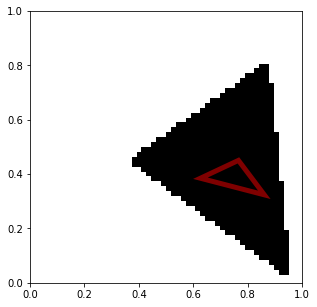

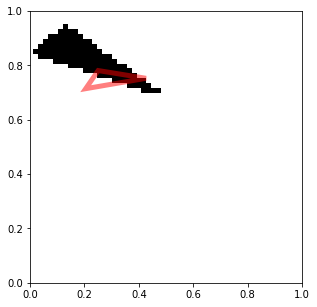

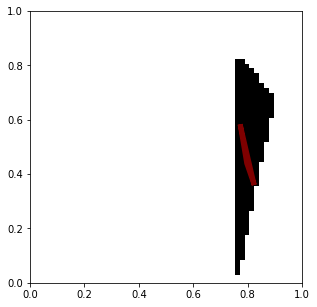

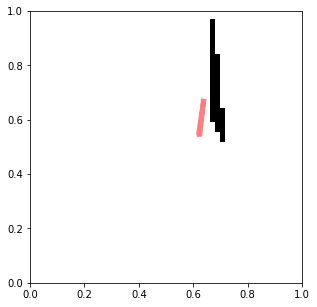

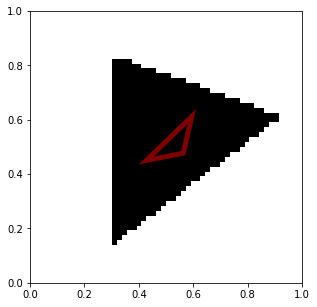

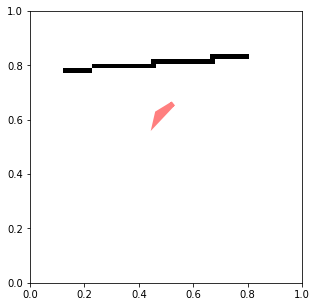

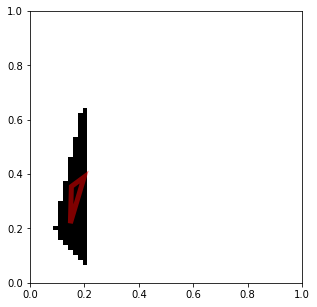

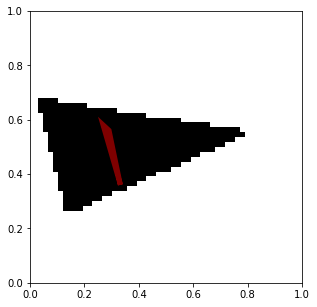

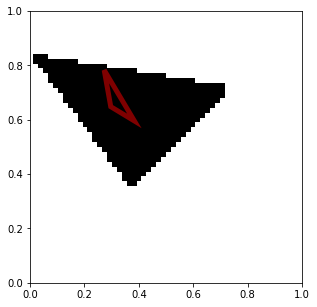

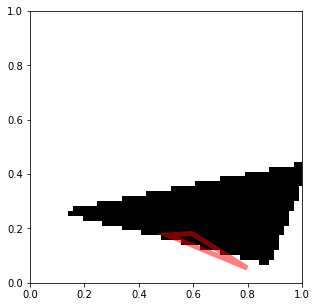

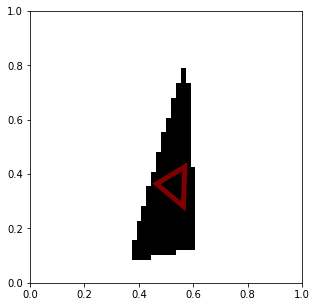

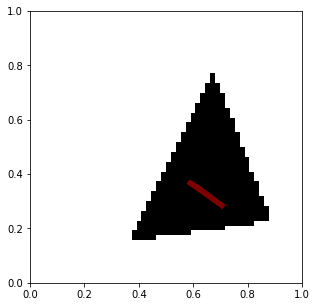

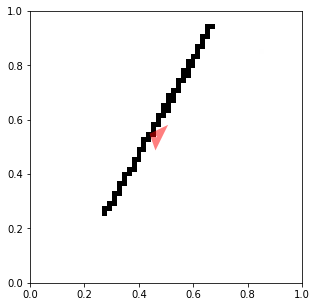

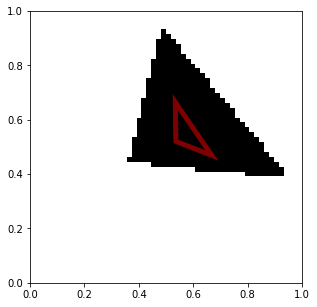

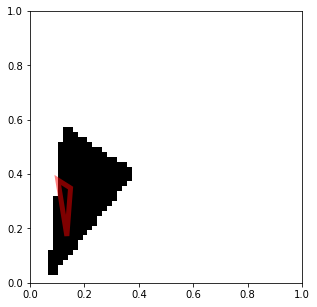

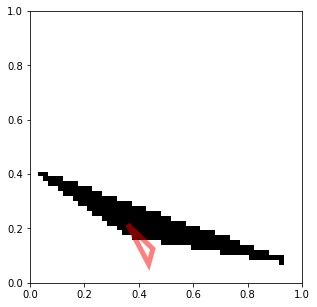

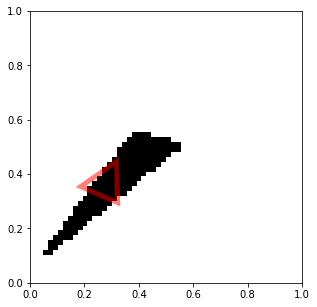

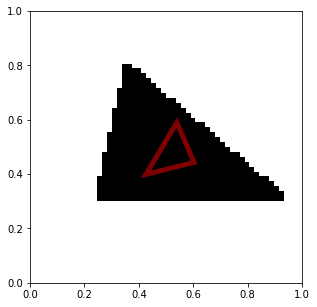

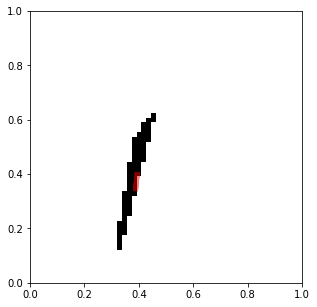

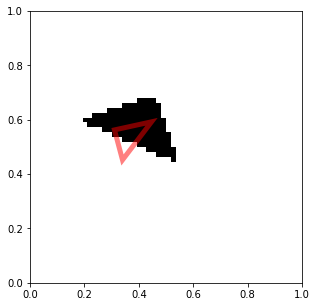

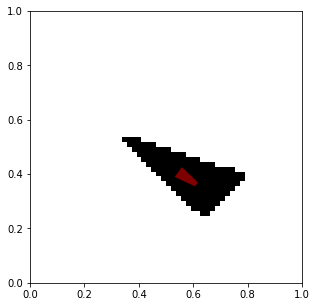

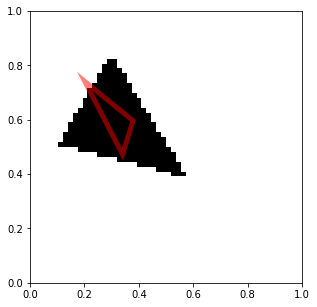

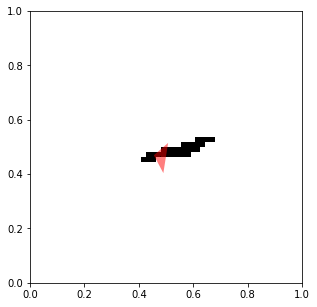

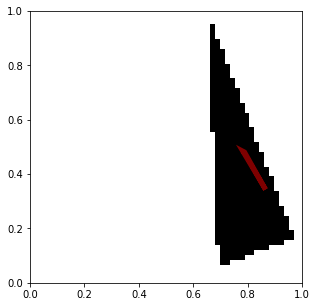

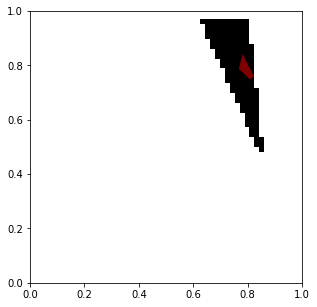

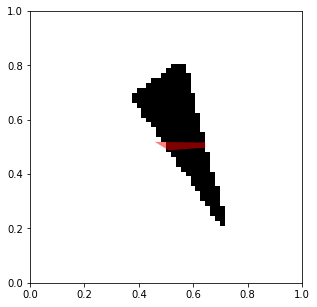

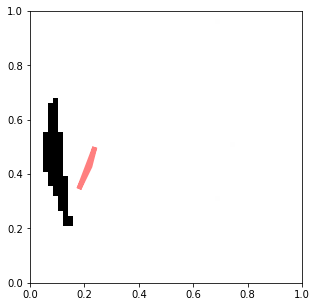

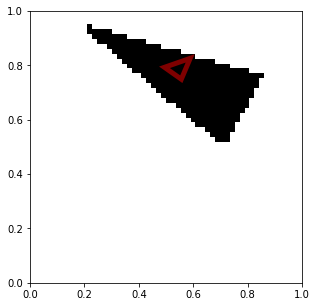

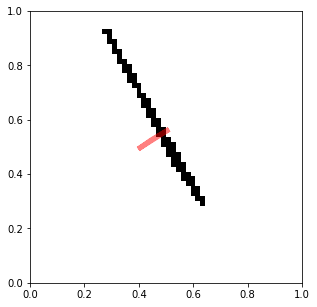

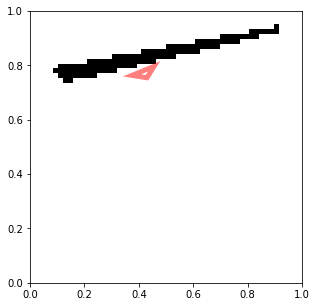

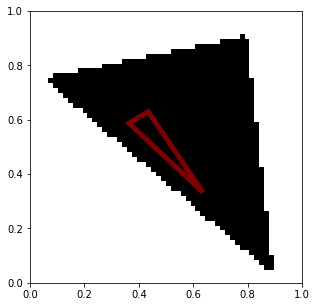

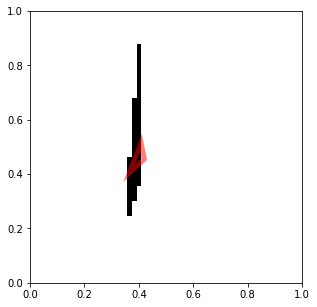

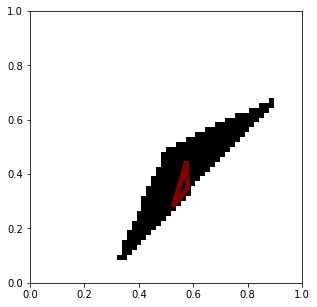

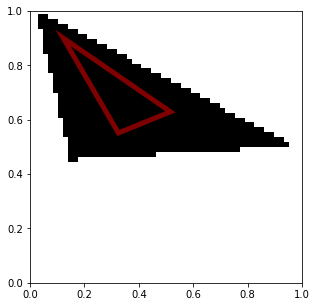

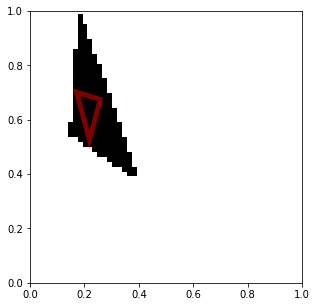

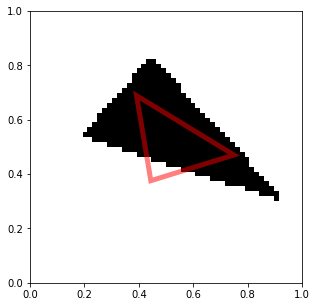

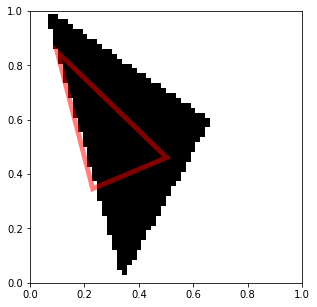

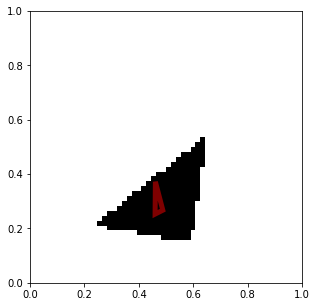

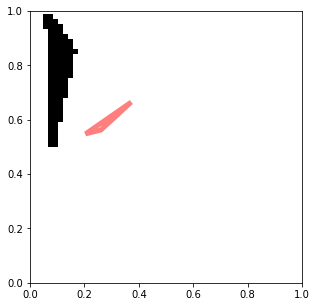

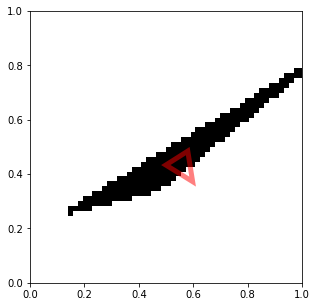

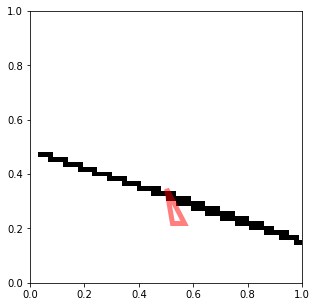

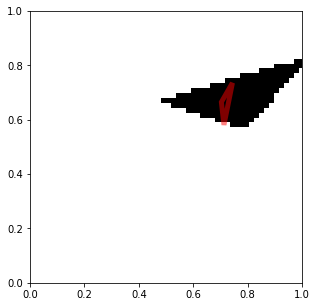

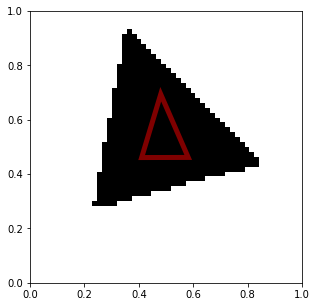

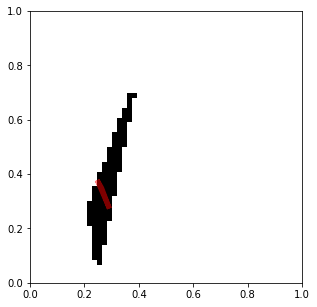

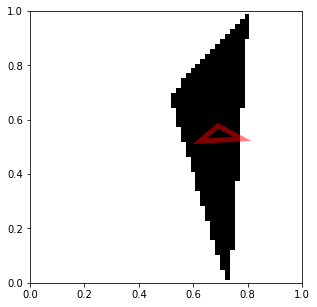

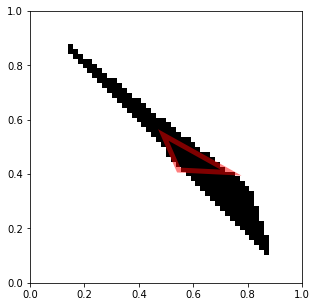

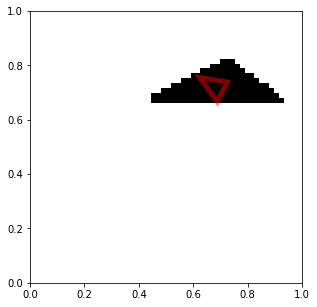

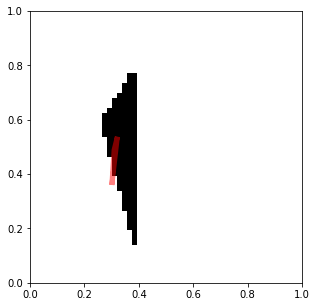

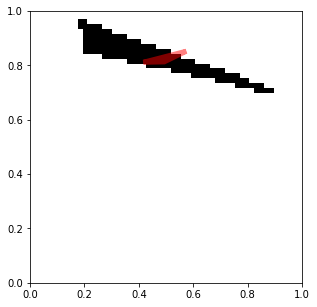

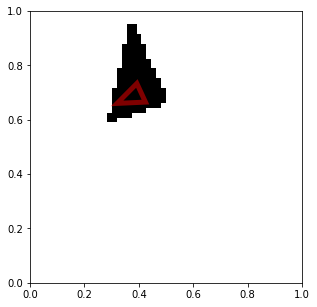

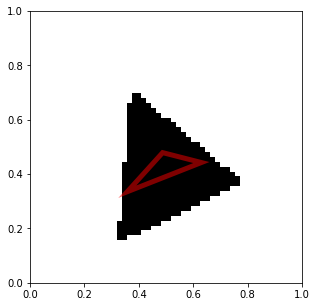

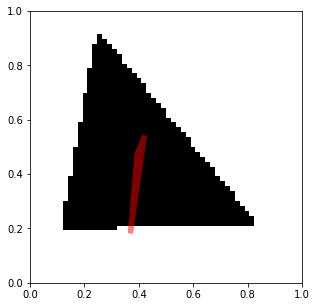

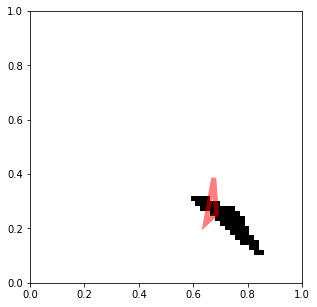

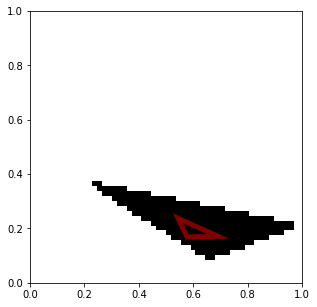

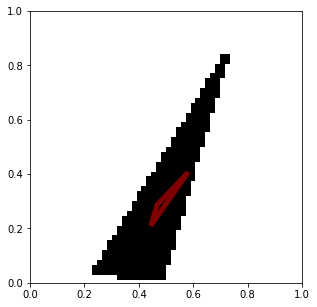

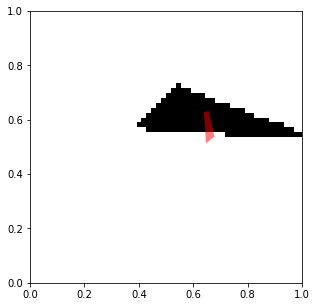

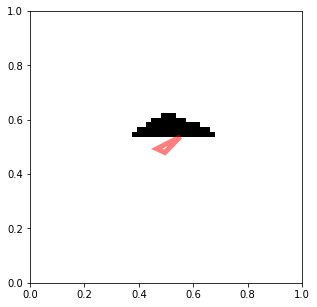

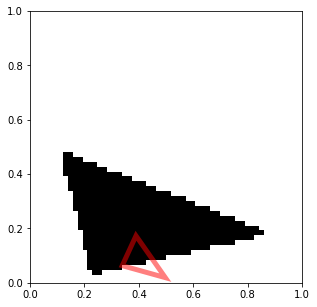

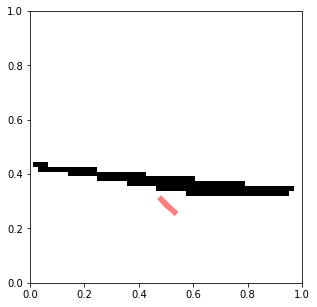

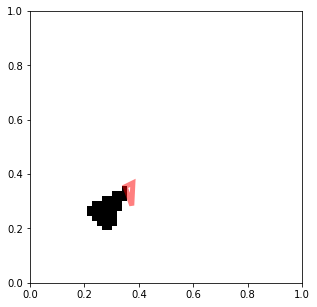

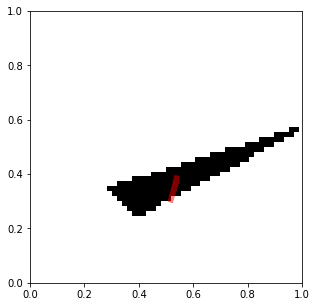

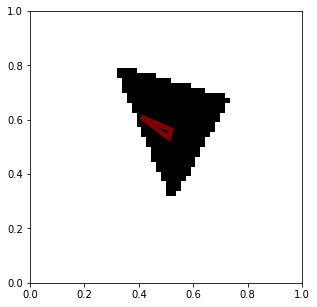

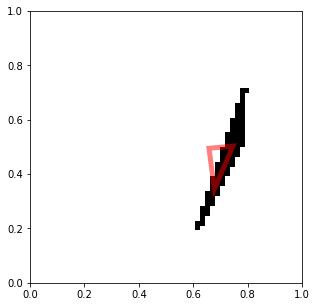

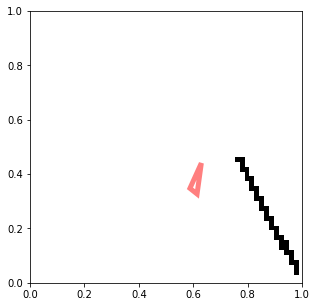

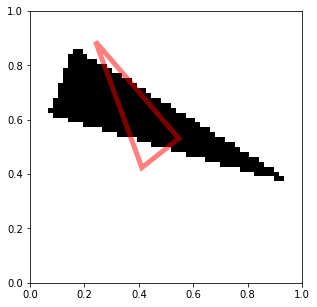

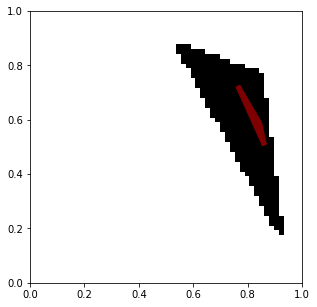

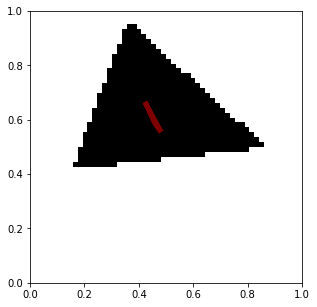

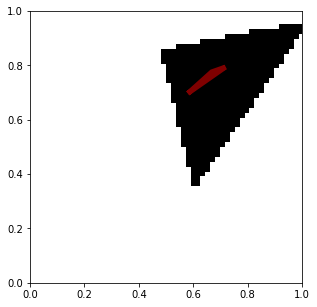

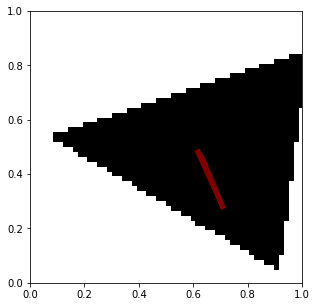

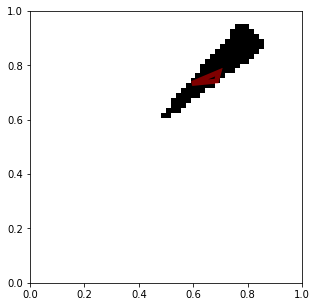

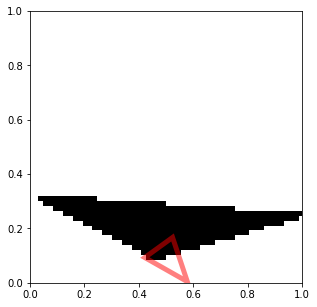

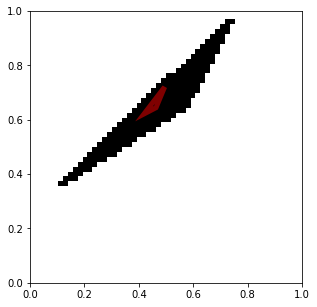

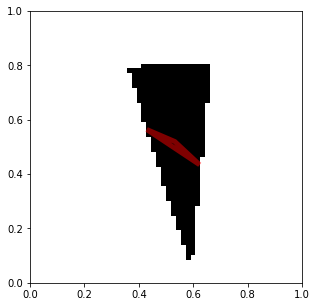

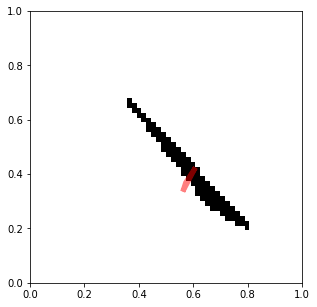

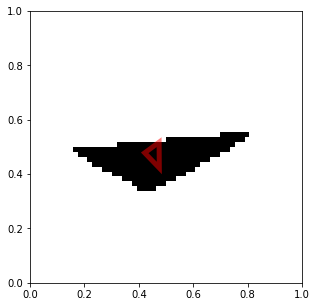

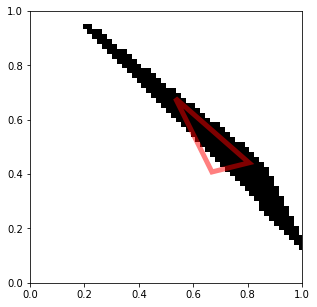

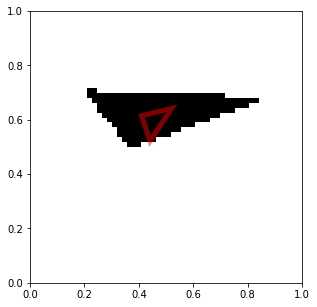

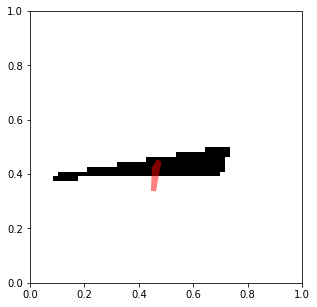

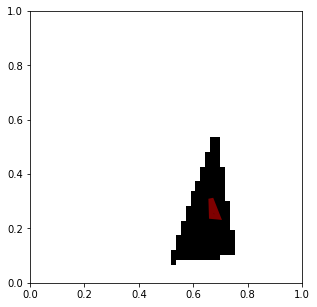

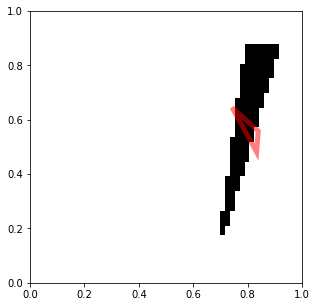

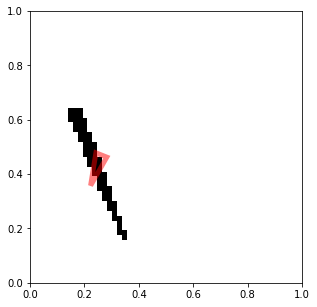

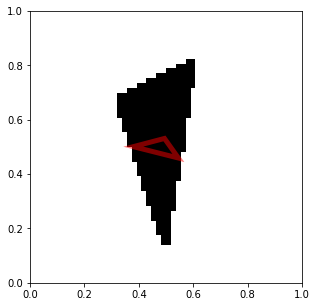

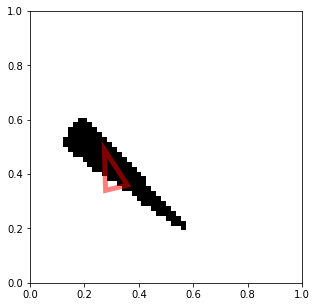

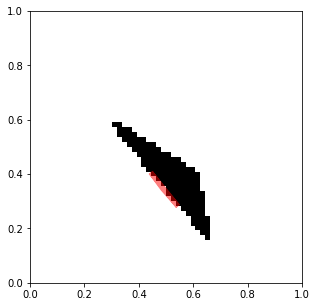

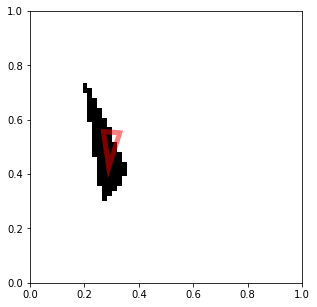

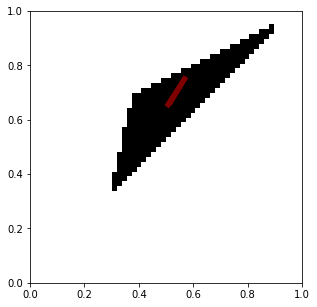

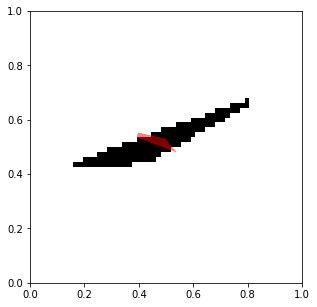

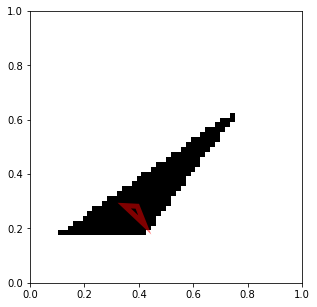

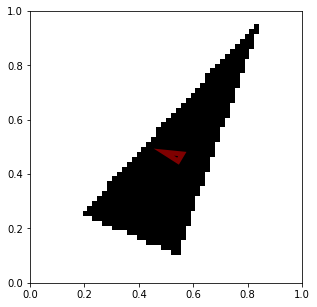

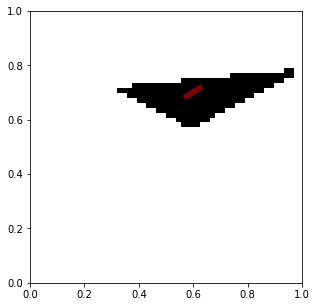

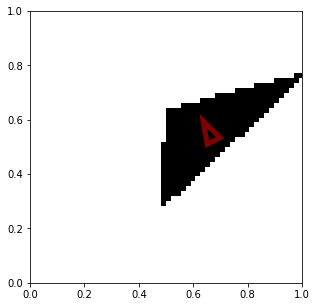

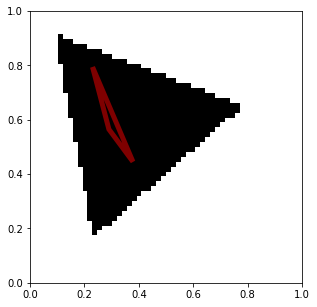

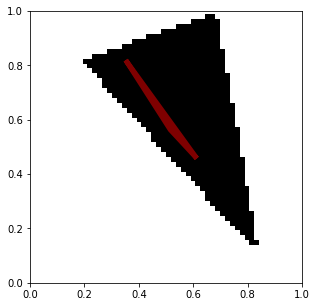

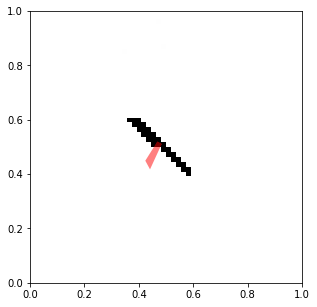

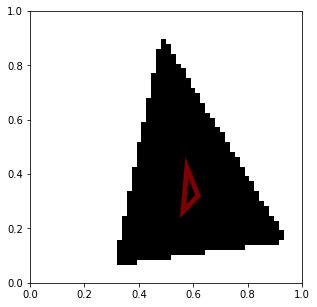

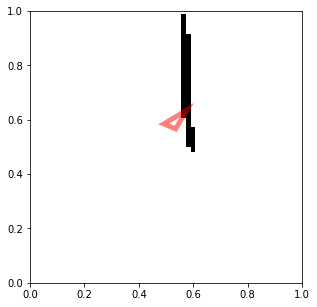

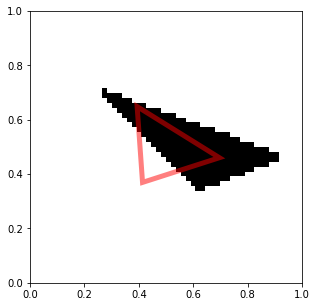

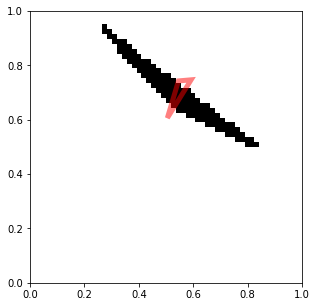

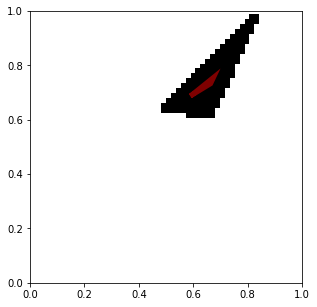

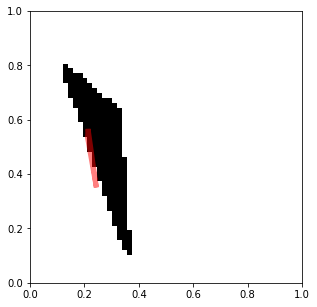

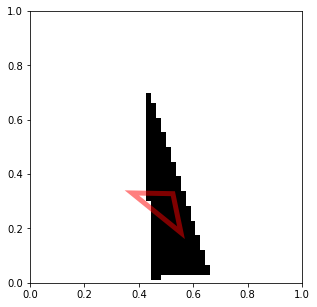

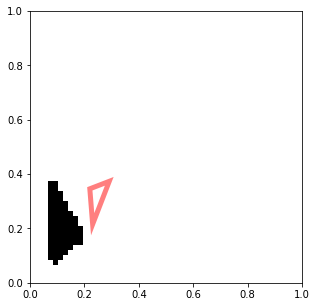

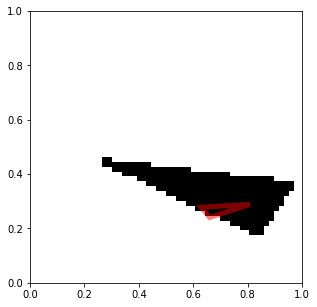

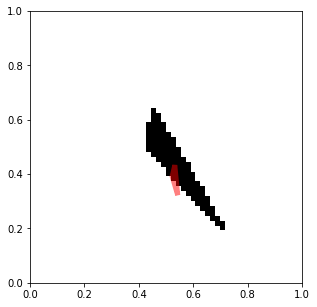

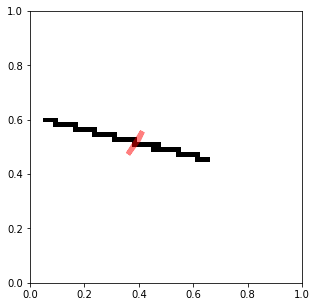

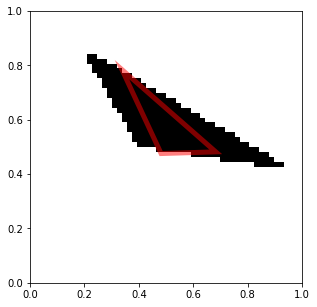

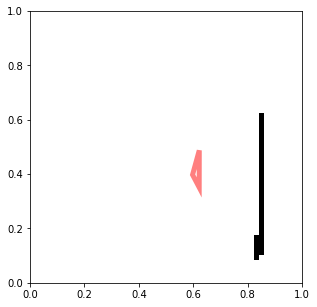

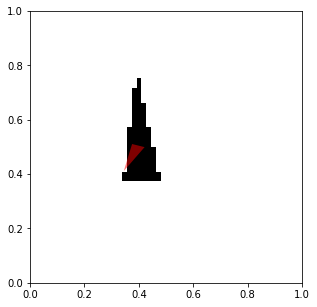

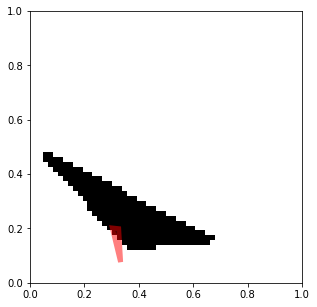

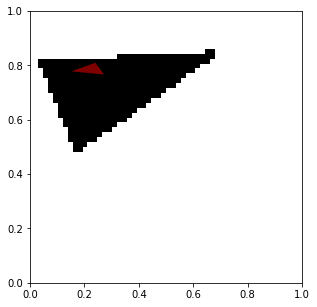

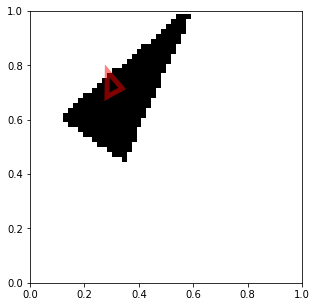

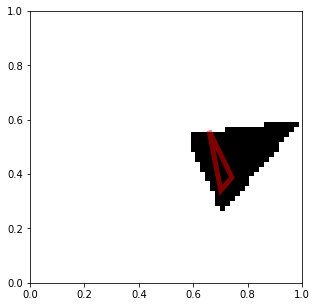

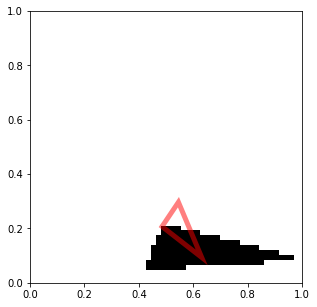

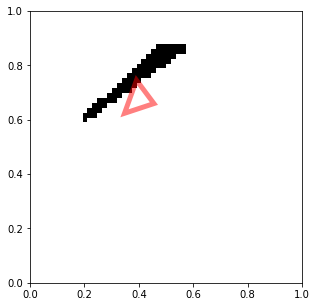

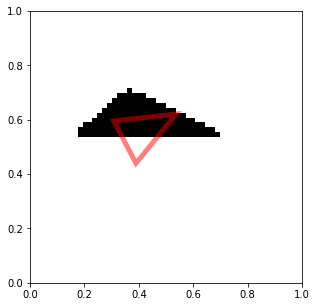

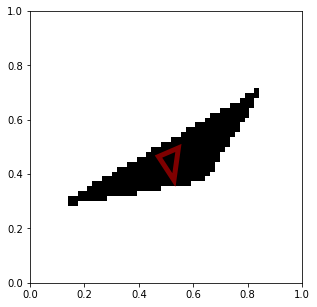

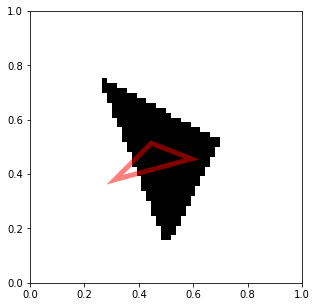

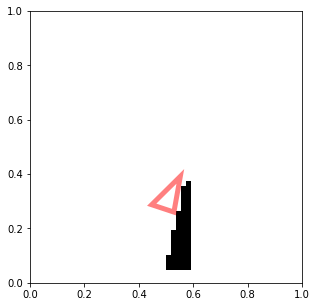

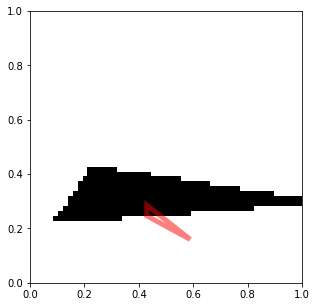

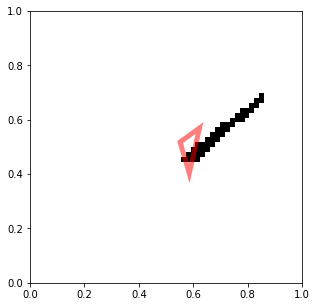

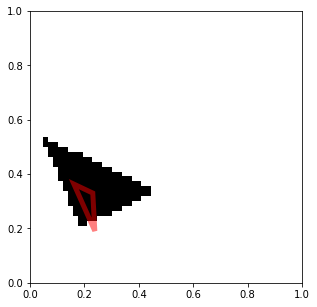

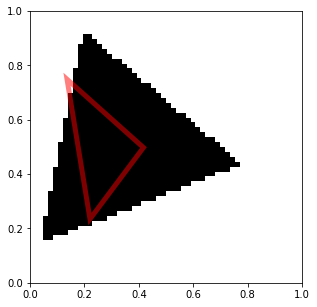

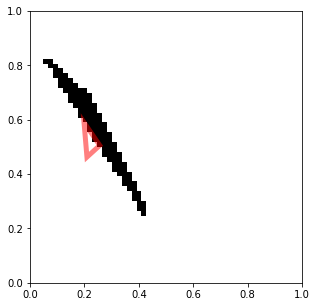

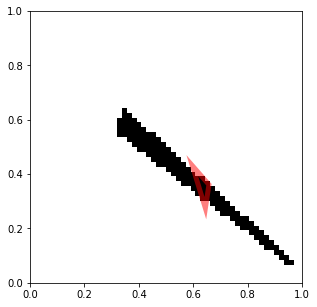

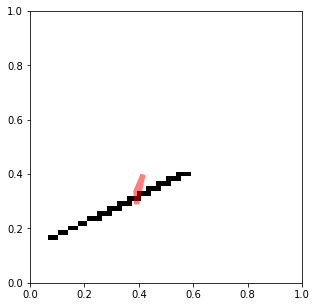

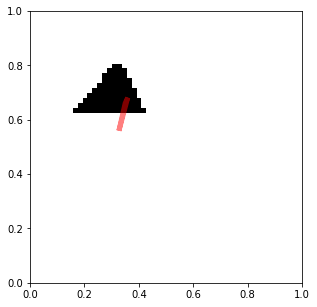

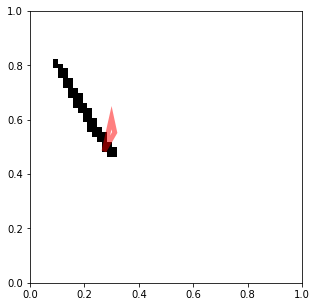

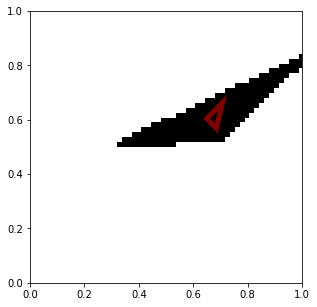

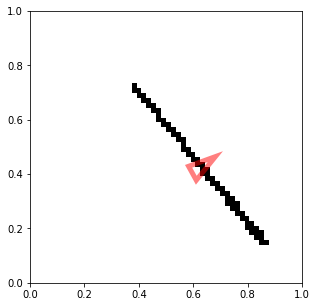

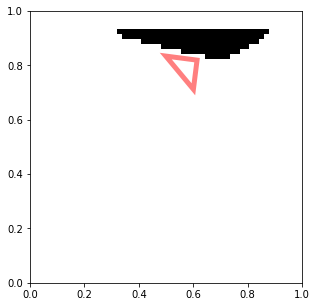

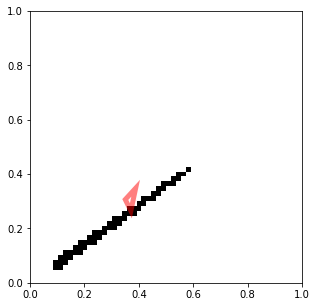

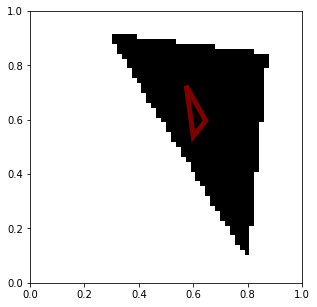

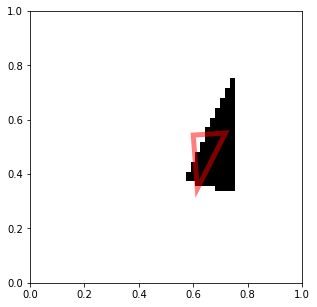

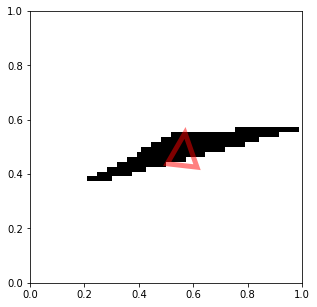

In [213]:
# 可视化
import torch
from torch.utils import data
dataset1 = generate_dataset_regression(400)
a = torch.tensor(dataset1[0].reshape(400,72,72)).unsqueeze(1)
b = torch.tensor(dataset1[1])
train_ids =torch.utils.data.TensorDataset(a,b)
print(train_ids)
test_size = 400
test_dataloader1 = torch.utils.data.DataLoader(train1, batch_size=1, shuffle=True)
##load your optimal model
model = ConvNetR()
model.load_state_dict(torch.load('E:/drive1/My Drive/FDL/model_100.pt')) 
test_losses=[]
for i, batch, in enumerate(test_dataloader1):
        img_batch1, lbl_batch1 = batch
        outputs=model(img_batch1.float())
        outputs1=outputs.cpu().detach().numpy()
        img_batch1=img_batch1.cpu().detach().numpy()
        visualize_prediction(img_batch1,outputs1)
# *****END CODE


In [215]:
# 创建测试集
import torch
from torch.utils import data
dataset1 = generate_dataset_regression(400)
a = torch.tensor(dataset1[0].reshape(400,72,72)).unsqueeze(1)
b = torch.tensor(dataset1[1])
train_ids =torch.utils.data.TensorDataset(a,b)
print(train_ids)
test_size = 400
test_dataloader1 = torch.utils.data.DataLoader(train1, batch_size=1, shuffle=True)
##load your optimal model
# *****START CODE
model = ConvNetR()
# 这是训练的权重
model.load_state_dict(torch.load('E:/drive1/My Drive/FDL/model_100.pt')) 

test_losses=[]
for i, batch, in enumerate(tqdm(test_dataloader1)):
        img_batch1, lbl_batch1 = batch
        outputs=model(img_batch1.float())
        outputs1=outputs.cpu().detach().numpy()
        img_batch1=img_batch1.cpu().detach().numpy()
        loss=criterion(outputs.float(), lbl_batch1.float())
        test_losses.append(loss.item())

print(test_losses)
# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 1874.15it/s]

[0.03198296204209328, 0.015094302594661713, 0.018302548676729202, 0.09054940193891525, 0.041192855685949326, 0.033990245312452316, 0.05683453008532524, 0.031831033527851105, 0.037492405623197556, 0.0786486342549324, 0.02790873870253563, 0.08959172666072845, 0.050436485558748245, 0.03972259908914566, 0.10101693123579025, 0.10519245266914368, 0.03879472240805626, 0.07010845839977264, 0.12256227433681488, 0.06776176393032074, 0.03365367278456688, 0.056309934705495834, 0.07911165803670883, 0.035864900797605515, 0.07991299033164978, 0.06590718030929565, 0.03175654634833336, 0.08805905282497406, 0.07581184059381485, 0.017182379961013794, 0.03892314434051514, 0.03198941424489021, 0.03166220709681511, 0.09103663265705109, 0.07500279694795609, 0.05513100326061249, 0.014847191981971264, 0.08462372422218323, 0.03653329238295555, 0.03119100071489811, 0.04642558842897415, 0.03068733960390091, 0.017129138112068176, 0.11732183396816254, 0.0626261904835701, 0.026173753663897514, 0.04532381147146225, 0

通过测试集的表现来看，效果不好，可以通过增加层数，改变网络结构的方法进行解决。

2g) Think and implement a preprocessing step that can boost the accuracy of your network

 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 54.67it/s]

Train (epoch 1/200) [0/40 (0%)]	Loss: 0.284689


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 65.82it/s]

TRAIN_LOSS:  0.332
VAL_LOSS:  0.282
Train (epoch 2/200) [0/40 (0%)]	Loss: 0.358363


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 77.30it/s]

TRAIN_LOSS:  0.256
VAL_LOSS:  0.218
Train (epoch 3/200) [0/40 (0%)]	Loss: 0.222167


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 75.24it/s]

TRAIN_LOSS:  0.198
VAL_LOSS:  0.170
Train (epoch 4/200) [0/40 (0%)]	Loss: 0.206718


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 74.74it/s]

TRAIN_LOSS:  0.155
VAL_LOSS:  0.135
Train (epoch 5/200) [0/40 (0%)]	Loss: 0.121795


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 62.44it/s]

TRAIN_LOSS:  0.123
VAL_LOSS:  0.109
Train (epoch 6/200) [0/40 (0%)]	Loss: 0.119140


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 78.98it/s]

TRAIN_LOSS:  0.098
VAL_LOSS:  0.091
Train (epoch 7/200) [0/40 (0%)]	Loss: 0.088593


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 61.73it/s]

TRAIN_LOSS:  0.084
VAL_LOSS:  0.085
Train (epoch 8/200) [0/40 (0%)]	Loss: 0.077583


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 76.53it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 9/200) [0/40 (0%)]	Loss: 0.089402


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.24it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 10/200) [0/40 (0%)]	Loss: 0.084874


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 56.17it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 11/200) [0/40 (0%)]	Loss: 0.075489


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 69.89it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 12/200) [0/40 (0%)]	Loss: 0.075986


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 73.20it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 13/200) [0/40 (0%)]	Loss: 0.088937


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 68.20it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 14/200) [0/40 (0%)]	Loss: 0.071047


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 57.48it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 15/200) [0/40 (0%)]	Loss: 0.078649


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 88.14it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 16/200) [0/40 (0%)]	Loss: 0.079803


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.51it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 17/200) [0/40 (0%)]	Loss: 0.077144


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 79.37it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 18/200) [0/40 (0%)]	Loss: 0.090583


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 95.47it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 19/200) [0/40 (0%)]	Loss: 0.080180


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 75.10it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 20/200) [0/40 (0%)]	Loss: 0.081158


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 90.59it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 21/200) [0/40 (0%)]	Loss: 0.083332


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 85.93it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 22/200) [0/40 (0%)]	Loss: 0.079120


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.37it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 23/200) [0/40 (0%)]	Loss: 0.075868


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 89.90it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 24/200) [0/40 (0%)]	Loss: 0.086305


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.66it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 25/200) [0/40 (0%)]	Loss: 0.086627


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 92.22it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 26/200) [0/40 (0%)]	Loss: 0.069769


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 89.95it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 27/200) [0/40 (0%)]	Loss: 0.079239


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 67.40it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 28/200) [0/40 (0%)]	Loss: 0.076140


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 81.16it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 29/200) [0/40 (0%)]	Loss: 0.071715


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 57.82it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 30/200) [0/40 (0%)]	Loss: 0.085521


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 41.69it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 31/200) [0/40 (0%)]	Loss: 0.070115


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 52.44it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 32/200) [0/40 (0%)]	Loss: 0.067002


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 71.09it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 33/200) [0/40 (0%)]	Loss: 0.088740


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 77.25it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 34/200) [0/40 (0%)]	Loss: 0.067586


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 88.93it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 35/200) [0/40 (0%)]	Loss: 0.088539


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 84.23it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 36/200) [0/40 (0%)]	Loss: 0.082890


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 63.02it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 37/200) [0/40 (0%)]	Loss: 0.069110


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 92.43it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 38/200) [0/40 (0%)]	Loss: 0.096658


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 75.23it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 39/200) [0/40 (0%)]	Loss: 0.071854


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.26it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 40/200) [0/40 (0%)]	Loss: 0.082440


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 85.20it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 41/200) [0/40 (0%)]	Loss: 0.092104


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 86.98it/s]

TRAIN_LOSS:  0.081
VAL_LOSS:  0.085
Train (epoch 42/200) [0/40 (0%)]	Loss: 0.093755


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.31it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 43/200) [0/40 (0%)]	Loss: 0.087392


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 82.95it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 44/200) [0/40 (0%)]	Loss: 0.095183


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 79.93it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 45/200) [0/40 (0%)]	Loss: 0.071474


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 86.05it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 46/200) [0/40 (0%)]	Loss: 0.081827


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 66.62it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 47/200) [0/40 (0%)]	Loss: 0.074606


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 86.59it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 48/200) [0/40 (0%)]	Loss: 0.088601


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 62.75it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 49/200) [0/40 (0%)]	Loss: 0.075803


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 63.07it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 50/200) [0/40 (0%)]	Loss: 0.079748


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.28it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 51/200) [0/40 (0%)]	Loss: 0.081258


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 69.78it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 52/200) [0/40 (0%)]	Loss: 0.076320


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 98.19it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 53/200) [0/40 (0%)]	Loss: 0.078807


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 98.28it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 54/200) [0/40 (0%)]	Loss: 0.080606


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 95.13it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 55/200) [0/40 (0%)]	Loss: 0.092292


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 59.87it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 56/200) [0/40 (0%)]	Loss: 0.094059


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.18it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 57/200) [0/40 (0%)]	Loss: 0.078396


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 86.46it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 58/200) [0/40 (0%)]	Loss: 0.088126


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 79.05it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 59/200) [0/40 (0%)]	Loss: 0.088005


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 86.61it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 60/200) [0/40 (0%)]	Loss: 0.078949


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.17it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 61/200) [0/40 (0%)]	Loss: 0.066920


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 85.17it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 62/200) [0/40 (0%)]	Loss: 0.094401


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 80.82it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 63/200) [0/40 (0%)]	Loss: 0.097950


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 67.00it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 64/200) [0/40 (0%)]	Loss: 0.067812


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 88.26it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 65/200) [0/40 (0%)]	Loss: 0.074628


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 84.17it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 66/200) [0/40 (0%)]	Loss: 0.076510


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 62.56it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 67/200) [0/40 (0%)]	Loss: 0.063407


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.18it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 68/200) [0/40 (0%)]	Loss: 0.091691


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 85.13it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 69/200) [0/40 (0%)]	Loss: 0.075797


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 85.23it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 70/200) [0/40 (0%)]	Loss: 0.086480


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 81.90it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 71/200) [0/40 (0%)]	Loss: 0.085351


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 86.73it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 72/200) [0/40 (0%)]	Loss: 0.075823


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 69.11it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 73/200) [0/40 (0%)]	Loss: 0.092361


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 73.78it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 74/200) [0/40 (0%)]	Loss: 0.070842


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 79.58it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 75/200) [0/40 (0%)]	Loss: 0.091350


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 92.65it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 76/200) [0/40 (0%)]	Loss: 0.081662


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 53.31it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 77/200) [0/40 (0%)]	Loss: 0.081574


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.44it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 78/200) [0/40 (0%)]	Loss: 0.077733


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 77.52it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 79/200) [0/40 (0%)]	Loss: 0.065566


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 85.62it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 80/200) [0/40 (0%)]	Loss: 0.083173


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 74.85it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 81/200) [0/40 (0%)]	Loss: 0.081106


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 84.07it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 82/200) [0/40 (0%)]	Loss: 0.081075


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 78.54it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 83/200) [0/40 (0%)]	Loss: 0.063998


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 81.11it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 84/200) [0/40 (0%)]	Loss: 0.088258


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 59.58it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 85/200) [0/40 (0%)]	Loss: 0.074833


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.60it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 86/200) [0/40 (0%)]	Loss: 0.095430


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 78.40it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 87/200) [0/40 (0%)]	Loss: 0.076567


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.53it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 88/200) [0/40 (0%)]	Loss: 0.062021


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 84.76it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 89/200) [0/40 (0%)]	Loss: 0.075830


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 63.88it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 90/200) [0/40 (0%)]	Loss: 0.081240


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 82.01it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 91/200) [0/40 (0%)]	Loss: 0.080553


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 59.56it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 92/200) [0/40 (0%)]	Loss: 0.089192


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 67.17it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 93/200) [0/40 (0%)]	Loss: 0.072761


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 68.58it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 94/200) [0/40 (0%)]	Loss: 0.098356


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 64.76it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 95/200) [0/40 (0%)]	Loss: 0.067416


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 85.27it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 96/200) [0/40 (0%)]	Loss: 0.086720


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 74.43it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 97/200) [0/40 (0%)]	Loss: 0.075358


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 66.64it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.085
Train (epoch 98/200) [0/40 (0%)]	Loss: 0.094771


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 82.33it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 99/200) [0/40 (0%)]	Loss: 0.069172


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 85.56it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 100/200) [0/40 (0%)]	Loss: 0.082126


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 77.85it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 101/200) [0/40 (0%)]	Loss: 0.084367


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 78.49it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 102/200) [0/40 (0%)]	Loss: 0.101390


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 70.61it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 103/200) [0/40 (0%)]	Loss: 0.067879


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 89.38it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 104/200) [0/40 (0%)]	Loss: 0.086905


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 97.51it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 105/200) [0/40 (0%)]	Loss: 0.092272


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 94.28it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 106/200) [0/40 (0%)]	Loss: 0.082757


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 49.40it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 107/200) [0/40 (0%)]	Loss: 0.080879


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 79.59it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 108/200) [0/40 (0%)]	Loss: 0.066441


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 62.69it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 109/200) [0/40 (0%)]	Loss: 0.084488


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.18it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 110/200) [0/40 (0%)]	Loss: 0.087065


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 74.49it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 111/200) [0/40 (0%)]	Loss: 0.086177


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 57.86it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 112/200) [0/40 (0%)]	Loss: 0.067473


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 81.97it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 113/200) [0/40 (0%)]	Loss: 0.073070


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 69.41it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 114/200) [0/40 (0%)]	Loss: 0.090102


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 48.37it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 115/200) [0/40 (0%)]	Loss: 0.064657


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 58.11it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 116/200) [0/40 (0%)]	Loss: 0.086327


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 73.44it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 117/200) [0/40 (0%)]	Loss: 0.077013


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 79.90it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 118/200) [0/40 (0%)]	Loss: 0.086218


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 85.42it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 119/200) [0/40 (0%)]	Loss: 0.074673


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 93.45it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 120/200) [0/40 (0%)]	Loss: 0.081939


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 67.22it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 121/200) [0/40 (0%)]	Loss: 0.092826


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.08it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 122/200) [0/40 (0%)]	Loss: 0.074362


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.49it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 123/200) [0/40 (0%)]	Loss: 0.071701


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 89.36it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 124/200) [0/40 (0%)]	Loss: 0.076377


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 86.24it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 125/200) [0/40 (0%)]	Loss: 0.080293


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 69.95it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 126/200) [0/40 (0%)]	Loss: 0.079892


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 88.25it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 127/200) [0/40 (0%)]	Loss: 0.078227


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 89.16it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 128/200) [0/40 (0%)]	Loss: 0.069493


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 72.81it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 129/200) [0/40 (0%)]	Loss: 0.095700


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 78.92it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 130/200) [0/40 (0%)]	Loss: 0.092165


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.05it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 131/200) [0/40 (0%)]	Loss: 0.077891


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.34it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 132/200) [0/40 (0%)]	Loss: 0.091758


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 74.86it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 133/200) [0/40 (0%)]	Loss: 0.078105


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 68.83it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 134/200) [0/40 (0%)]	Loss: 0.068907


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 86.45it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 135/200) [0/40 (0%)]	Loss: 0.082347


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 79.96it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 136/200) [0/40 (0%)]	Loss: 0.080315


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 74.69it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 137/200) [0/40 (0%)]	Loss: 0.085342


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 64.84it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 138/200) [0/40 (0%)]	Loss: 0.090504


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 81.33it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 139/200) [0/40 (0%)]	Loss: 0.081269


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 86.72it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 140/200) [0/40 (0%)]	Loss: 0.059553


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 85.17it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 141/200) [0/40 (0%)]	Loss: 0.078061


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.36it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 142/200) [0/40 (0%)]	Loss: 0.102984


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 89.81it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 143/200) [0/40 (0%)]	Loss: 0.072938


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 59.98it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 144/200) [0/40 (0%)]	Loss: 0.073279


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 92.48it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 145/200) [0/40 (0%)]	Loss: 0.083607


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.94it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 146/200) [0/40 (0%)]	Loss: 0.070338


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 66.63it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 147/200) [0/40 (0%)]	Loss: 0.066602


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 85.70it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 148/200) [0/40 (0%)]	Loss: 0.075087


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 78.54it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 149/200) [0/40 (0%)]	Loss: 0.074155


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 67.52it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 150/200) [0/40 (0%)]	Loss: 0.094751


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 82.62it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 151/200) [0/40 (0%)]	Loss: 0.085086


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 76.21it/s]

TRAIN_LOSS:  0.080
VAL_LOSS:  0.084
Train (epoch 152/200) [0/40 (0%)]	Loss: 0.053374


 38%|██████████████████████████████▊                                                   | 15/40 [00:00<00:00, 74.62it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 153/200) [0/40 (0%)]	Loss: 0.101444


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 85.00it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 154/200) [0/40 (0%)]	Loss: 0.064411


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.15it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 155/200) [0/40 (0%)]	Loss: 0.076453


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 77.35it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 156/200) [0/40 (0%)]	Loss: 0.065004


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 63.15it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 157/200) [0/40 (0%)]	Loss: 0.068376


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 62.64it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 158/200) [0/40 (0%)]	Loss: 0.077584


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 88.30it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 159/200) [0/40 (0%)]	Loss: 0.082021


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 89.71it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 160/200) [0/40 (0%)]	Loss: 0.071964


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 94.18it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 161/200) [0/40 (0%)]	Loss: 0.075525


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 58.07it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 162/200) [0/40 (0%)]	Loss: 0.078677


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 95.30it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 163/200) [0/40 (0%)]	Loss: 0.069653


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 82.33it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 164/200) [0/40 (0%)]	Loss: 0.073947


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 55.03it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 165/200) [0/40 (0%)]	Loss: 0.073328


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 65.18it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 166/200) [0/40 (0%)]	Loss: 0.081975


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 81.66it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 167/200) [0/40 (0%)]	Loss: 0.077209


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 73.63it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 168/200) [0/40 (0%)]	Loss: 0.093277


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 88.67it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 169/200) [0/40 (0%)]	Loss: 0.073481


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 79.95it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 170/200) [0/40 (0%)]	Loss: 0.071109


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 96.25it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 171/200) [0/40 (0%)]	Loss: 0.065854


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.47it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 172/200) [0/40 (0%)]	Loss: 0.061721


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 48.07it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 173/200) [0/40 (0%)]	Loss: 0.086098


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 62.11it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.084
Train (epoch 174/200) [0/40 (0%)]	Loss: 0.070506


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 80.85it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 175/200) [0/40 (0%)]	Loss: 0.093199


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 59.47it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 176/200) [0/40 (0%)]	Loss: 0.087267


 15%|████████████▍                                                                      | 6/40 [00:00<00:00, 53.35it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 177/200) [0/40 (0%)]	Loss: 0.069892


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 66.43it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 178/200) [0/40 (0%)]	Loss: 0.081719


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 68.75it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 179/200) [0/40 (0%)]	Loss: 0.075655


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 86.15it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 180/200) [0/40 (0%)]	Loss: 0.071300


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 80.86it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 181/200) [0/40 (0%)]	Loss: 0.079358


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 77.05it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 182/200) [0/40 (0%)]	Loss: 0.074599


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.64it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 183/200) [0/40 (0%)]	Loss: 0.080533


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.32it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 184/200) [0/40 (0%)]	Loss: 0.087757


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 89.80it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 185/200) [0/40 (0%)]	Loss: 0.068218


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.39it/s]

TRAIN_LOSS:  0.079
VAL_LOSS:  0.083
Train (epoch 186/200) [0/40 (0%)]	Loss: 0.073025


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 87.31it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.083
Train (epoch 187/200) [0/40 (0%)]	Loss: 0.078780


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 77.27it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.083
Train (epoch 188/200) [0/40 (0%)]	Loss: 0.089574


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 65.21it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.083
Train (epoch 189/200) [0/40 (0%)]	Loss: 0.068584


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 89.25it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.083
Train (epoch 190/200) [0/40 (0%)]	Loss: 0.071651


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 77.23it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.083
Train (epoch 191/200) [0/40 (0%)]	Loss: 0.088188


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.57it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.083
Train (epoch 192/200) [0/40 (0%)]	Loss: 0.071528


 25%|████████████████████▌                                                             | 10/40 [00:00<00:00, 90.49it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.083
Train (epoch 193/200) [0/40 (0%)]	Loss: 0.092485


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 78.96it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.083
Train (epoch 194/200) [0/40 (0%)]	Loss: 0.064353


 18%|██████████████▌                                                                    | 7/40 [00:00<00:00, 69.75it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.083
Train (epoch 195/200) [0/40 (0%)]	Loss: 0.068570


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 70.94it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.083
Train (epoch 196/200) [0/40 (0%)]	Loss: 0.075904


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 83.42it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.082
Train (epoch 197/200) [0/40 (0%)]	Loss: 0.080071


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 79.55it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.082
Train (epoch 198/200) [0/40 (0%)]	Loss: 0.068523


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 89.12it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.082
Train (epoch 199/200) [0/40 (0%)]	Loss: 0.066747


 30%|████████████████████████▎                                                        | 12/40 [00:00<00:00, 116.12it/s]

TRAIN_LOSS:  0.078
VAL_LOSS:  0.082
Train (epoch 200/200) [0/40 (0%)]	Loss: 0.069837


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 208.38it/s]


TRAIN_LOSS:  0.078
VAL_LOSS:  0.082
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390


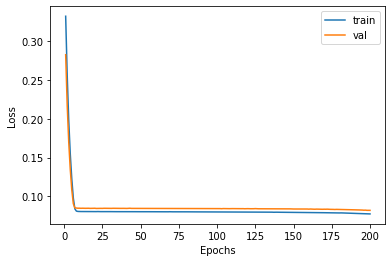

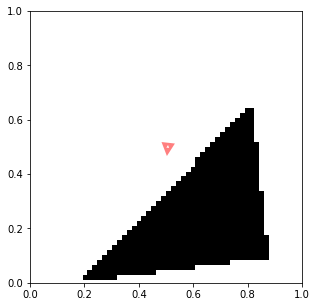

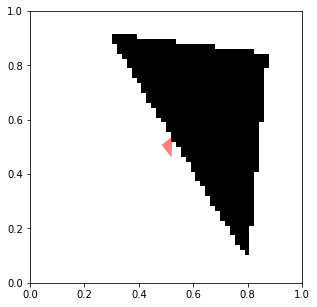

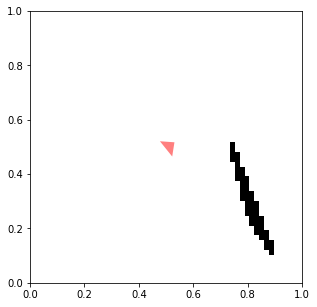

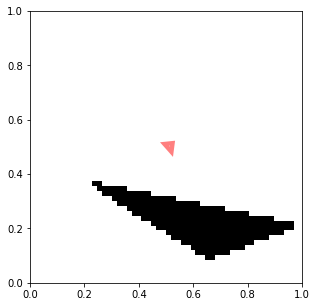

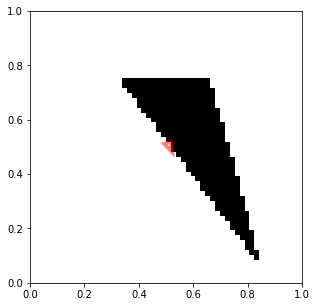

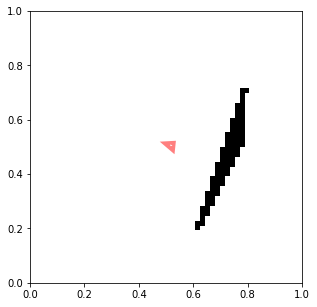

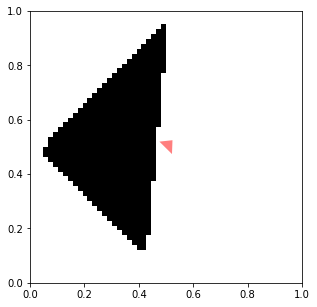

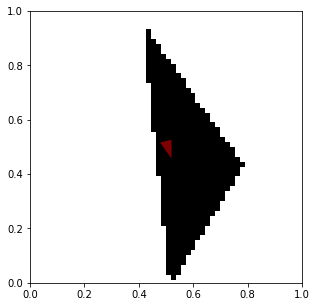

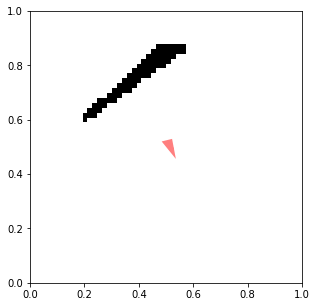

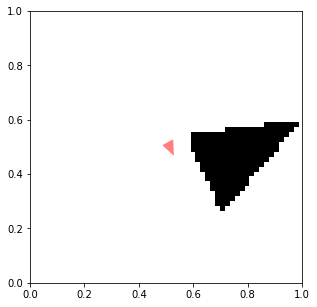

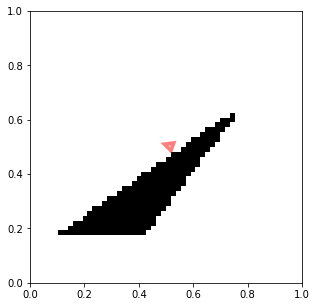

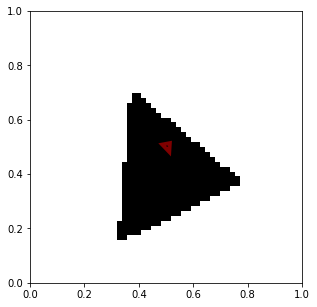

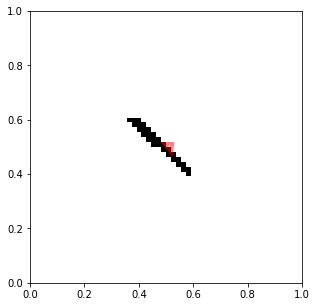

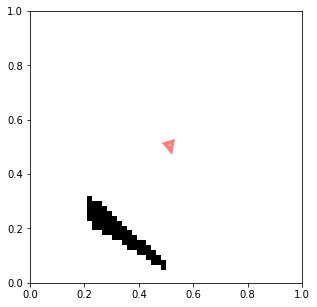

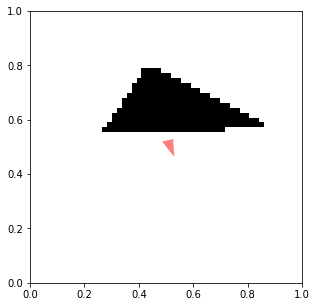

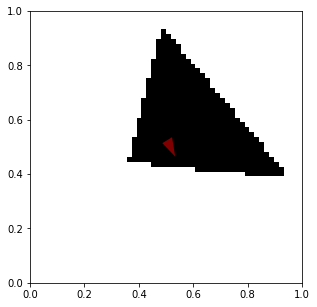

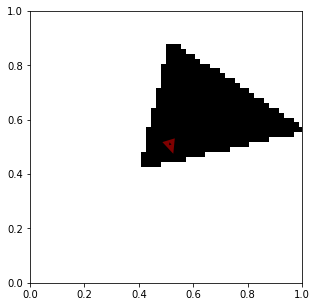

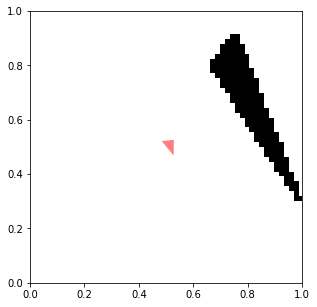

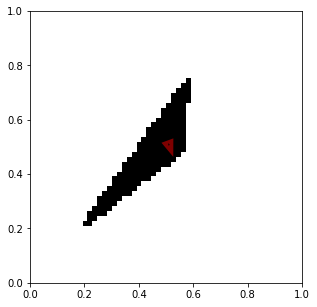

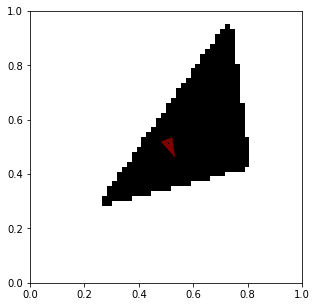

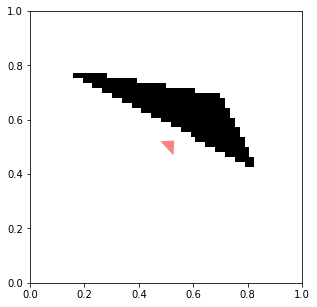

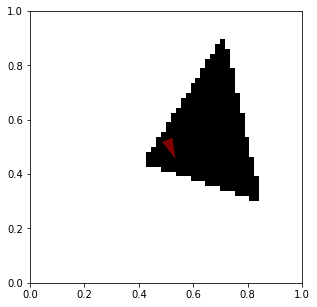

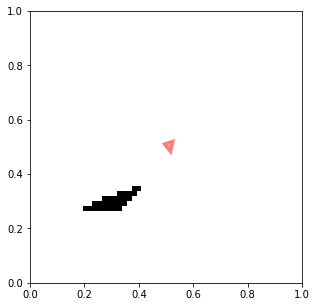

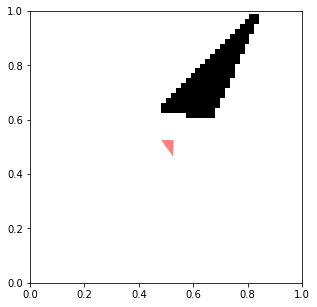

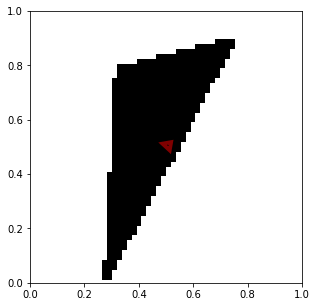

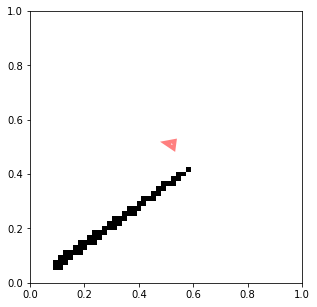

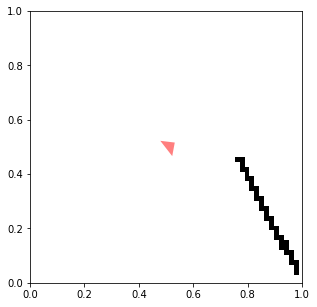

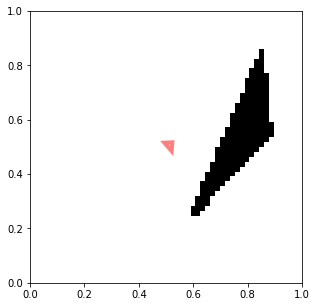

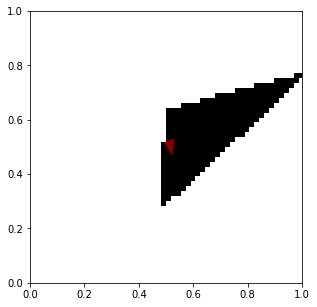

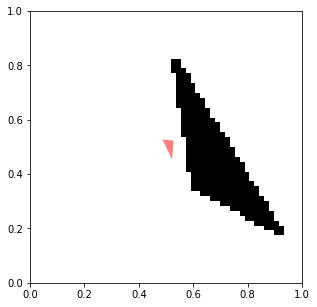

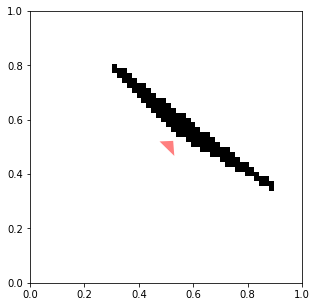

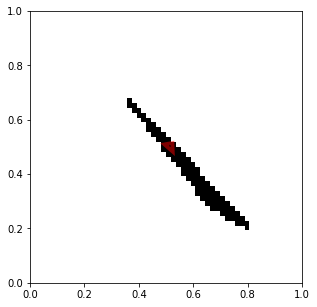

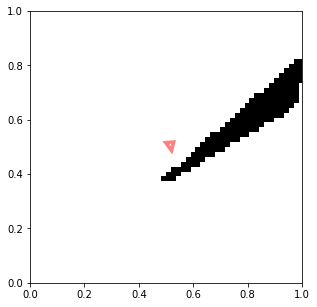

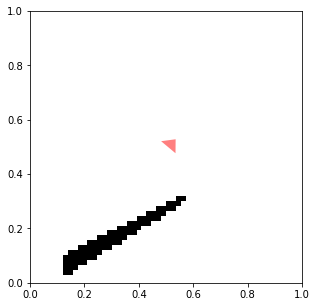

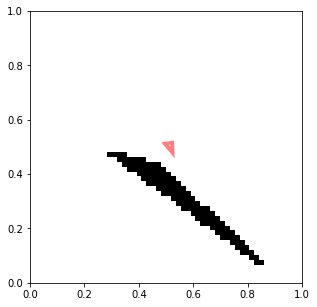

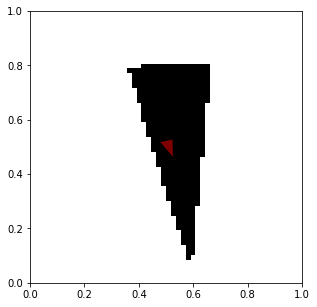

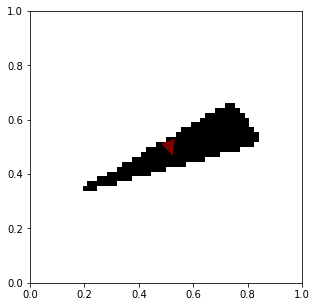

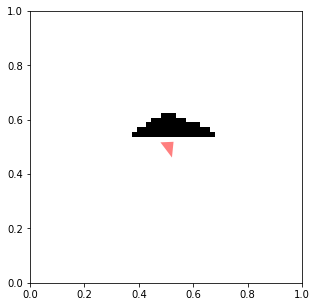

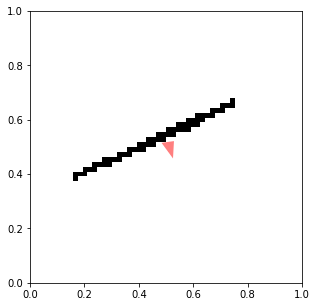

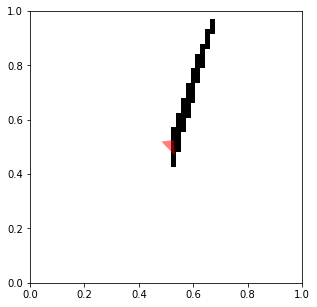

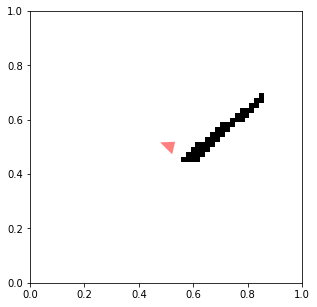

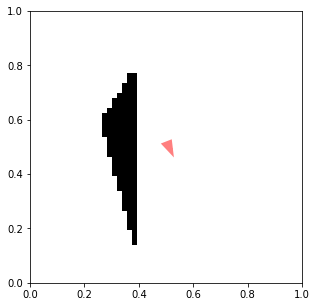

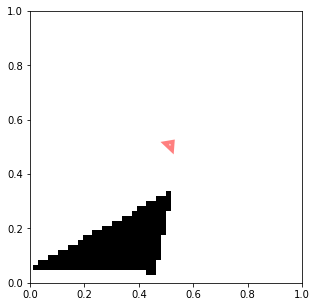

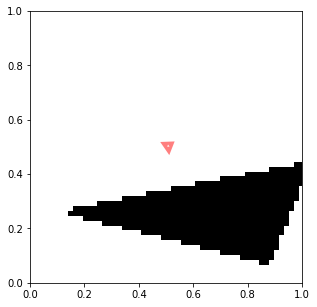

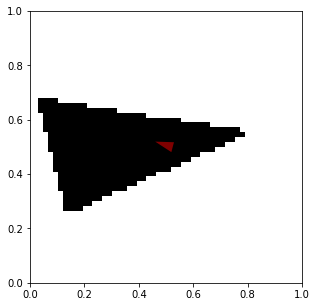

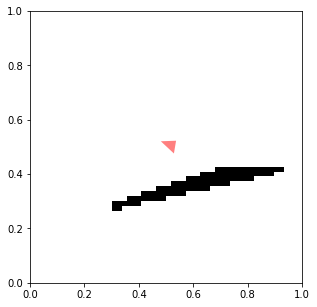

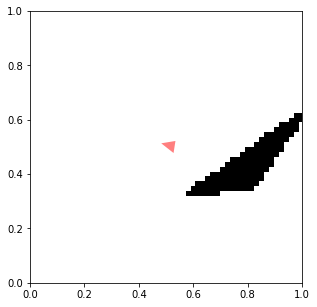

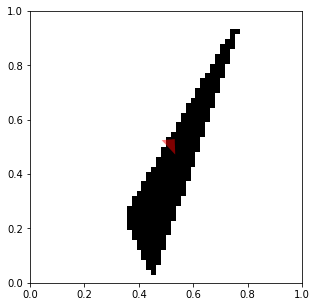

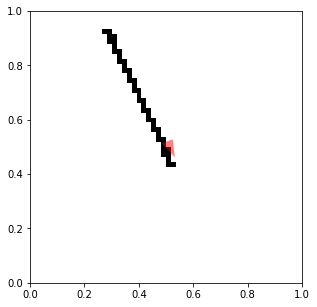

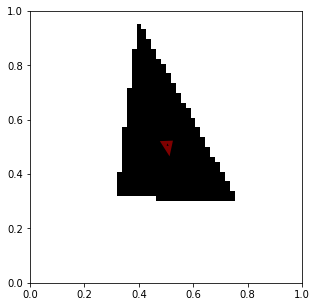

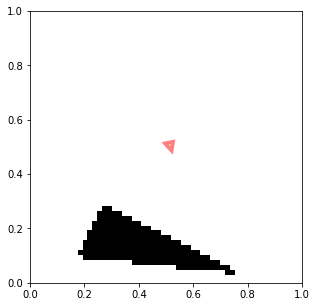

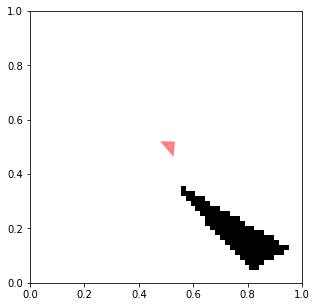

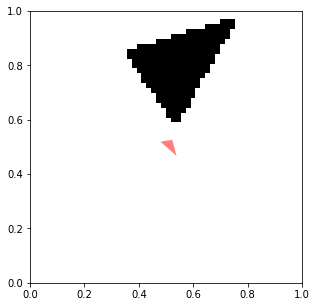

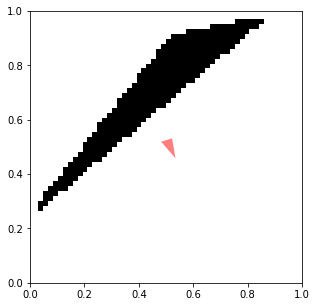

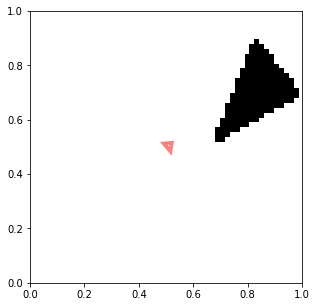

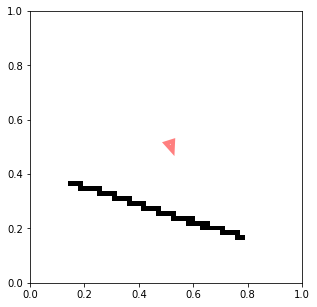

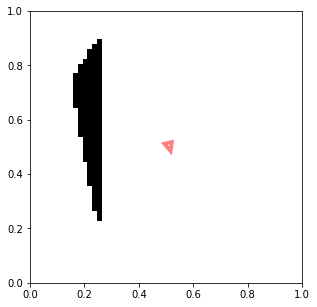

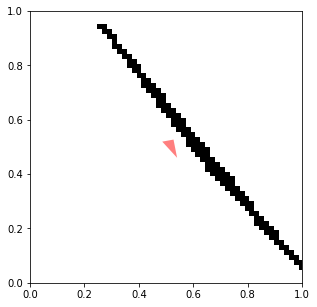

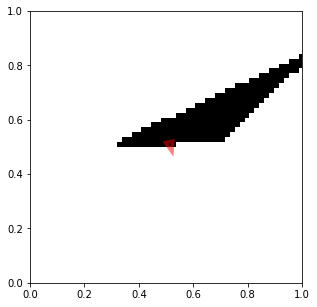

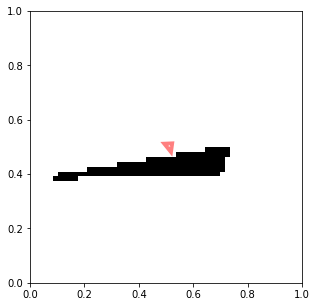

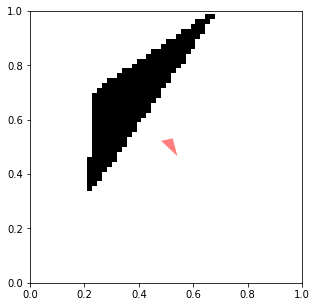

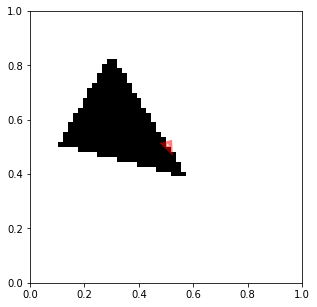

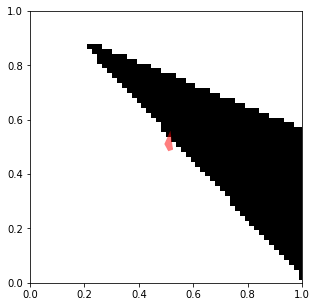

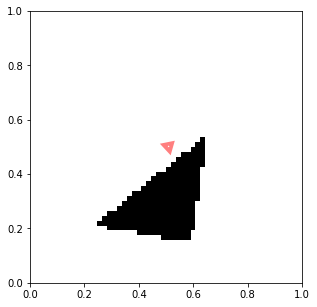

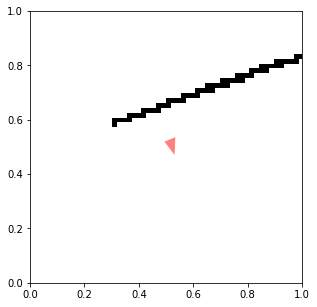

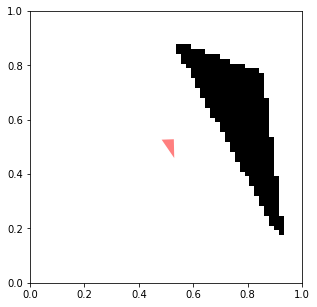

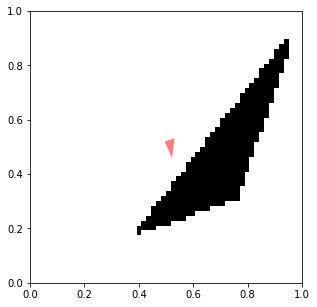

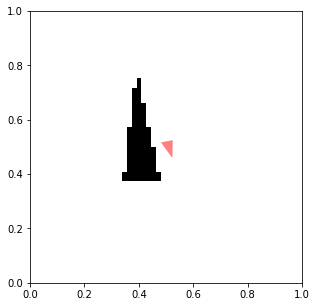

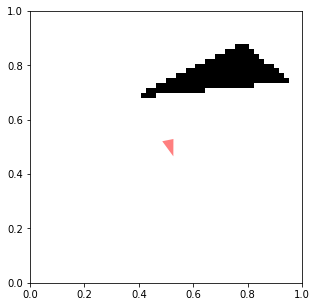

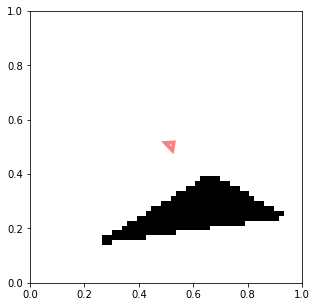

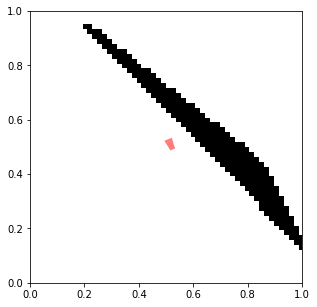

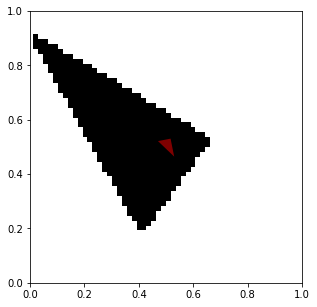

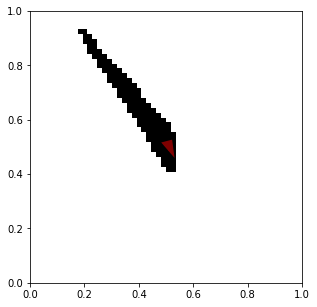

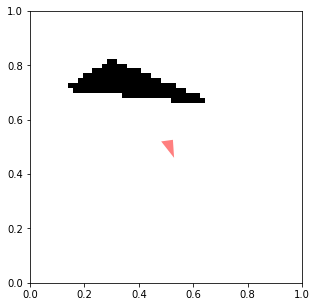

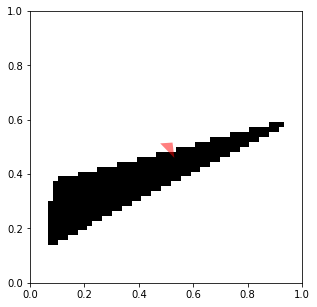

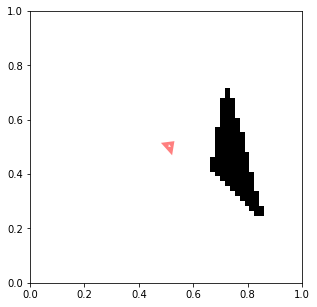

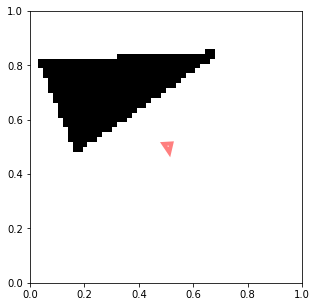

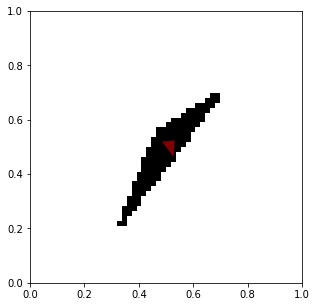

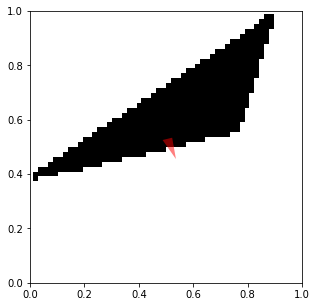

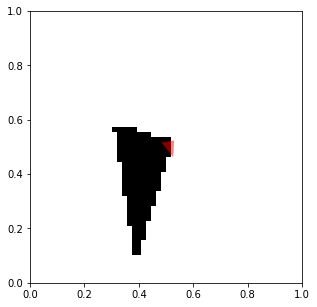

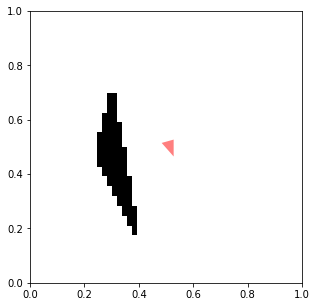

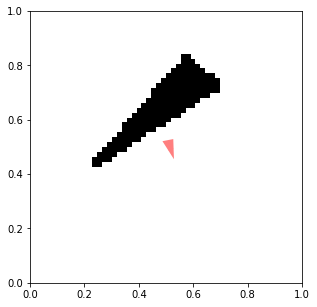

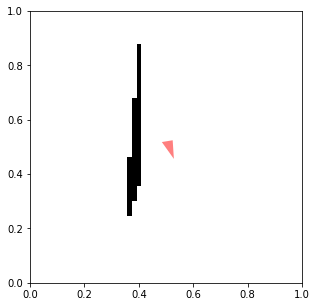

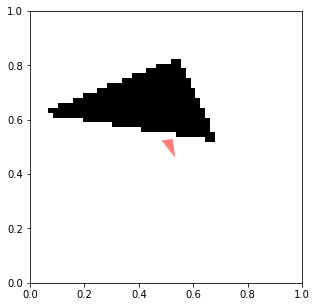

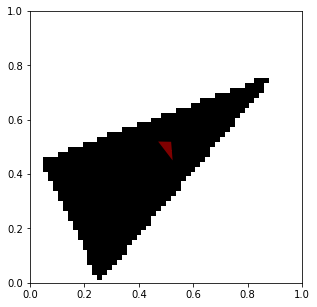

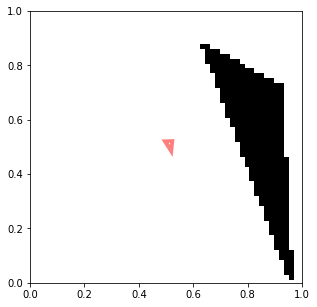

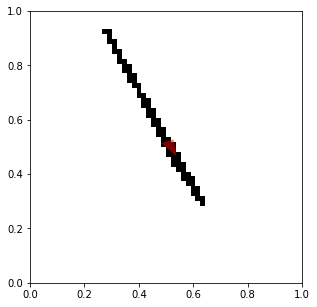

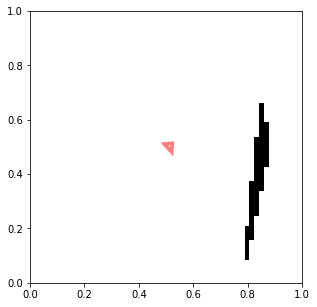

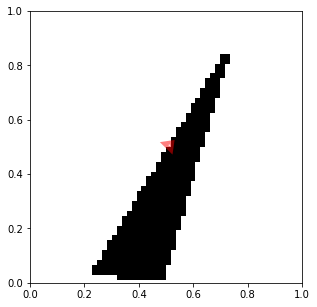

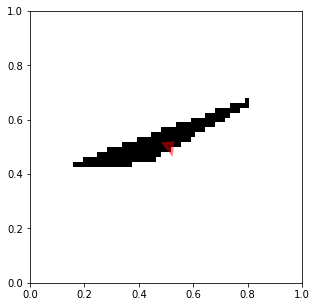

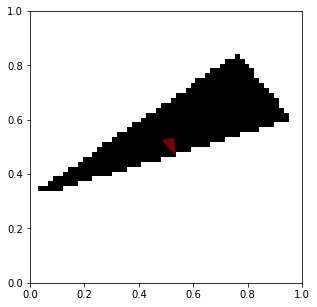

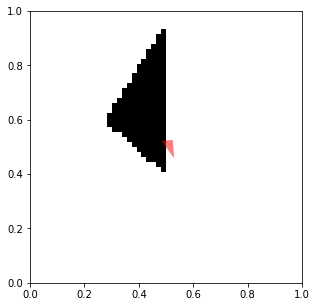

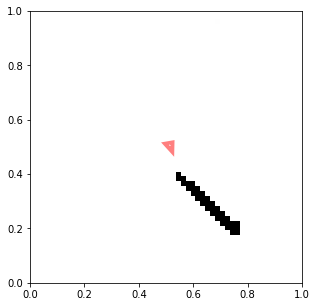

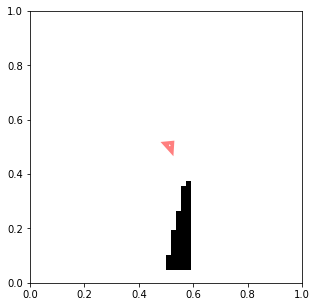

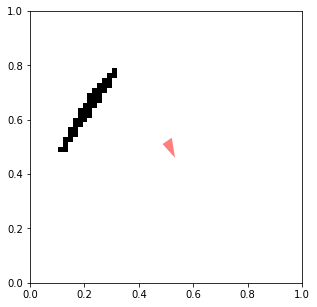

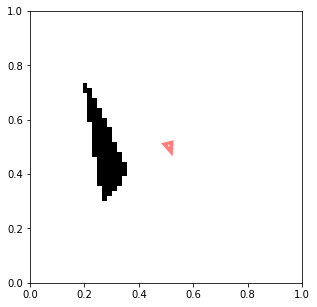

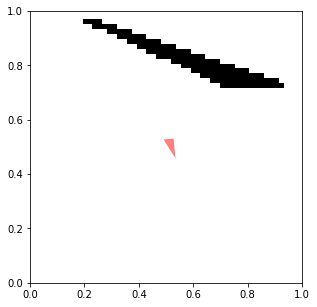

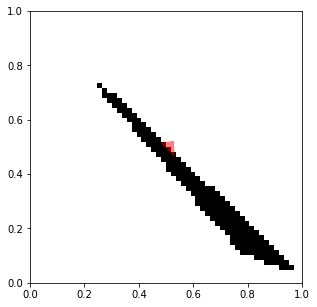

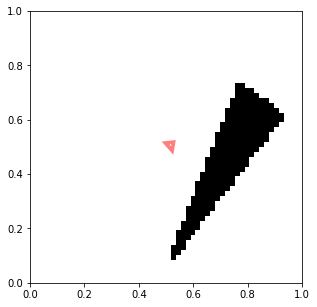

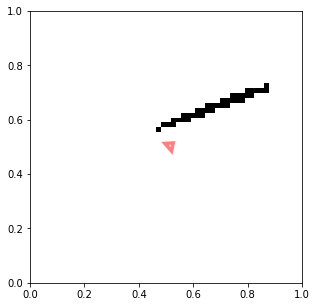

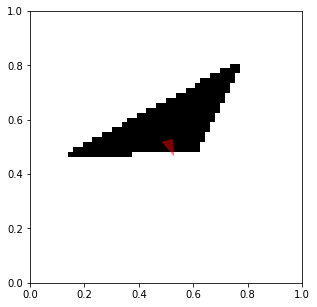

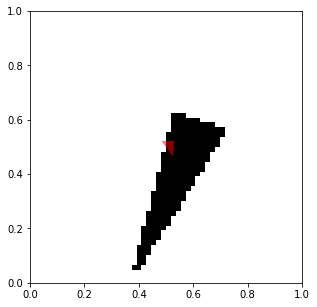

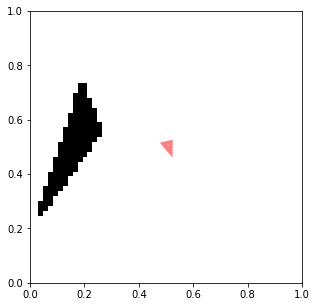

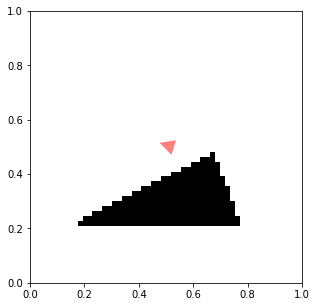

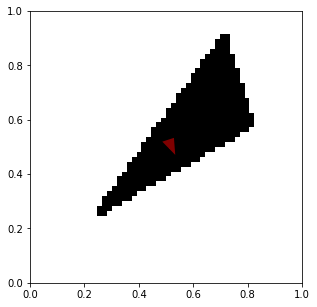

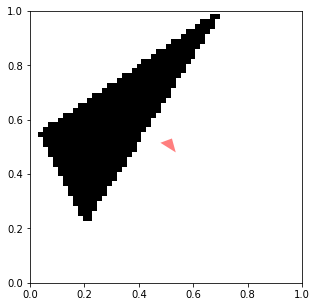

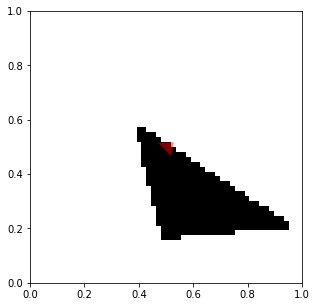

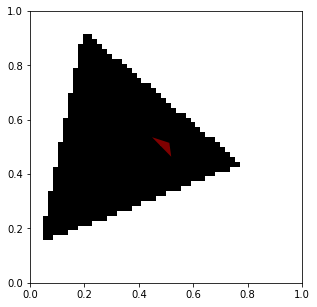

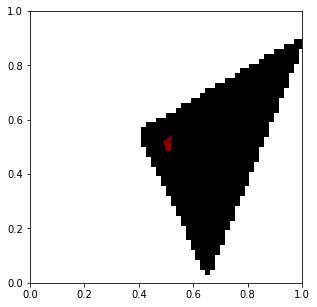

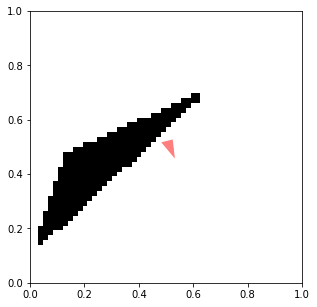

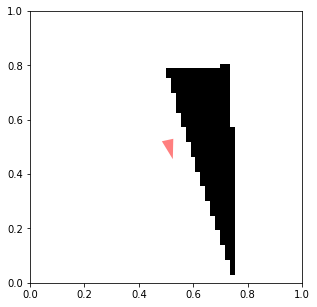

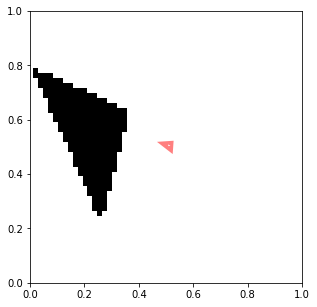

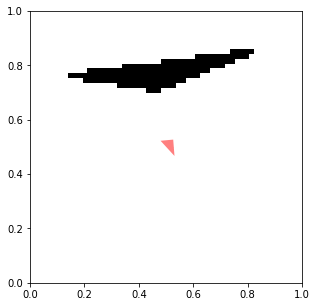

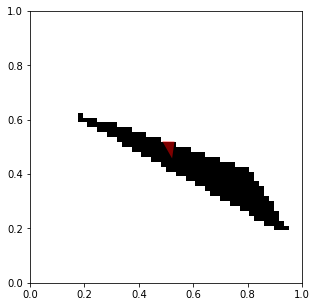

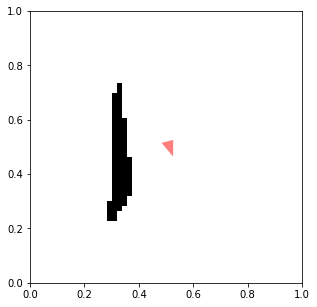

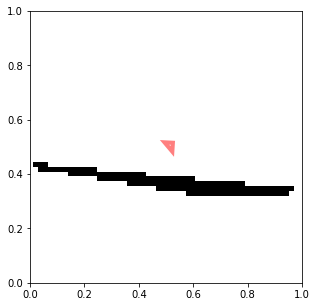

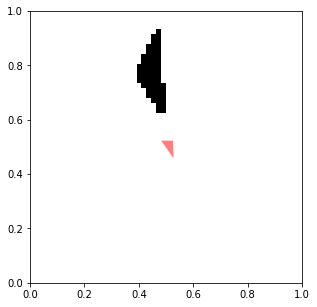

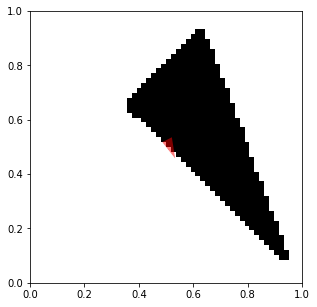

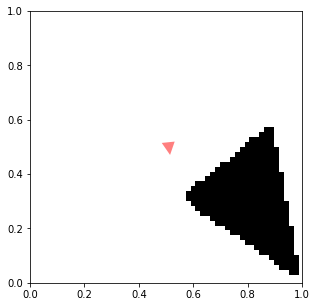

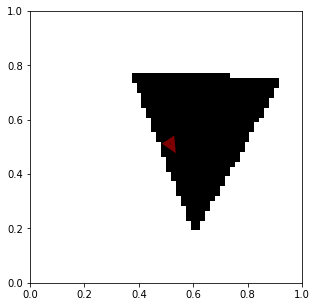

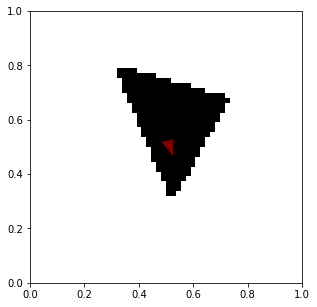

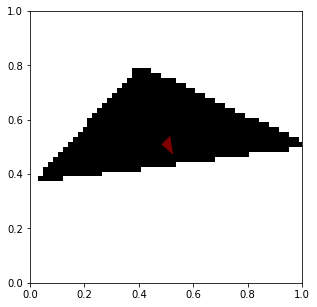

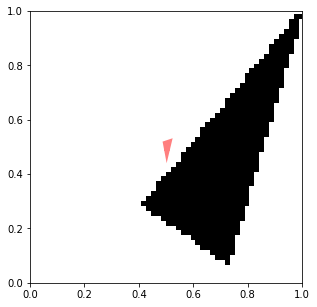

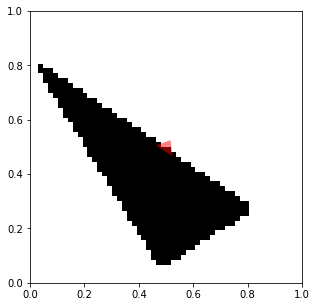

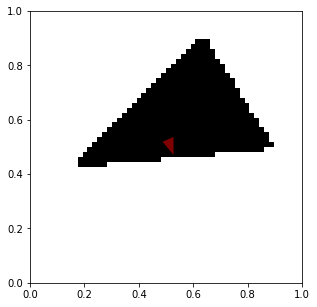

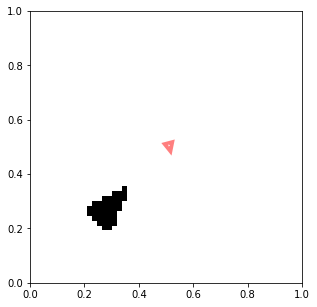

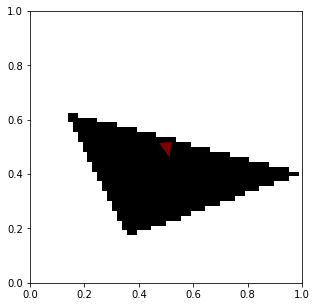

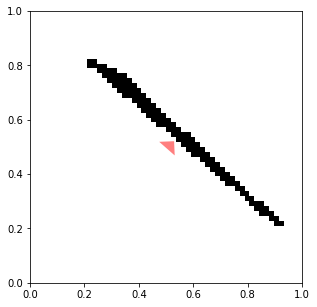

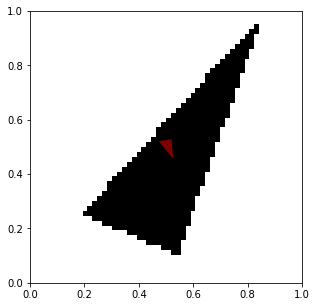

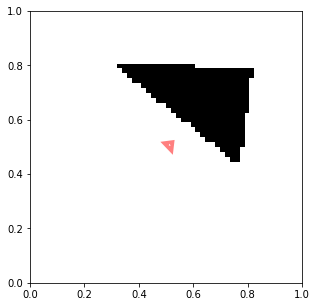

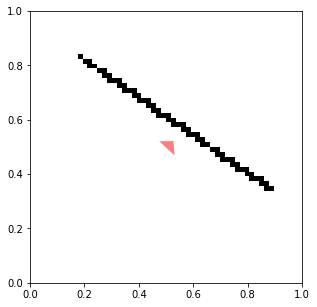

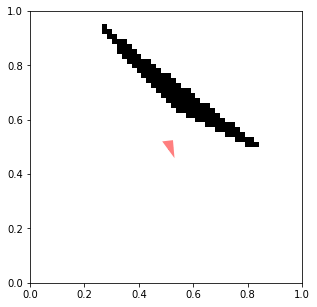

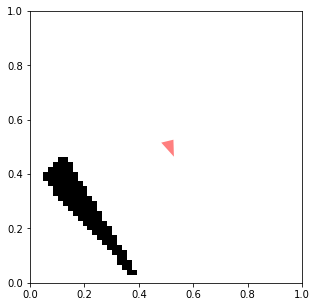

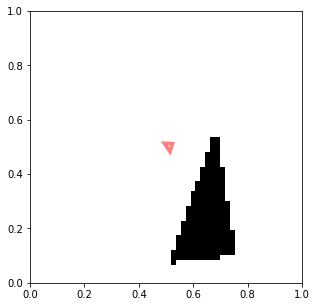

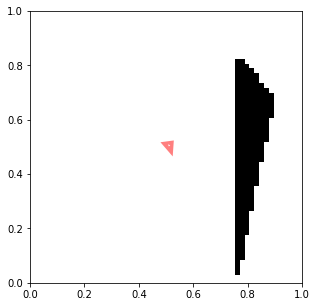

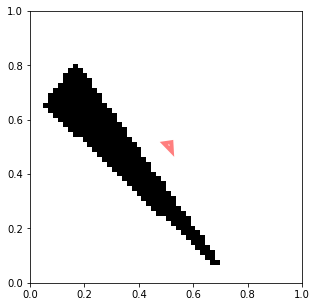

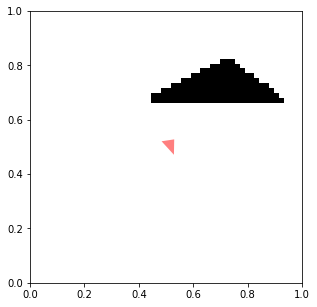

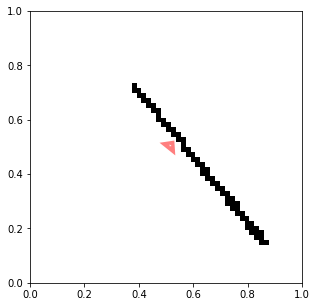

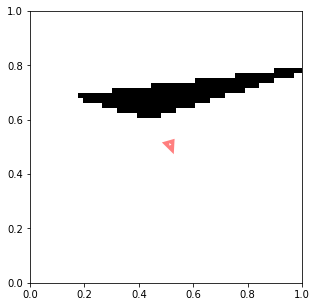

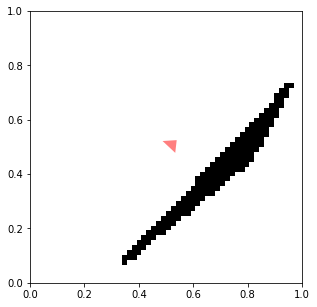

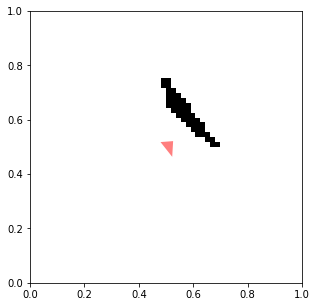

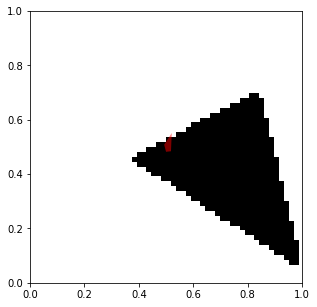

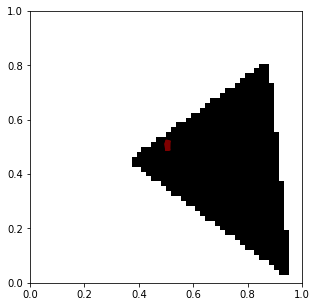

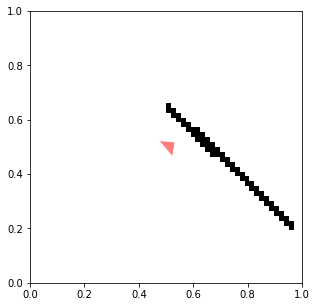

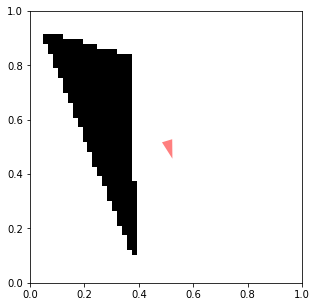

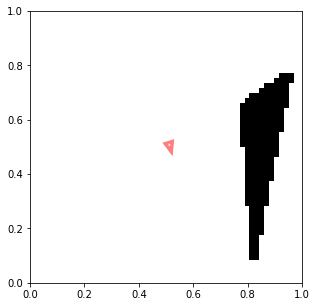

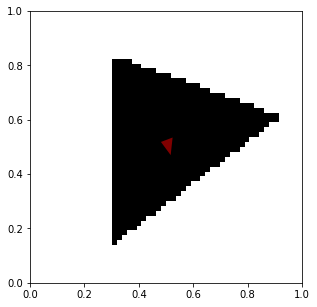

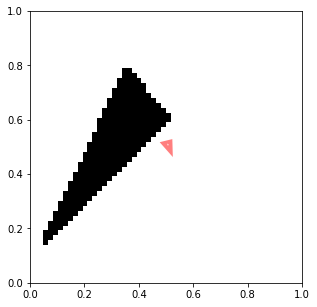

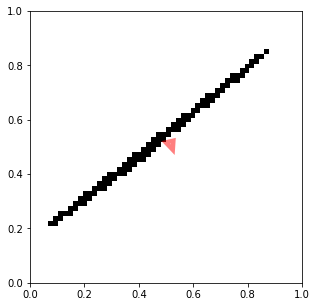

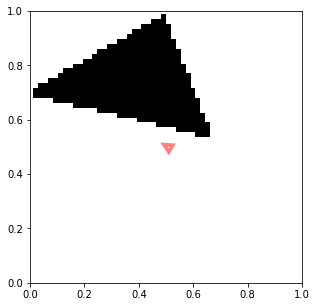

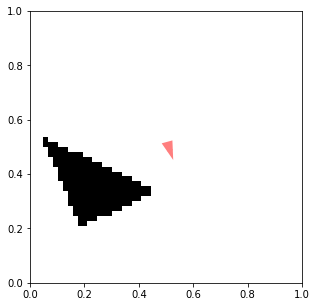

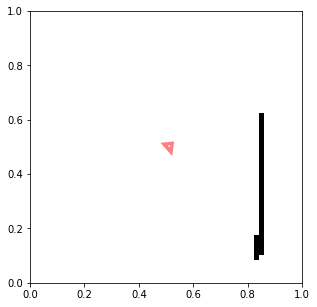

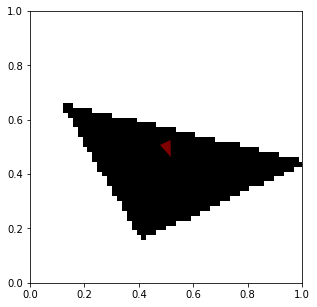

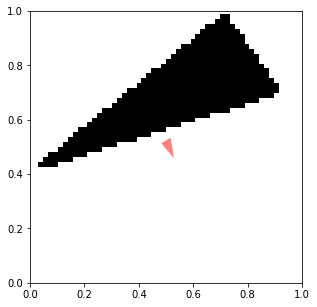

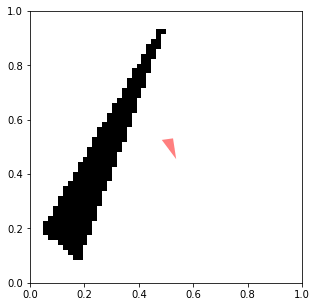

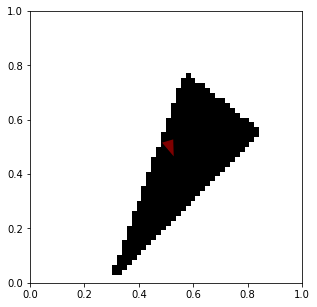

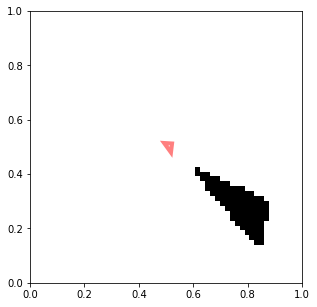

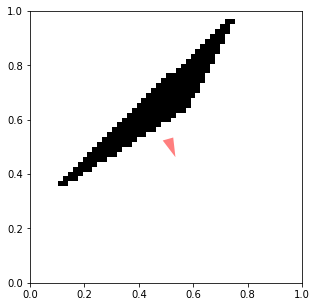

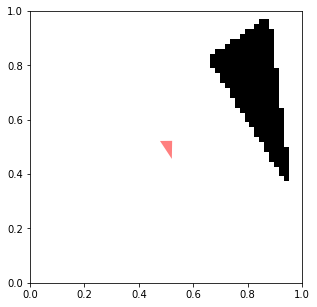

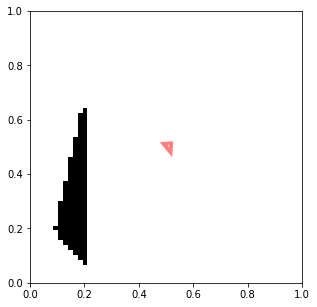

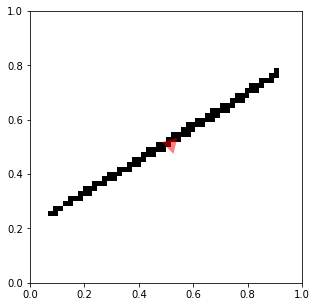

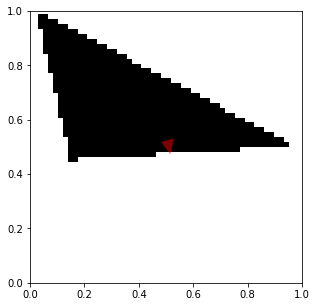

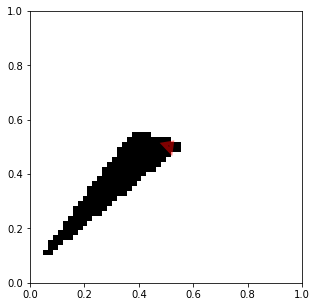

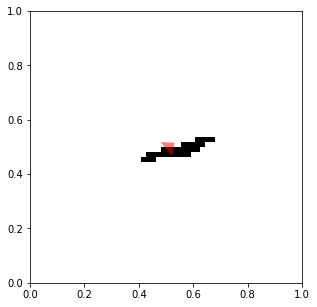

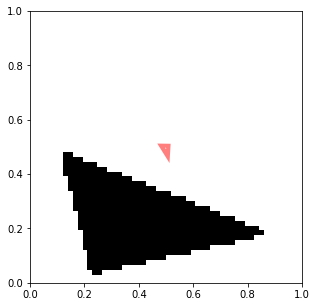

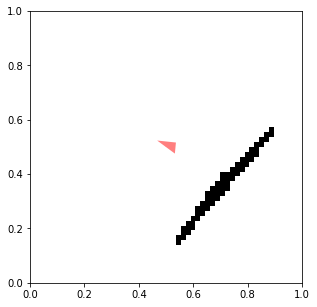

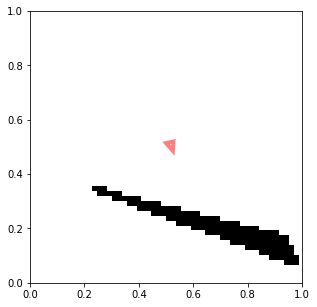

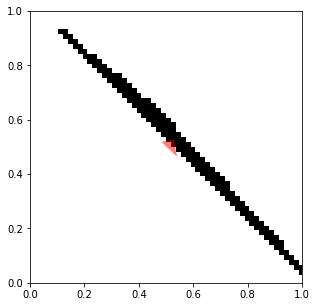

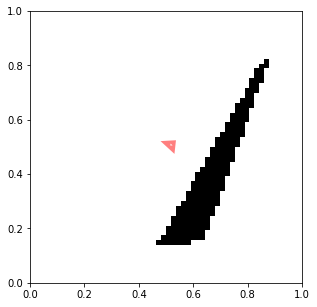

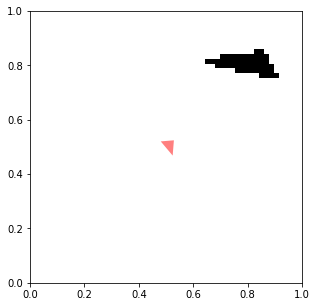

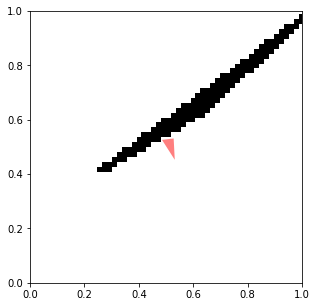

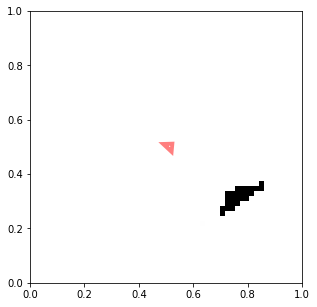

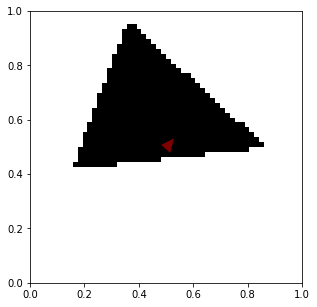

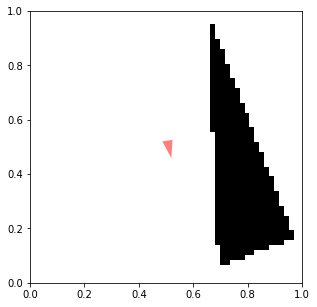

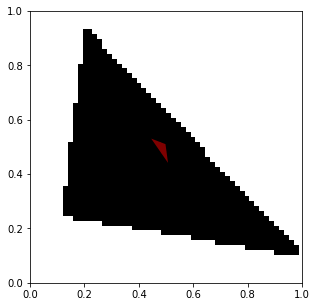

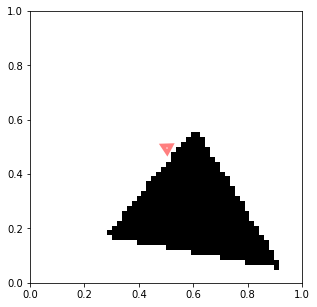

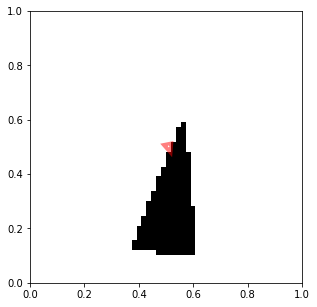

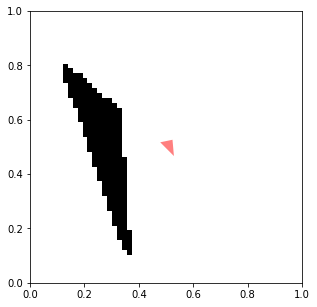

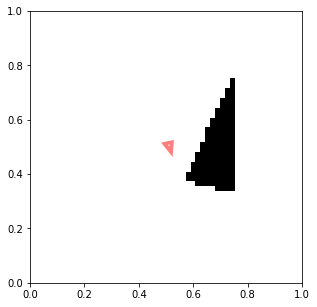

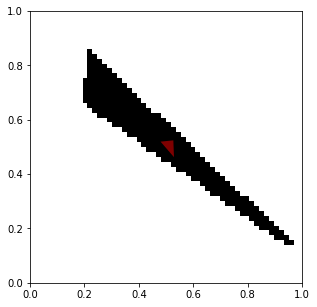

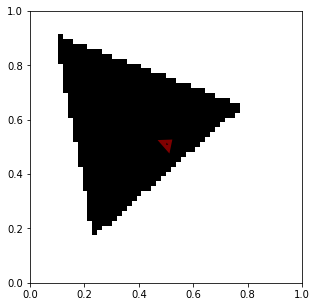

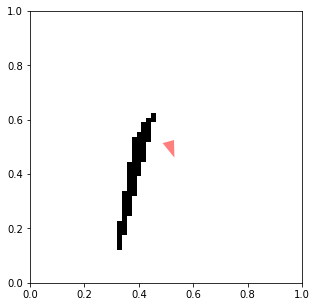

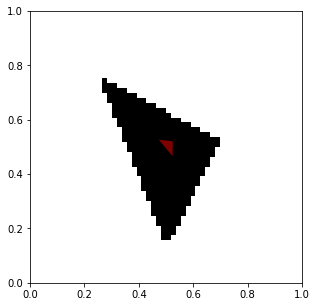

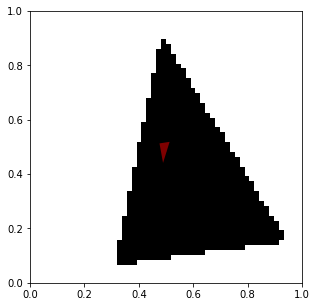

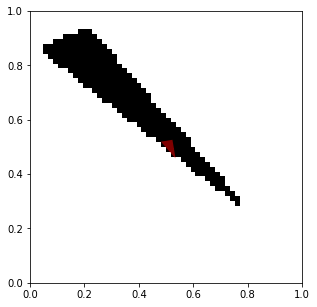

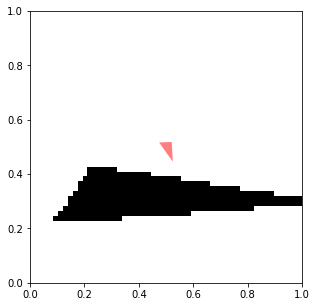

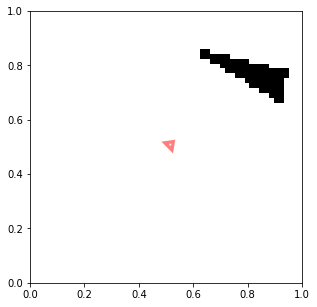

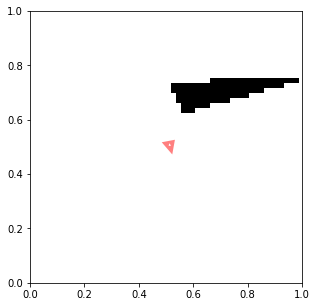

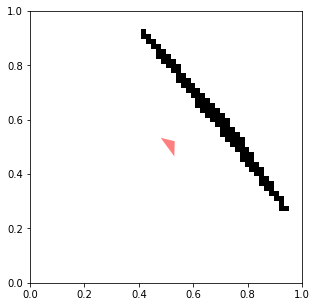

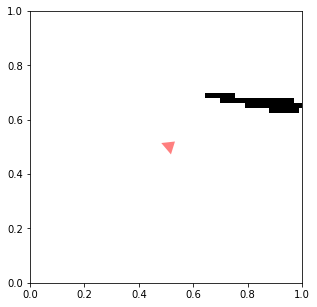

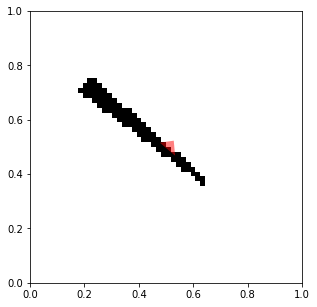

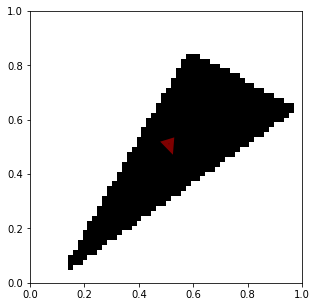

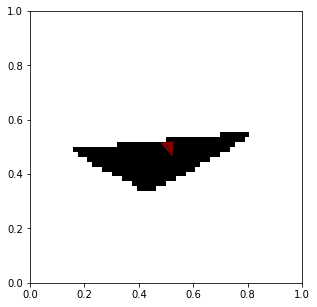

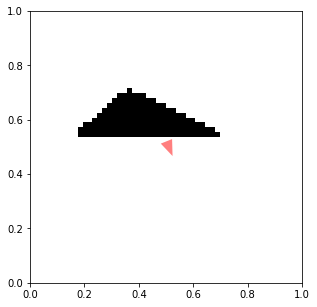

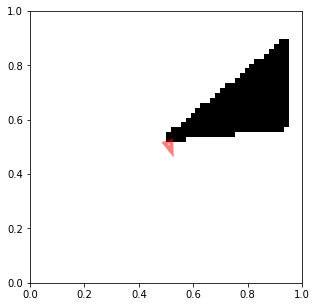

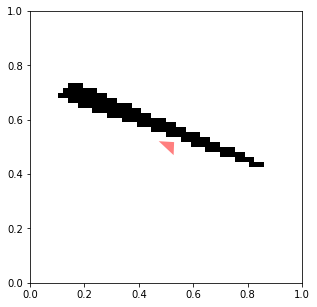

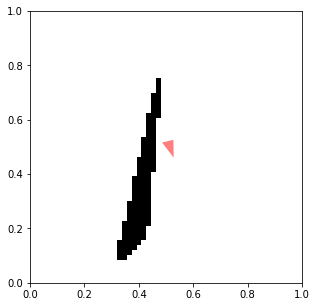

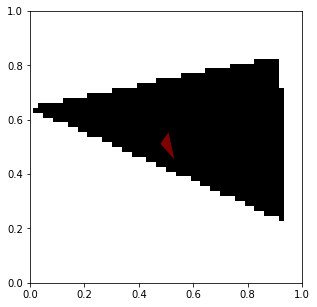

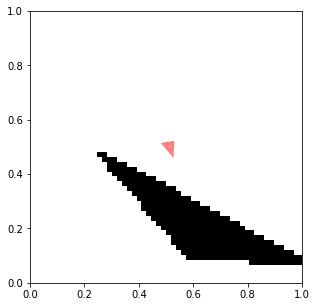

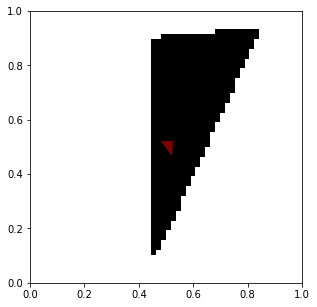

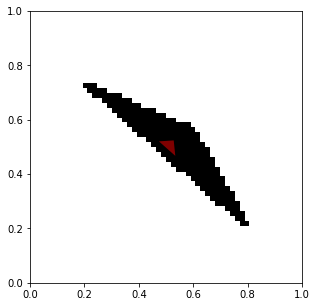

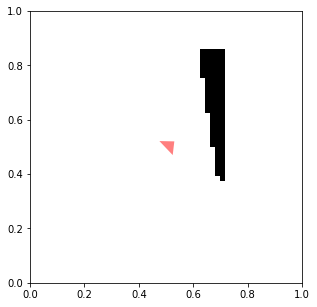

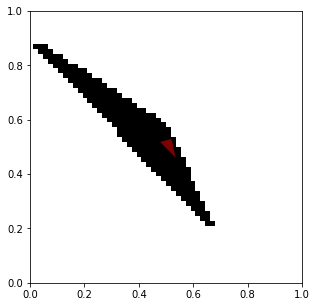

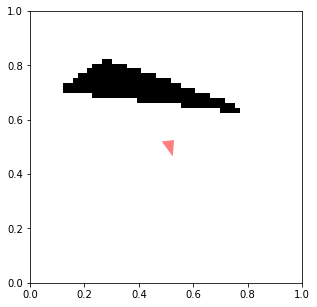

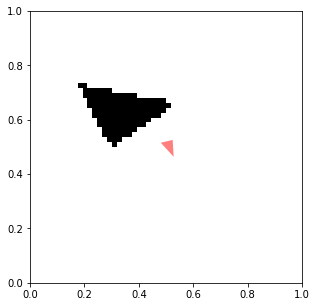

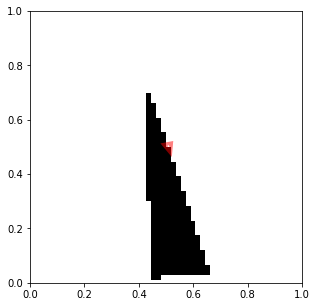

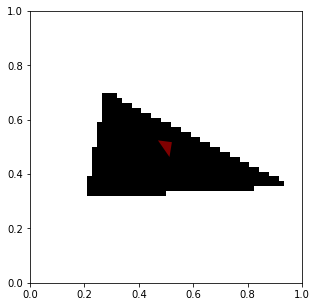

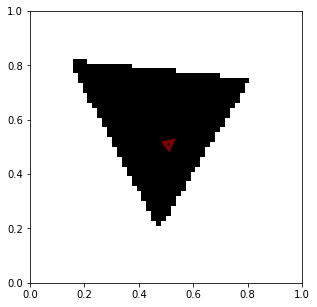

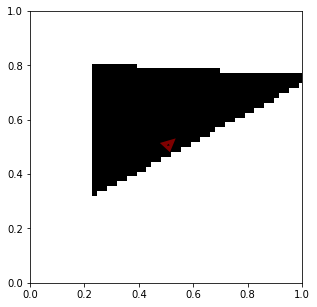

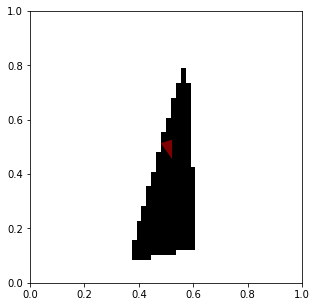

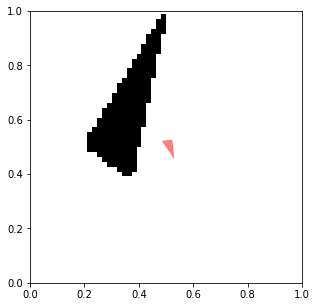

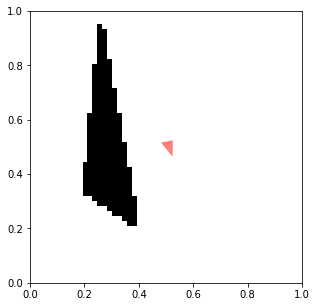

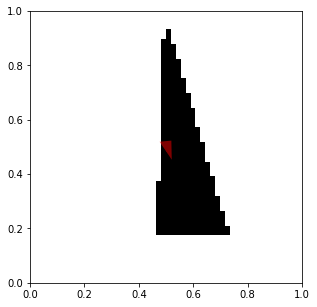

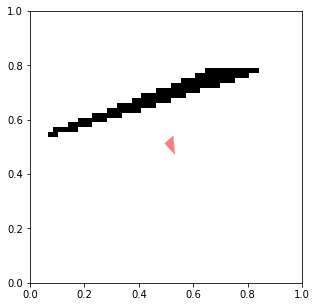

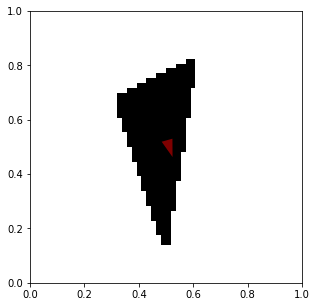

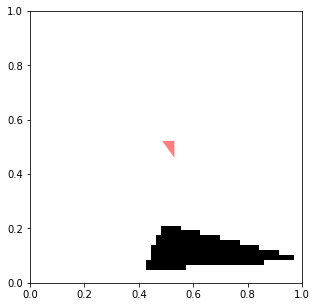

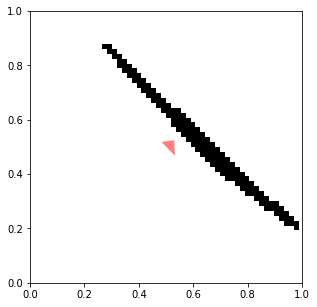

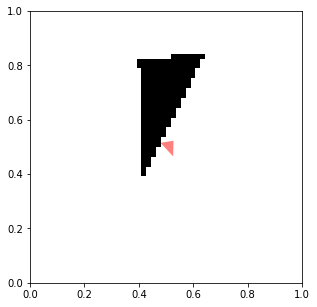

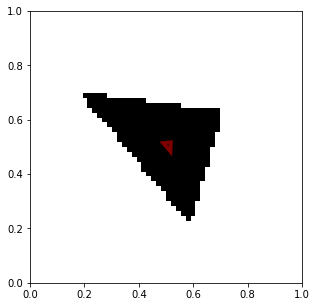

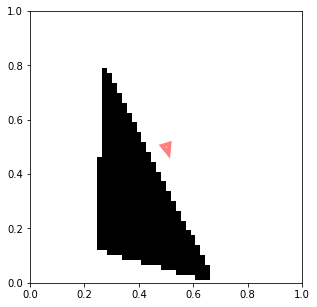

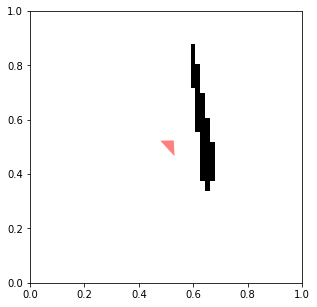

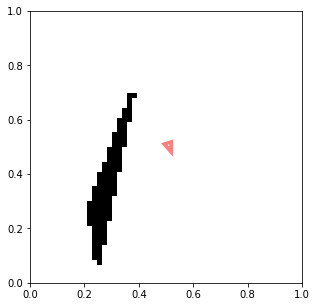

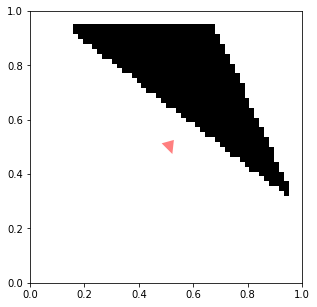

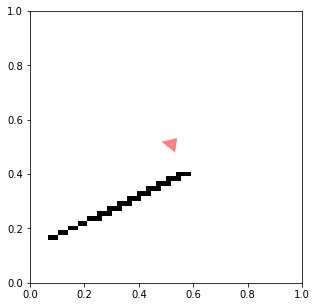

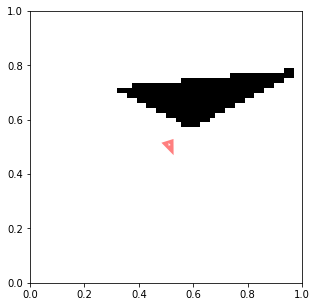

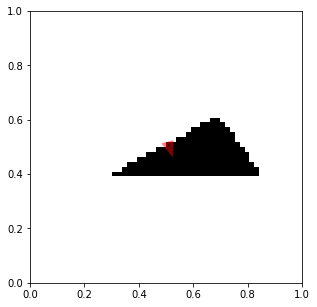

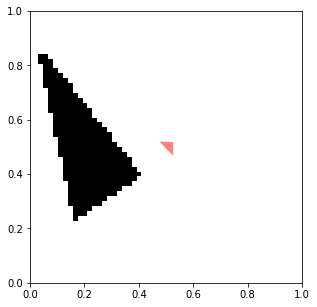

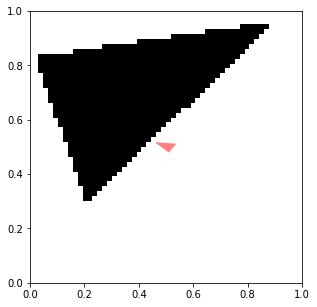

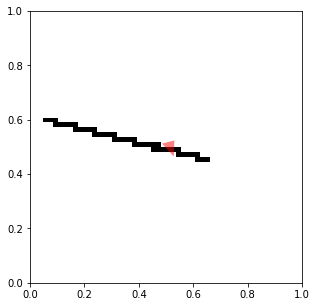

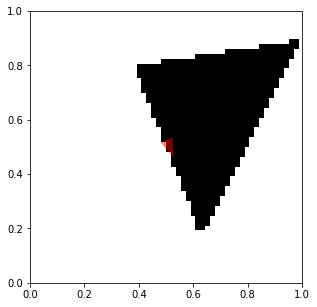

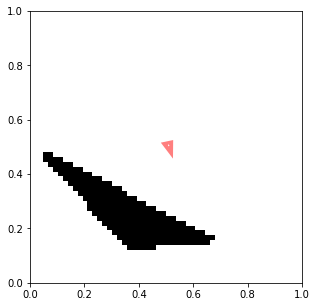

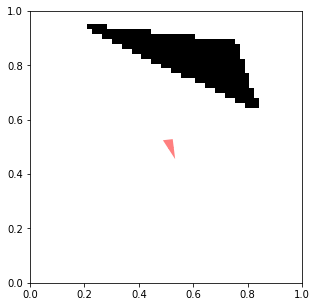

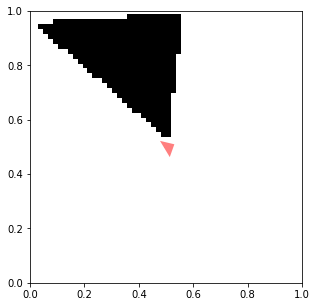

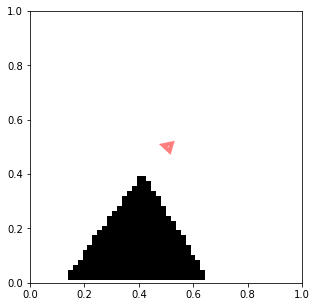

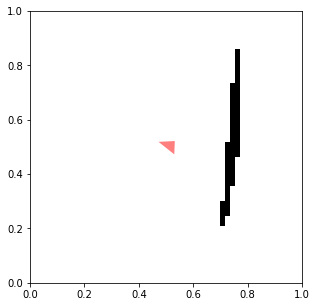

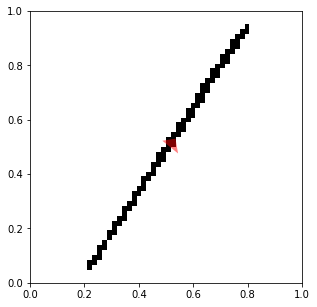

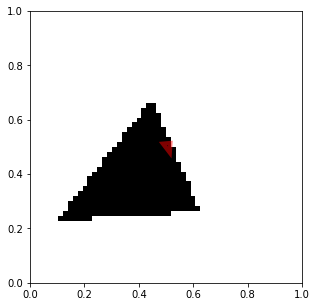

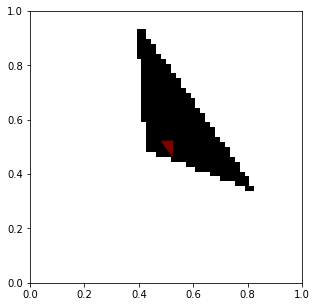

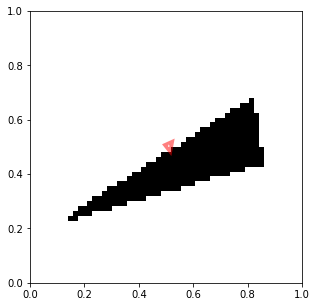

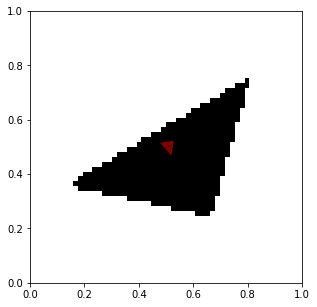

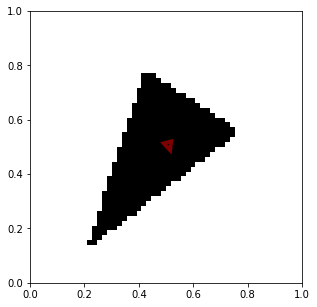

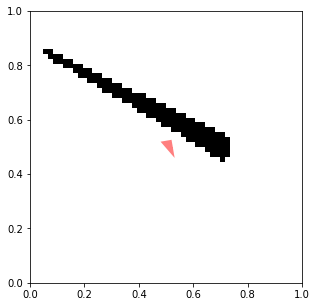

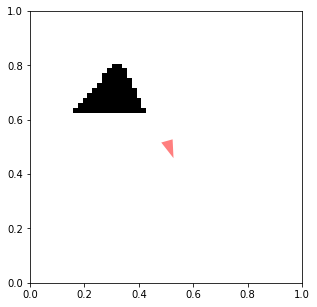

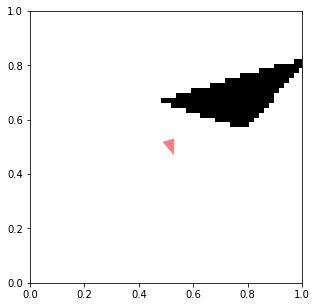

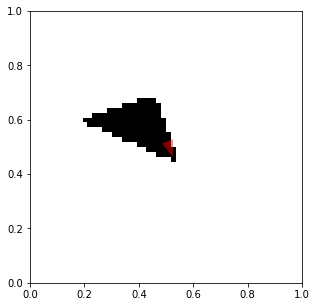

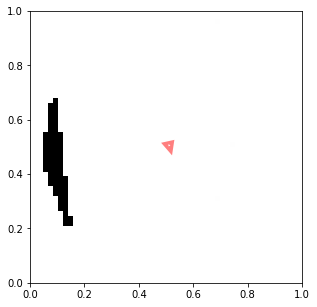

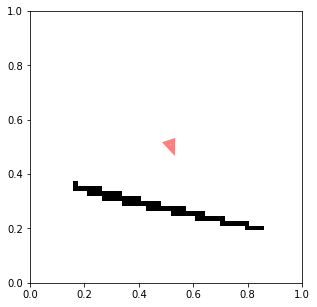

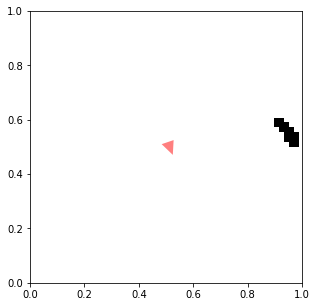

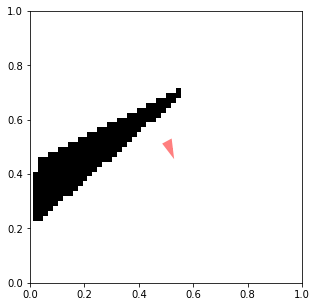

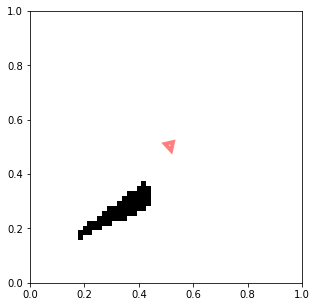

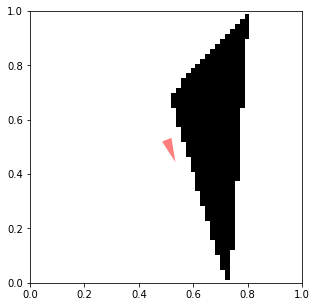

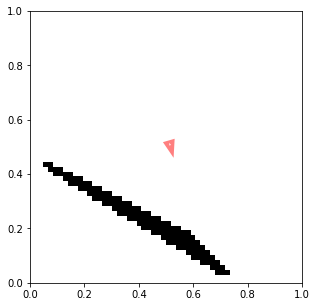

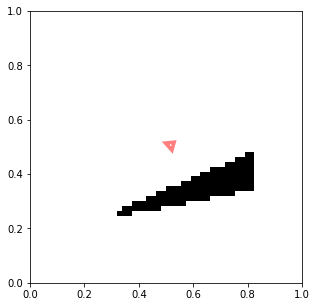

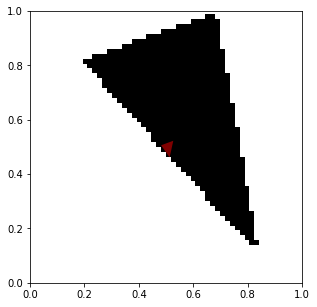

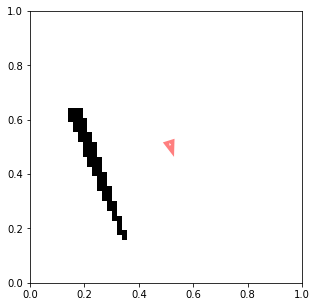

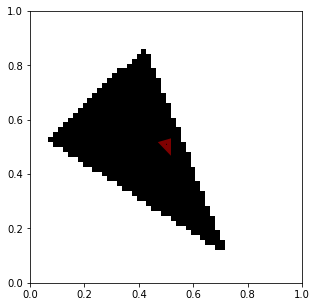

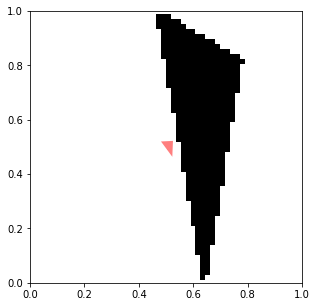

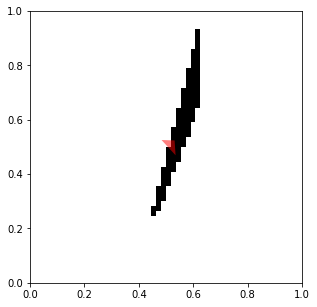

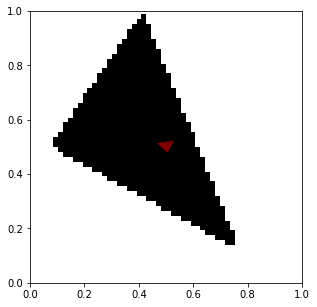

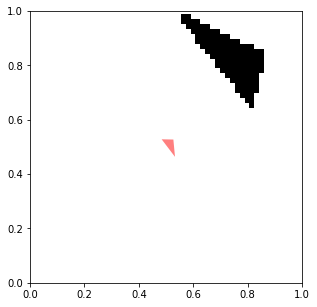

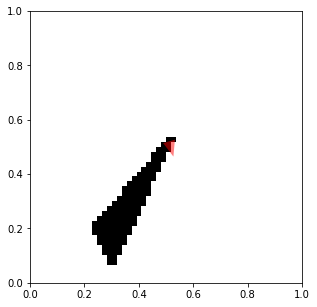

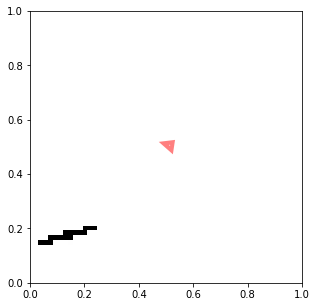

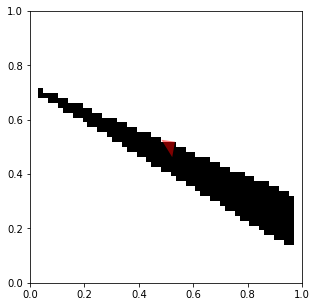

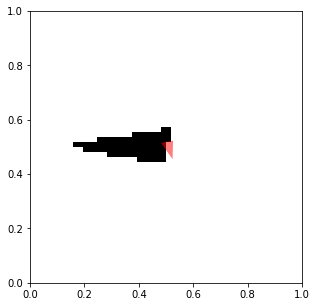

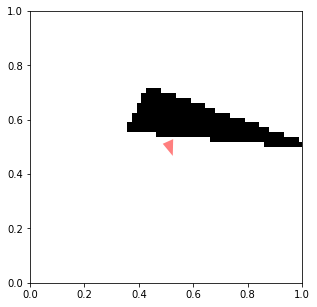

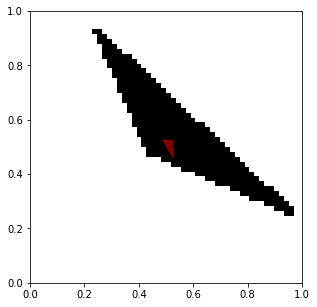

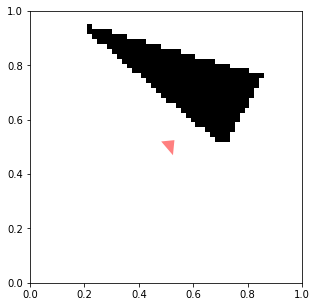

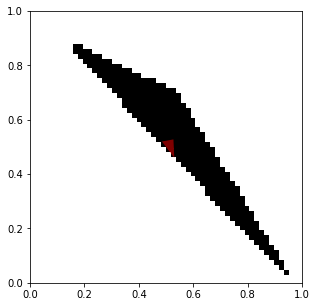

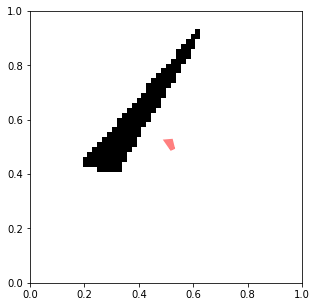

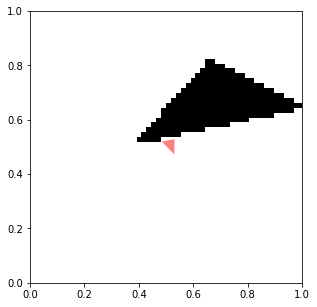

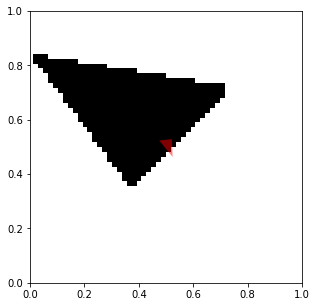

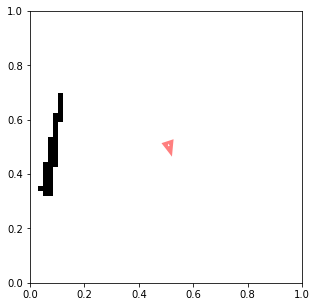

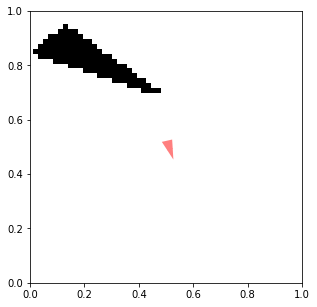

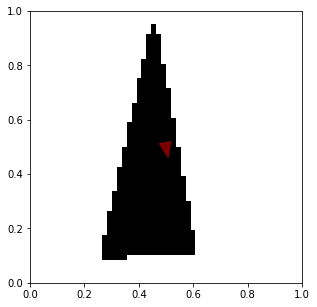

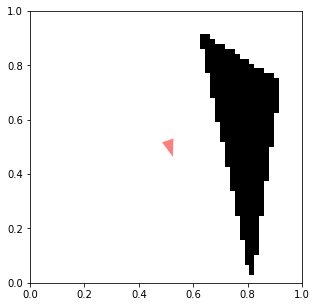

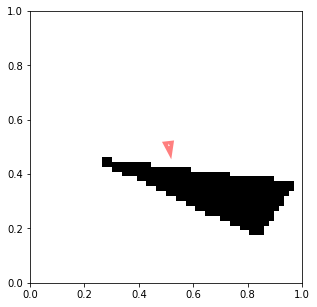

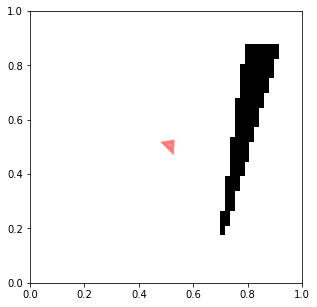

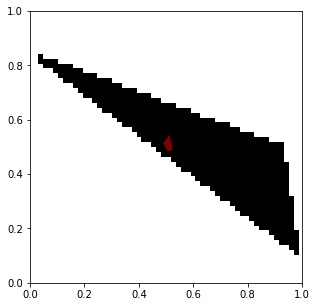

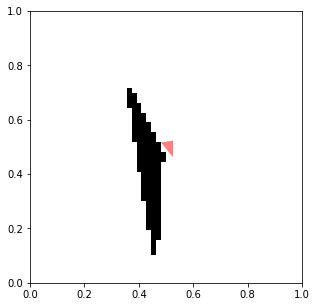

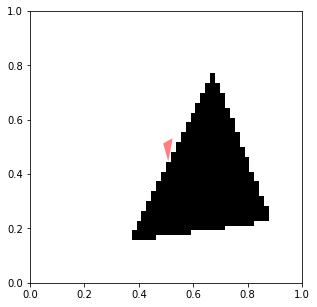

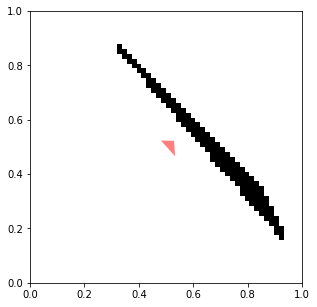

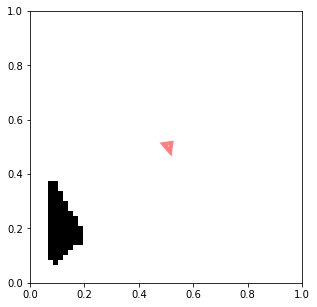

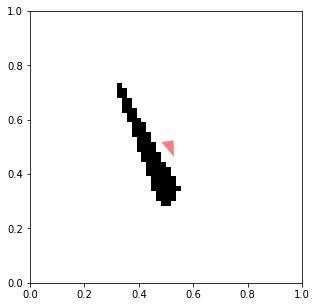

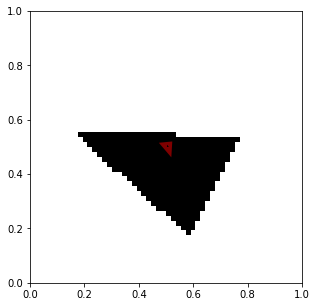

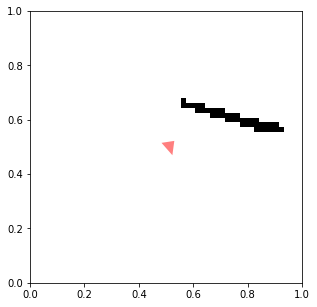

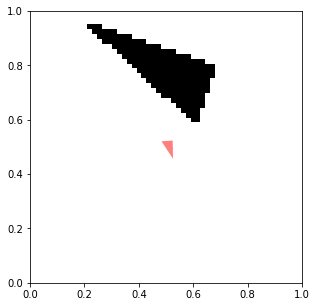

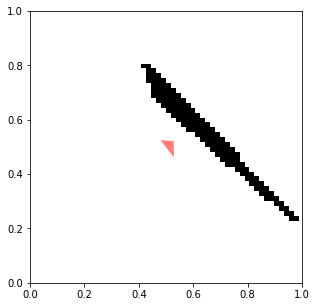

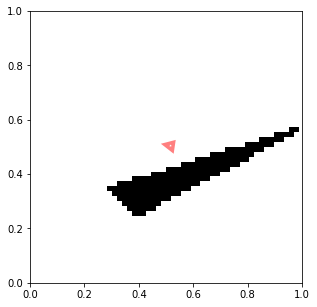

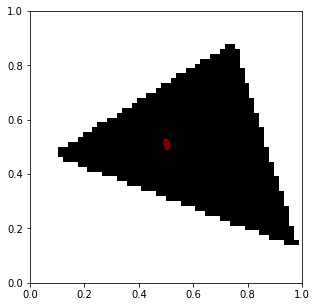

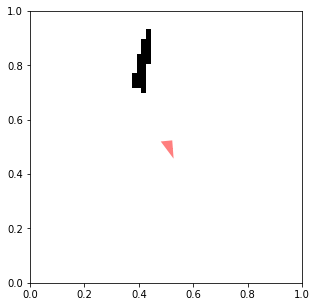

In [ ]:
# *****START CODE
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNetR2(nn.Module):
    def __init__(self):
        super(ConvNetR2, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 3)#（1*72*72）
        self.conv2 = nn.Conv2d(3, 6, 3)#（6*36*36）
        self.conv3 = nn.Conv2d(6, 3, 3)#（3*36*36）
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(3*7*7, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 6)
          
    def forward(self, x):
        #print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))#（1*72*72）-->（3*35*35）
        #print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))#（3*35*35）-->（3*16*16）
        #print(x.shape)
        x = self.pool(F.relu(self.conv3(x)))#（3*7*7）
        #print(x.shape)
        x = x.view(-1, 3*7*7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = ConvNetR2()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.MSELoss(size_average=None,reduce=None,reduction='elementwise_mean')
epochs = 200
import torchnet as tnt
confusion_matrix = tnt.meter.ConfusionMeter(10)
import numpy as np
def write_results(save_folder, epoch,  train_loss, val_loss):
    ff=open('{}/progress.txt'.format(save_folder),'a')
    ff.write(' E: ')
    ff.write(str(epoch))
    ff.write('         ')
    ff.write('         ')
    ff.write(' TRAIN_LOSS: ')
    ff.write(str('%.3f' % train_loss))
    ff.write(' VAL_LOSS: ')
    ff.write(str('%.3f' % val_loss))
    ff.write('\n')
import matplotlib.pyplot as plt
#function that creates the train-val loss graph
#variables 'train_loss' and 'val_loss' are losts containing the average losses for all the epochs
def save_graph(train_loss, val_loss, nb_epochs, save_folder):
    plt.plot(list(range(nb_epochs+1))[1:], train_loss)
    plt.plot(list(range(nb_epochs+1))[1:], val_loss)
    plt.legend(['train', 'val'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.savefig('{}/chart.png'.format(save_folder))
save_folder = 'E:/drive2/My Drive/FDL/'
from tqdm import tqdm
import torch.nn.functional as F
total_train_losses = []
total_val_losses = []
for epoch in range(1,epochs+1):
    ##TRAINING##
    model.train()
    train_losses = []
    confusion_matrix.reset()
    for i, batch, in enumerate(tqdm(train_dataloader1)):
        img_batch, lbl_batch = batch

        ##implement the forward and backward backpropagation
        optimizer.zero_grad()
        output = model(img_batch.float())
        loss=criterion(output.float(), lbl_batch.float())
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        if i % 100 == 0:
            print('Train (epoch {}/{}) [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, epochs, i, len(train_dataloader1),100.*i/len(train_dataloader1), loss.item()))

    train_loss_mean = np.mean(train_losses)
    total_train_losses.append(train_loss_mean)
    confusion_matrix.reset()


    model.eval()
    val_losses = []

    for i, batch, in enumerate(tqdm(val_dataloader1)):
        img_batch, lbl_batch = batch
        outputs=model(img_batch.float())

        loss=criterion(outputs.float(), lbl_batch.float())
        
        val_losses.append(loss.item())

    val_loss_mean = np.mean(val_losses)
    total_val_losses.append(val_loss_mean)

    print('TRAIN_LOSS: ', '%.3f' % train_loss_mean)
    print('VAL_LOSS: ', '%.3f' % val_loss_mean)
    confusion_matrix.reset()

    write_results(save_folder, epoch,  train_loss_mean, val_loss_mean)

    torch.save(model.state_dict(), save_folder + 'model_{}.pt'.format(epoch))

save_graph(total_train_losses, total_val_losses, epochs, save_folder)
# 可视化
import torch
from torch.utils import data
dataset1 = generate_dataset_regression(400)
a = torch.tensor(dataset1[0].reshape(400,72,72)).unsqueeze(1)
b = torch.tensor(dataset1[1])
train_ids =torch.utils.data.TensorDataset(a,b)
print(train_ids)
test_size = 400
test_dataloader1 = torch.utils.data.DataLoader(train1, batch_size=1, shuffle=True)
##load your optimal model
model = ConvNetR2()
model.load_state_dict(torch.load('E:/drive2/My Drive/FDL/model_100.pt')) 
test_losses=[]
for i, batch, in enumerate(test_dataloader1):
        img_batch1, lbl_batch1 = batch
        outputs=model(img_batch1.float())
        outputs1=outputs.cpu().detach().numpy()
        img_batch1=img_batch1.cpu().detach().numpy()
        visualize_prediction(img_batch1,outputs1)

# *****END CODE